In [1]:
%run ../scripts/notebook_settings_lean.py
from scipy import stats
from horizonplot import horizonplot
from chromwindow import window
import zarr
import allel

Convert chrX with males to zarr for analysis later

In [2]:
#chrX_vcf = allel.read_vcf("/faststorage/project/baboondiversity/data/PG_panu3_phased_chromosomes_4_7_2021/chrX_with_males/chrX_diploid_all_nomiss.vcf.gz")

In [3]:
input_vcf = "/faststorage/project/baboondiversity/data/PG_panu3_phased_chromosomes_4_7_2021/chrX_with_males/chrX_diploid_all_nomiss.vcf.gz"
zarr_chrX = "/home/eriks/baboondiversity/data/callset.zarr/all_chrX"
#allel.vcf_to_zarr(input_vcf, zarr_chrX, fields='*')

Admixture graphs

In [2]:
def admixture_calc(starting_aut, starting_x,
                   gen_admix, admix_prop, male_bias, pop_svamp):
    admixing_aut, admixing_x = starting_aut, starting_x
    auto_perc_his, x_perc_his, gen_his, pop_his = [], [], [], []
    for j in range(pop_svamp):
        auto_perc, x_perc = 1, 1
        for i in range(gen_admix):
            auto_perc_his.append(auto_perc), x_perc_his.append(x_perc), gen_his.append(i), pop_his.append(j+1)
            auto_perc = auto_perc*(1-admix_prop*admixing_aut)
            x_perc = x_perc*(1-admix_prop*admixing_x*(male_bias*2/3+(1-male_bias)*4/3))
        print(auto_perc, x_perc)
        admixing_aut, admixing_x = 1-auto_perc, 1-x_perc
    return pd.DataFrame({"generations": gen_his, "autosomal admixture": auto_perc_his,
                         "chrX admixture": x_perc_his, "pop_number": pop_his})

In [13]:
calc_df = admixture_calc(1, 1, 100, 0.025, 1, 10)
#sns.lineplot(data=calc_df, x="generations", y="autosomal admixture")
#sns.lineplot(data=calc_df, x="generations", y="chrX admixture")

0.07951728986183138 0.1862413563537853
0.0974809907986001 0.25524135623028604
0.10206540981041724 0.2867821412828146
0.10326916223133593 0.3024564681741197
0.10358756005543802 0.3105584142963217
0.10367194008679305 0.31483010853725873
0.10369431342018501 0.3171056963394682
0.10370024650277497 0.31832457183392054
0.1037018199263588 0.3189793457514683
0.10370223719432319 0.3193316374226676


<Axes: xlabel='generations', ylabel='autosomal admixture'>

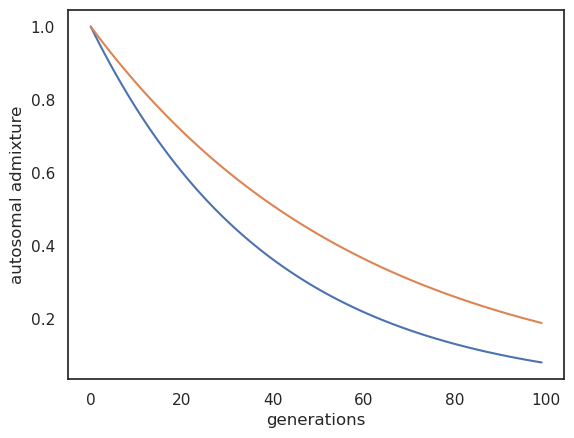

In [14]:
df_subset = calc_df.loc[calc_df.pop_number == 1]
sns.lineplot(data=df_subset, x="generations", y="autosomal admixture")
sns.lineplot(data=df_subset, x="generations", y="chrX admixture")

<Axes: xlabel='generations', ylabel='autosomal admixture'>

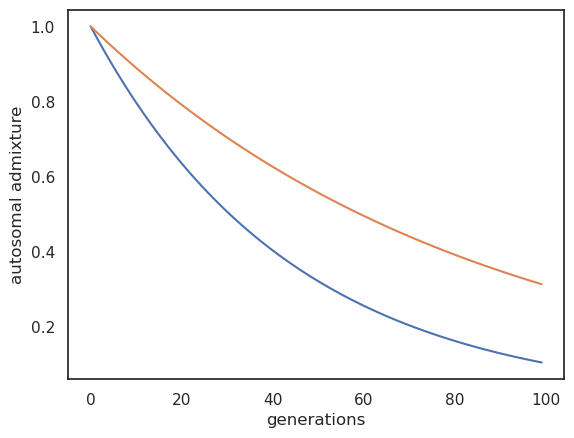

In [15]:
df_subset = calc_df.loc[calc_df.pop_number == 5]
sns.lineplot(data=df_subset, x="generations", y="autosomal admixture")
sns.lineplot(data=df_subset, x="generations", y="chrX admixture")

In [25]:
def admixture_calc_selection(starting_aut, starting_x,
                   gen_admix, admix_prop, male_bias, pop_svamp, aut_s, x_s):
    admixing_aut, admixing_x = starting_aut, starting_x
    auto_perc_his, x_perc_his, gen_his, pop_his = [], [], [], []
    for j in range(pop_svamp):
        auto_perc, x_perc = 1, 1
        for i in range(gen_admix):
            auto_perc_his.append(auto_perc), x_perc_his.append(x_perc), gen_his.append(i), pop_his.append(j+1)
            auto_perc = auto_perc*(1-admix_prop*admixing_aut*(aut_s))
            x_perc = x_perc*(1-admix_prop*admixing_x*(x_s)*(male_bias*2/3+(1-male_bias)*4/3))
        print(auto_perc, x_perc)
        admixing_aut, admixing_x = 1-auto_perc, 1-x_perc
    return pd.DataFrame({"generations": gen_his, "autosomal admixture": auto_perc_his,
                         "chrX admixture": x_perc_his, "pop_number": pop_his})

In [69]:
calc_df_s = admixture_calc_selection(1, 1, 100, 0.026, 1, 10, 0.99, 0.95)

0.0737033481767593 0.1900677071882764
0.08953087299894118 0.26114955998151257
0.09334571284637425 0.29402160052148163
0.09428899495402157 0.31057772482301554
0.09452368846183093 0.3192624406208807
0.09458217121986921 0.3239138102314411
0.09459674998397487 0.32643251901716586
0.09460038457010268 0.3278044778407684
0.0946012907189434 0.3285541937117502
0.09460151663478565 0.32896459785369325


<Axes: xlabel='generations', ylabel='autosomal admixture'>

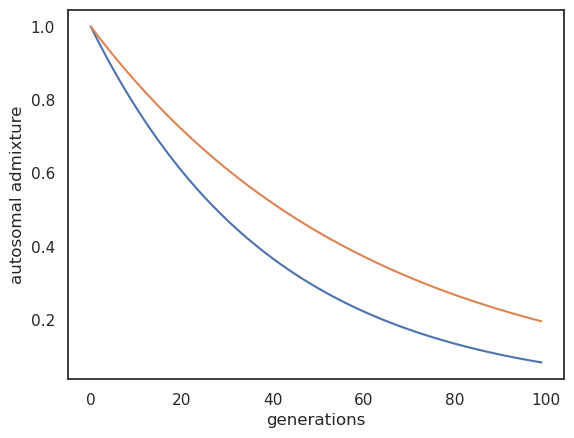

In [50]:
df_subset = calc_df_s.loc[calc_df.pop_number == 1]
sns.lineplot(data=df_subset, x="generations", y="autosomal admixture")
sns.lineplot(data=df_subset, x="generations", y="chrX admixture")

<Axes: xlabel='generations', ylabel='autosomal admixture'>

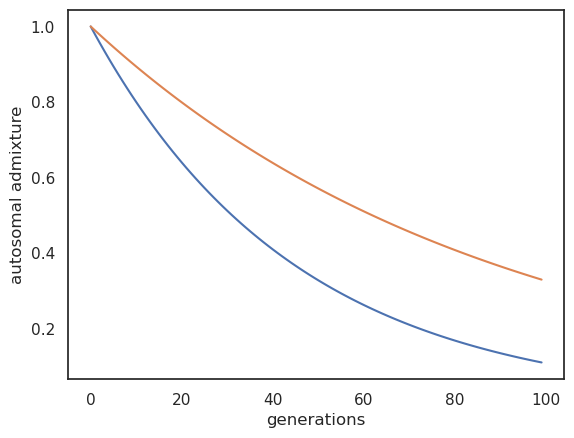

In [52]:
df_subset = calc_df_s.loc[calc_df.pop_number == 5]
sns.lineplot(data=df_subset, x="generations", y="autosomal admixture")
sns.lineplot(data=df_subset, x="generations", y="chrX admixture")

<Axes: xlabel='generations', ylabel='autosomal admixture'>

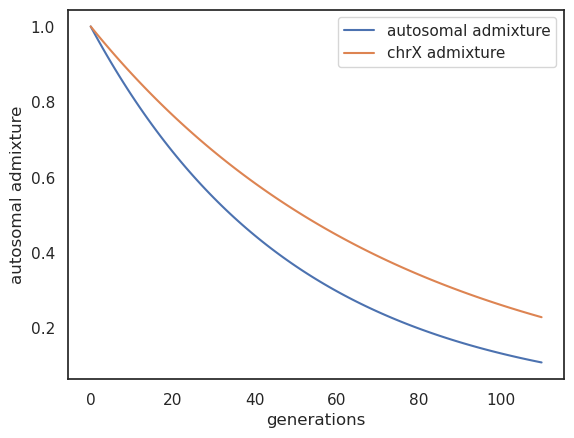

In [4]:
auto_perc, x_perc = 1, 1
gen_admix, admix_prop, male_bias = 111, 0.02, 1
auto_perc_his, x_perc_his, gen_his = [], [], []

for i in range(gen_admix):
    auto_perc_his.append(auto_perc), x_perc_his.append(x_perc), gen_his.append(i)
    #print(auto_perc*100, x_perc*100, x_perc/auto_perc)
    auto_perc = auto_perc*(1-admix_prop)
    x_perc = x_perc*(1-admix_prop*(male_bias*2/3+(1-male_bias)*4/3))
gen_df = pd.DataFrame({"generations": gen_his, "autosomal admixture": auto_perc_his, "chrX admixture": x_perc_his})
sns.lineplot(data=gen_df, x="generations", y="autosomal admixture", label="autosomal admixture")
sns.lineplot(data=gen_df, x="generations", y="chrX admixture", label="chrX admixture")

<Axes: xlabel='generations', ylabel='autosomal admixture'>

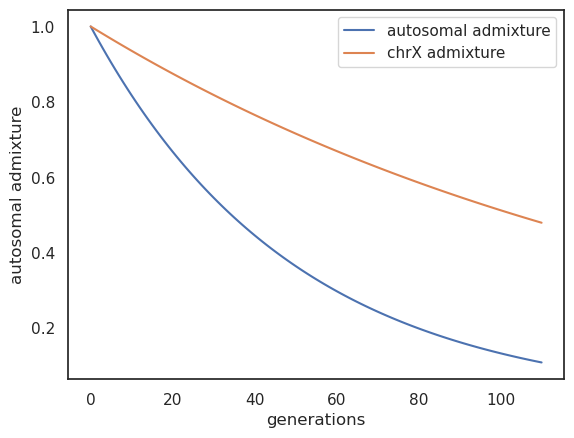

In [5]:
auto_perc, x_perc = 1, 1
gen_admix, admix_prop, male_bias = 111, 0.02, 1
auto_perc_his, x_perc_his, gen_his = [], [], []

for i in range(gen_admix):
    auto_perc_his.append(auto_perc), x_perc_his.append(x_perc), gen_his.append(i)
    #print(auto_perc*100, x_perc*100, x_perc/auto_perc)
    auto_perc = auto_perc*(1-admix_prop)
    x_perc = x_perc*(1-admix_prop*(male_bias*2/3+(1-male_bias)*4/3)*0.5)
gen_df = pd.DataFrame({"generations": gen_his, "autosomal admixture": auto_perc_his, "chrX admixture": x_perc_his})
sns.lineplot(data=gen_df, x="generations", y="autosomal admixture", label="autosomal admixture")
sns.lineplot(data=gen_df, x="generations", y="chrX admixture", label="chrX admixture")

<Axes: xlabel='generations', ylabel='autosomal admixture'>

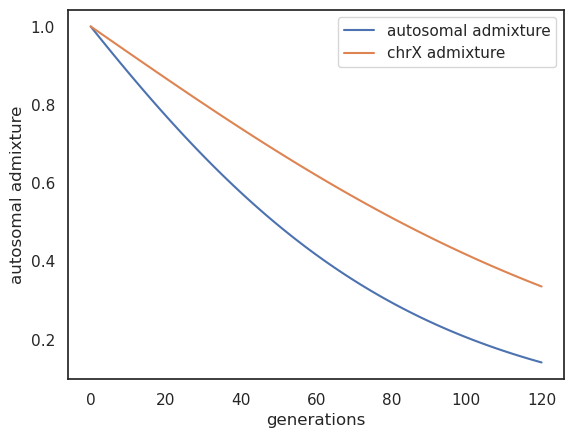

In [6]:
auto_perc, x_perc = 1, 1
gen_admix, admix_prop, male_bias = 121, 0.02, 1
auto_perc_his, x_perc_his, gen_his = [], [], []

for i in range(gen_admix):
    auto_perc_his.append(auto_perc), x_perc_his.append(x_perc), gen_his.append(i)
    #print(auto_perc*100, x_perc*100, x_perc/auto_perc)
    auto_perc = auto_perc*(1-admix_prop*(1-auto_perc*0.4))
    x_perc = x_perc*(1-admix_prop*(male_bias*2/3+(1-male_bias)*4/3)*(1-x_perc*0.5))
gen_df = pd.DataFrame({"generations": gen_his, "autosomal admixture": auto_perc_his, "chrX admixture": x_perc_his})
sns.lineplot(data=gen_df, x="generations", y="autosomal admixture", label="autosomal admixture")
sns.lineplot(data=gen_df, x="generations", y="chrX admixture", label="chrX admixture")

Rfmix loading

In [17]:
meta_data_samples = pd.read_csv("../data/Papio_metadata_with_clustering_sci.txt", sep =" ")
rfmix_path = "/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_gen100/eth_olive_focus/"
mapping_df = pd.read_csv(rfmix_path + "ref_names.txt", sep = "\t", names=["ID", "Origin"])

pop_mapping = {}
o_order = sorted((mapping_df.Origin.unique()))
for o in range(len((mapping_df.Origin.unique()))):
    pop_mapping[o_order[o]] = o

north_south_mapping = {'Hamadryas, Ethiopia': 1,
 'Cynocephalus, Central Tanzania': 0,
 'Papio, Senegal': 0,
 'Anubis, Tanzania': 0}

def create_paint_df_ind_compressed(df, ind, mapping, ns_map):
    d = {}
    max_pos = int(df.epos.iloc[-1])
    df = df.loc[df[ind].shift() != df[ind]].reset_index()
    df["epos"] = pd.concat([df.spos.iloc[1:], pd.Series(max_pos)], ignore_index=True)
    d["pos"] = df.spos
    d["end_pos"] = df.epos -1
    d["length"] = df.epos - df.spos
    d["reference"] = df[ind].map(mapping)
    d["n/s"] = d["reference"].map(ns_map)
    d["individual"] = ind[:-2]
    d["haplotype"] = ind[-1:]
    return pd.DataFrame(d)

In [18]:
df_l = []
for chrom in ["chr{}".format(x) for x in (range(1, 21))]+["all_chrX", "female_chrX"]:
    print(chrom)
    input_file = rfmix_path + "{}.msp.tsv".format(chrom)
    chr_df = pd.read_csv(input_file, sep = "\t", header=1)
    file = open(input_file, 'r')
    line1 = file.readline()
    file.close()
    number_subpop_mapping = {}
    for subpop in line1.strip().split("\t"):
        # Splitting to create lists containing two values - subpop and number.
        subpop_number = subpop.split(": ")[-1].split("=")
        number_subpop_mapping[int(subpop_number[1])] = subpop_number[0]
    for hap in chr_df.columns[6:]:
        paint_df = create_paint_df_ind_compressed(chr_df, hap, number_subpop_mapping, north_south_mapping)
        paint_df["chrom"] = "{}".format(chrom)
        df_l.append(paint_df)
length_df = pd.concat(df_l)

chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
chr20
all_chrX
female_chrX


In [19]:
@window(size=100000)
def north_sum(df):
    return (df.end-df.start).sum()

def add_dummy(c_df):
    inds = c_df.individual.unique()
    dummy_df = pd.DataFrame({"individual": np.repeat(inds, 2)})
    dummy_df["haplotype"] = pd.Series(["0", "1"]*len(inds))
    dummy_df["end"], dummy_df["start"] = c_df.end.max(), c_df.end.max()
    dummy_df["chrom"] = c_df.chrom.unique()[0]
    return dummy_df

rfmix_path = "/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_gen100/eth_olive_focus/"
df_l = []

for c in length_df.chrom.unique():
    output_file = rfmix_path + "{}.windows.txt".format(c)
    print(output_file)
    if os.path.exists(output_file) == False:
        c_df = length_df.loc[(length_df.chrom == c) & (length_df["n/s"] == 1)]
        c_df = c_df.rename(columns={"pos": "start", "end_pos": "end"})
        dummy_added = pd.concat([c_df, add_dummy(c_df)]).reset_index()
        df = dummy_added.groupby(['chrom', 'individual', 'haplotype'])[["end", "start"]].apply(north_sum).reset_index(drop=True, level=-1).reset_index()
        df.to_csv(output_file, index=False, sep="\t")

/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_gen100/eth_olive_focus/chr1.windows.txt
/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_gen100/eth_olive_focus/chr2.windows.txt
/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_gen100/eth_olive_focus/chr3.windows.txt
/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_gen100/eth_olive_focus/chr4.windows.txt
/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_gen100/eth_olive_focus/chr5.windows.txt
/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_gen100/eth_olive_focus/chr6.windows.txt
/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_gen100/eth_olive_focus/chr7.windows.txt
/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_gen100/eth_olive_focus/chr8.windows.txt
/home/eriks/baboondiversity/people/eriks/second_analysis_baboons

First, diversity and Fst estimates for the ethiopian olives.

In [20]:
zarr_dir = "/faststorage/project/baboondiversity/data/PG_panu3_zarr_12_03_2021/callset.zarr/chrX"
#Opening the zarr data
callset = zarr.open_group(zarr_dir, mode="r")
gt = allel.GenotypeArray(callset["calldata/GT"])
pos = callset["variants/POS"][:]

In [21]:
meta_data_samples.C_origin.unique()

array(['Cynocephalus, Central Tanzania', 'Anubis, Kenya',
       'Kindae, Zambia', 'Gelada, Captive', 'Hamadryas, Ethiopia',
       'Anubis, Tanzania', 'Cynocephalus, Western Tanzania',
       'Papio, Senegal', 'Ursinus, Zambia', 'Anubis, Ethiopia'],
      dtype=object)

In [22]:
gog_index = meta_data_samples.loc[(meta_data_samples.Origin == "Gog Woreda, Gambella region, Ethiopia") &
                                    (meta_data_samples.Sex == "F")].callset_index
gog_gt = gt.take(gog_index, axis=1)
filoha_index = meta_data_samples.loc[(meta_data_samples.Origin == "Filoha, Ethiopia") &
                                    (meta_data_samples.Sex == "F")].callset_index
filoha_gt = gt.take(filoha_index, axis=1)
tanza_olive_index = meta_data_samples.loc[(meta_data_samples.C_origin == "Anubis, Tanzania") &
                                    (meta_data_samples.Sex == "F")].callset_index
tanza_olive_gt = gt.take(tanza_olive_index, axis=1)

In [23]:
window_size = int(100000)
pi, windows, n_bases, counts = allel.windowed_diversity(pos, ac=gog_gt.count_alleles(), size=window_size)
start_points = list(range(0, len(pi)*window_size, window_size))
gog_df = pd.DataFrame({"pi": pi, "chrom": "chrX", "pop_id": "Mikumi", "start": start_points})

In [24]:
pi, windows, n_bases, counts = allel.windowed_diversity(pos, ac=filoha_gt.count_alleles(), size=window_size)
start_points = list(range(0, len(pi)*window_size, window_size))
filoha_df = pd.DataFrame({"pi": pi, "chrom": "chrX", "pop_id": "Mikumi", "start": start_points})

In [25]:
pi, windows, n_bases, counts = allel.windowed_diversity(pos, ac=tanza_olive_gt.count_alleles(), size=window_size)
start_points = list(range(0, len(pi)*window_size, window_size))
tanza_df = pd.DataFrame({"pi": pi, "chrom": "chrX", "pop_id": "Mikumi", "start": start_points})

In [26]:
gog_df.pi.mean(), filoha_df.pi.mean(), tanza_df.pi.mean()

(0.0006940277845921347, 0.0008098165644076065, 0.0009473852668572449)

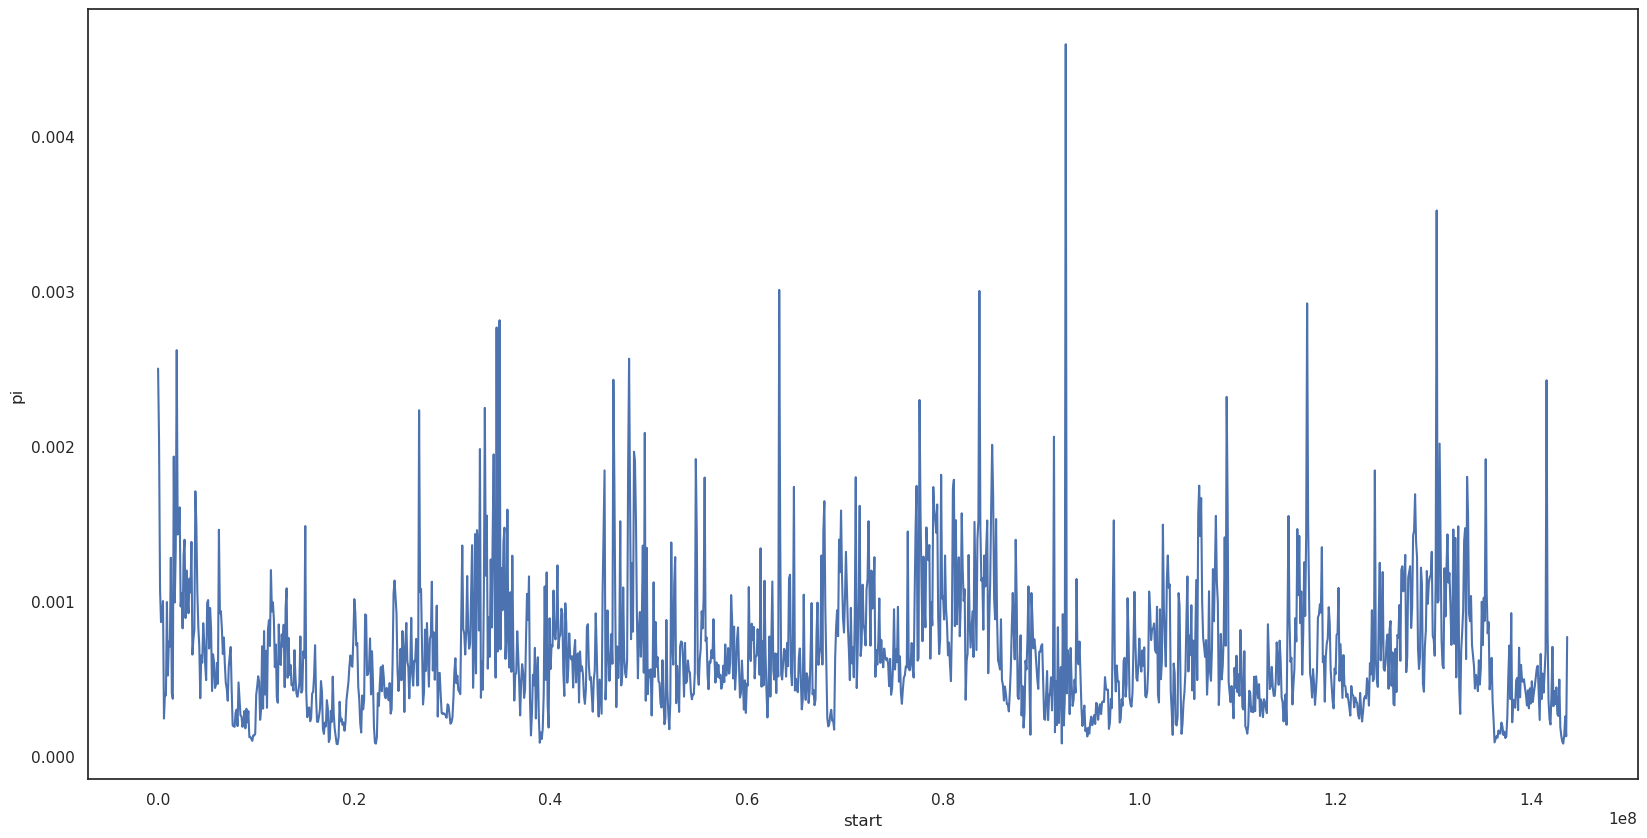

In [27]:
plt.figure(figsize=(20,10))
g = sns.lineplot(data=gog_df, x="start", y="pi")

In [28]:
gog_df["norm_pi"] = gog_df.pi/(gog_df.pi.mean())/(tanza_df.pi/tanza_df.pi.mean())

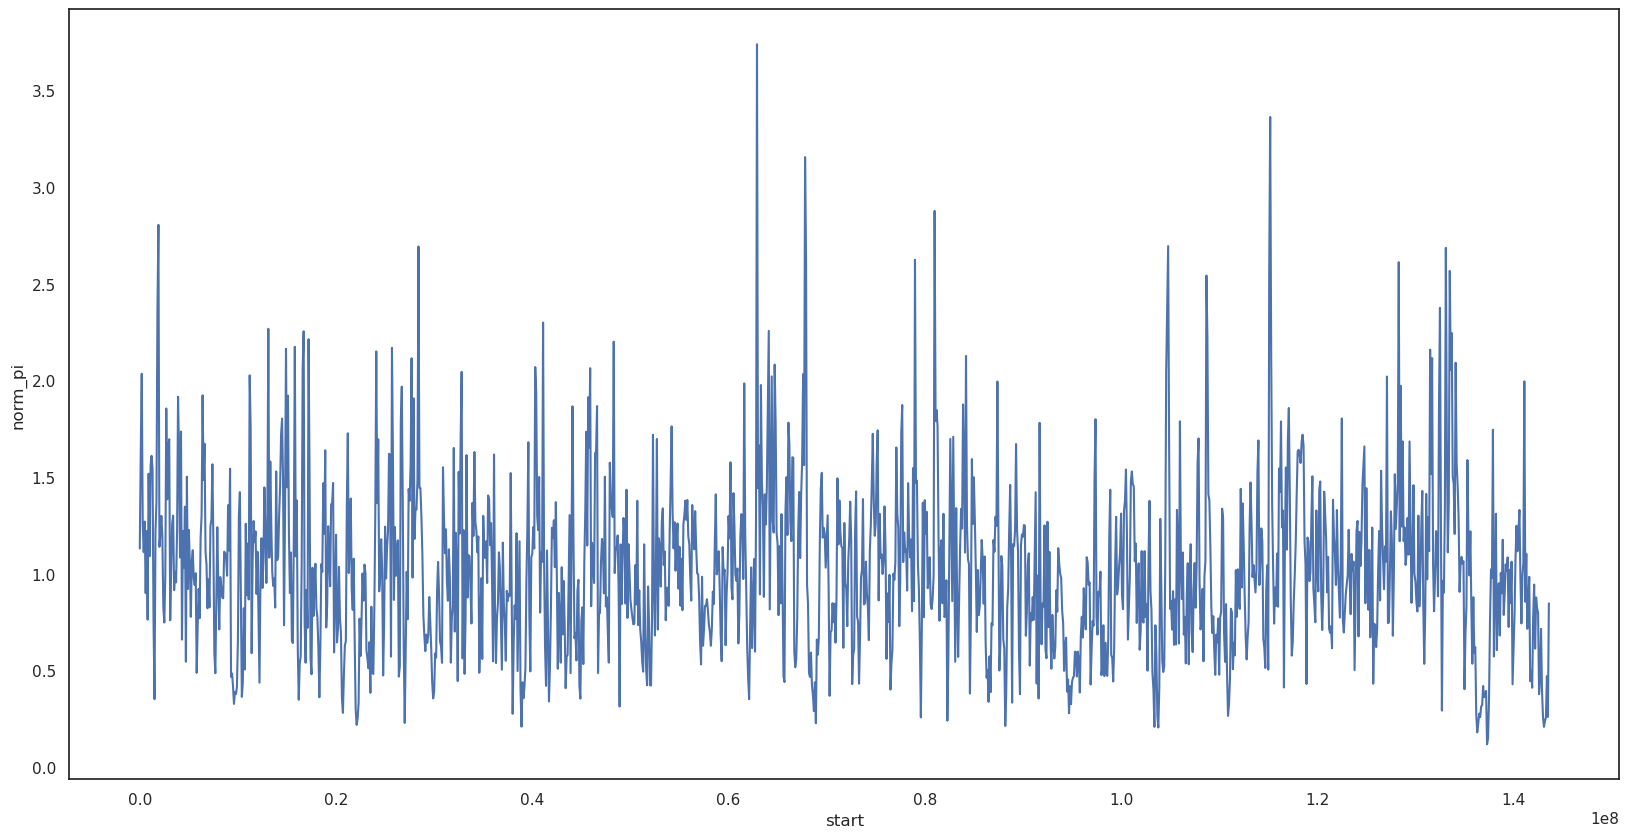

In [29]:
plt.figure(figsize=(20,10))
g = sns.lineplot(data=gog_df, x="start", y="norm_pi")

In [33]:
gog_df.loc[gog_df.pi < 0.00013].start

93        9300000
94        9400000
95        9500000
96        9600000
174      17400000
175      17500000
182      18200000
183      18300000
184      18400000
221      22100000
222      22200000
223      22300000
389      38900000
391      39100000
921      92100000
947      94700000
1362    136200000
1363    136300000
1365    136500000
1373    137300000
1374    137400000
1431    143100000
1432    143200000
1435    143500000
Name: start, dtype: int64

In [44]:
gog_df.loc[gog_df.norm_pi < 0.3].start

207      20700000
220      22000000
221      22100000
222      22200000
270      27000000
380      38000000
389      38900000
687      68700000
689      68900000
796      79600000
823      82300000
882      88200000
947      94700000
1034    103400000
1037    103700000
1038    103800000
1109    110900000
1327    132700000
1362    136200000
1363    136300000
1364    136400000
1365    136500000
1366    136600000
1373    137300000
1374    137400000
1430    143000000
1431    143100000
1432    143200000
1433    143300000
1435    143500000
Name: start, dtype: int64

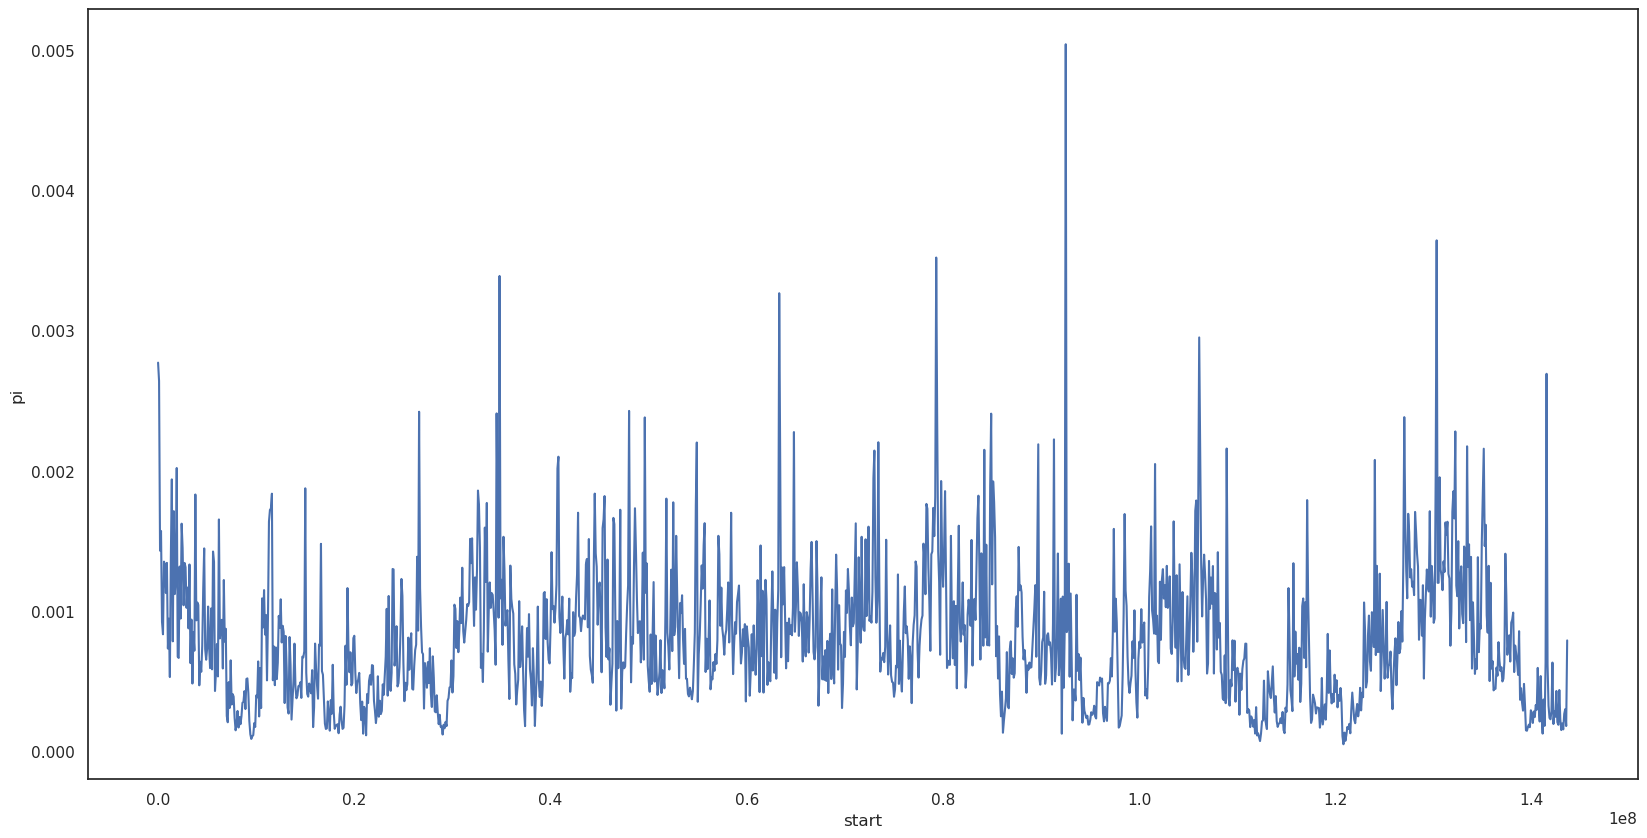

In [36]:
plt.figure(figsize=(20,10))
g = sns.lineplot(data=filoha_df, x="start", y="pi")

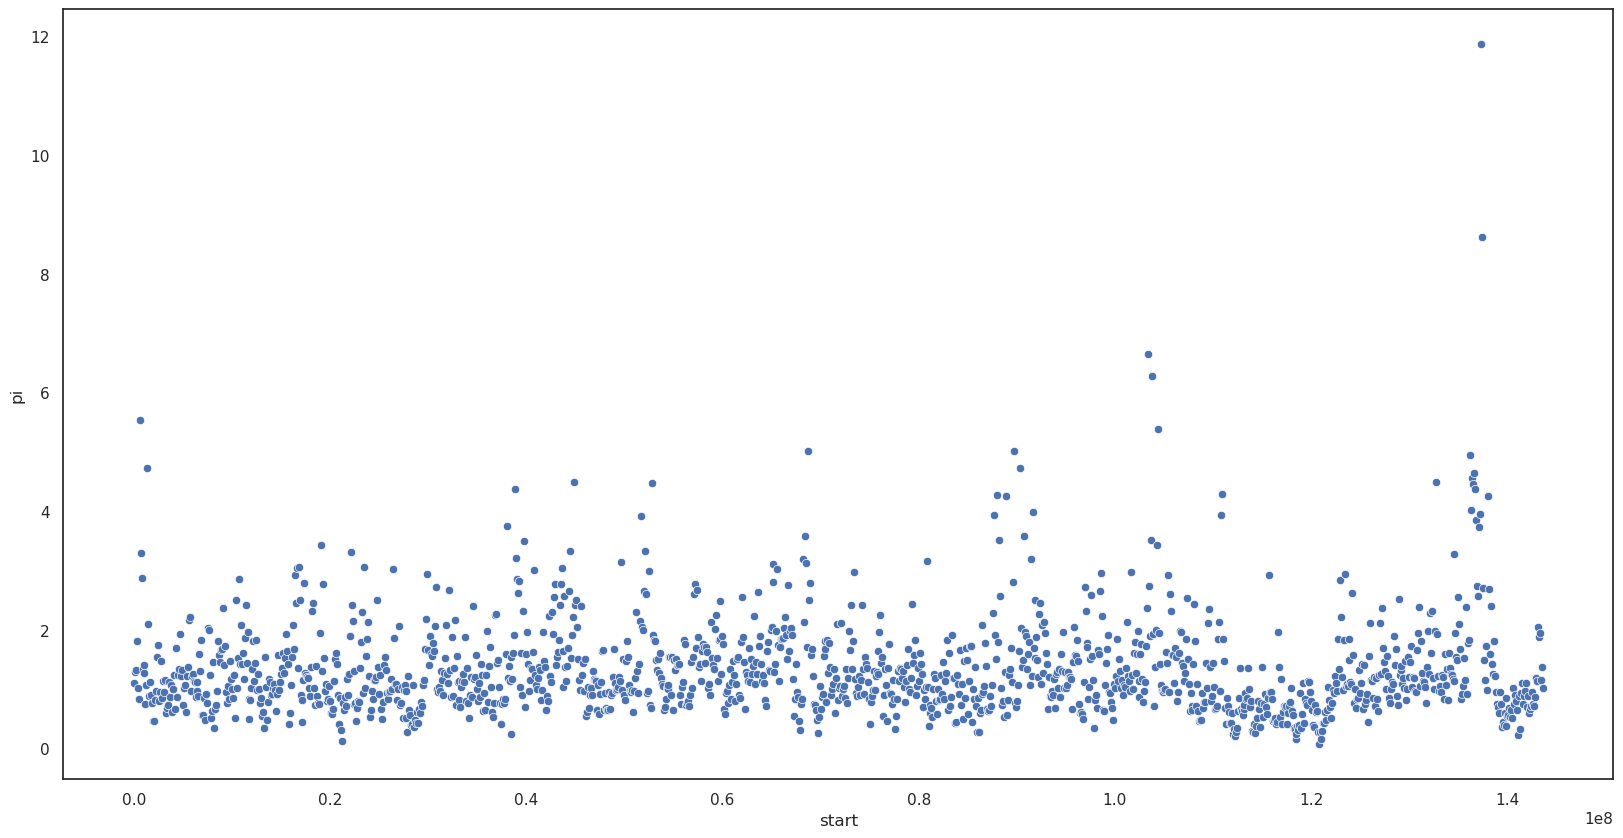

In [37]:
plt.figure(figsize=(20,10))
g = sns.scatterplot(x=filoha_df.start, y=filoha_df.pi/gog_df.pi)

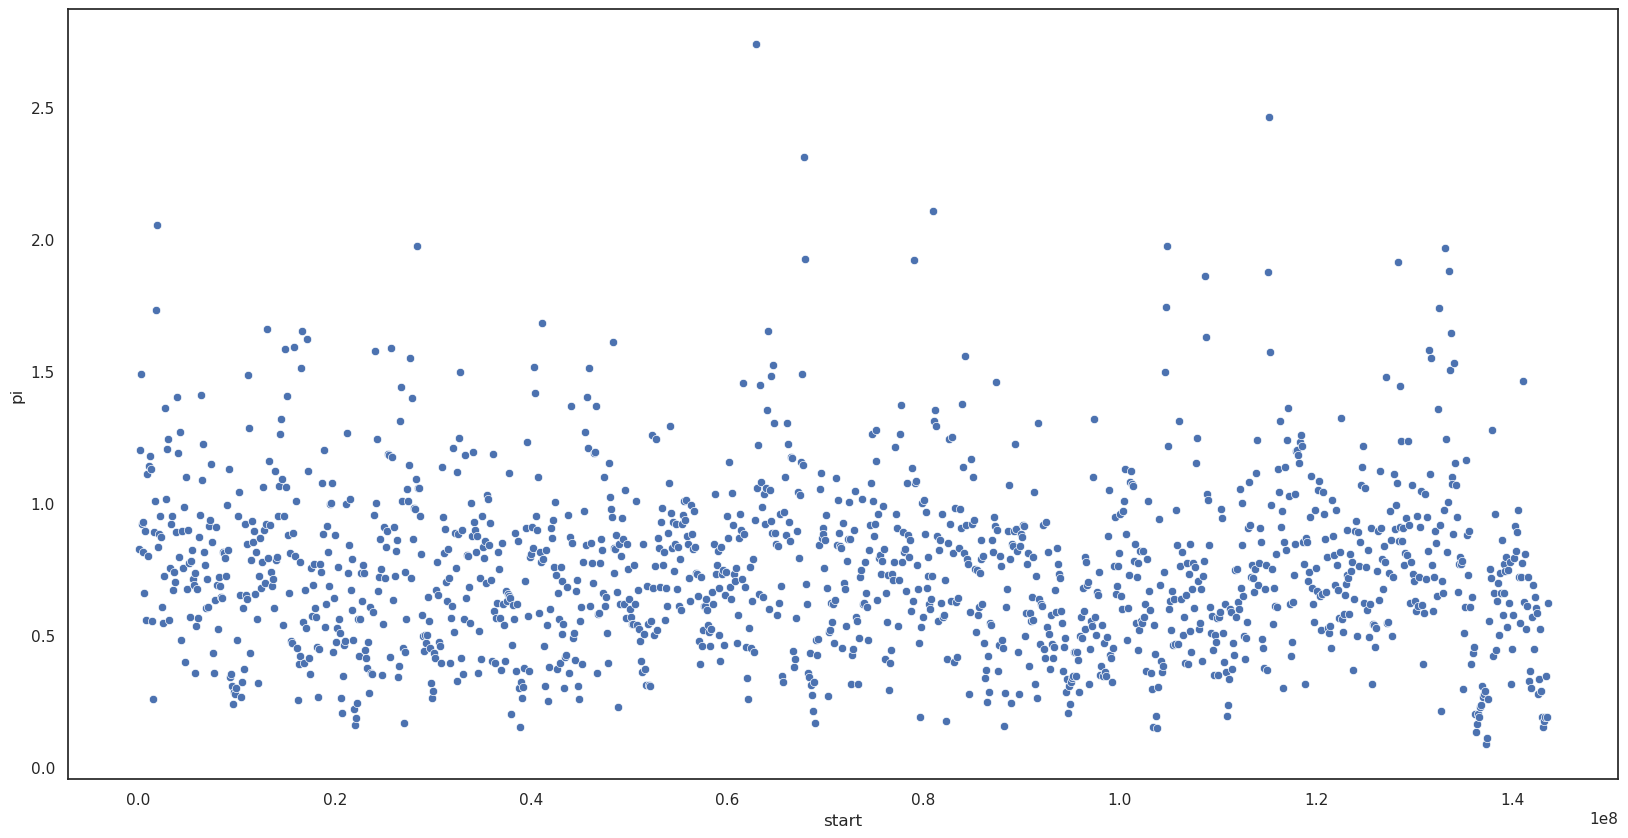

In [38]:
plt.figure(figsize=(20,10))
g = sns.scatterplot(x=filoha_df.start, y=gog_df.pi/tanza_df.pi)

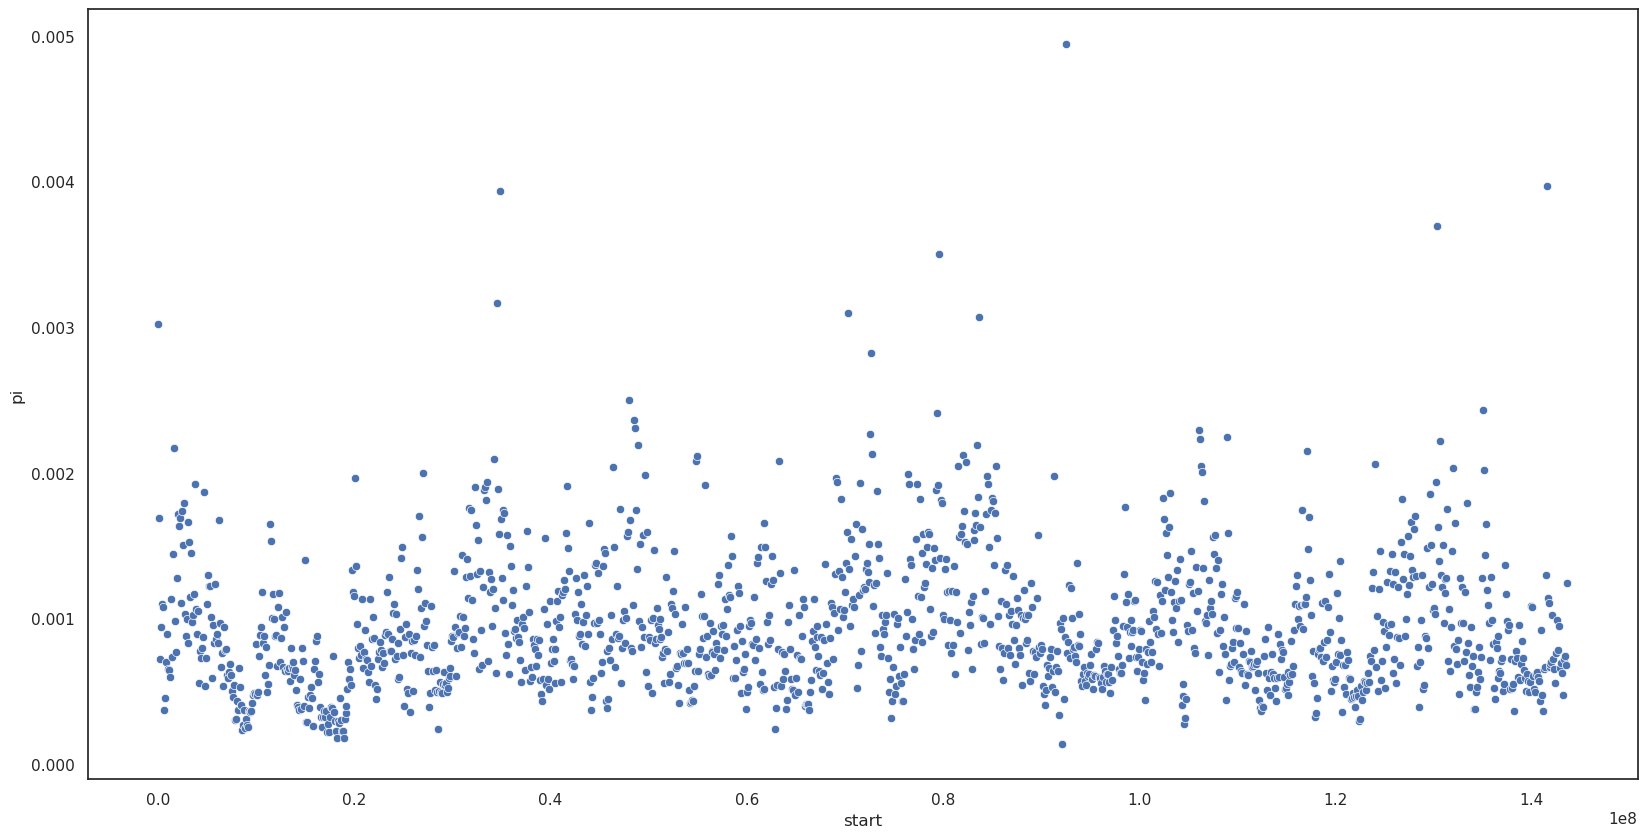

In [39]:
plt.figure(figsize=(20,10))
g = sns.scatterplot(data=tanza_df, x="start", y="pi")

In [45]:
def fst(ac1, ac2):
    num, den = allel.hudson_fst(ac1, ac2, fill=0)
    return np.sum(num) / np.sum(den)

In [46]:
out, windows, counts = allel.windowed_statistic(pos, (gog_gt.count_alleles(), filoha_gt.count_alleles()), fst, size=window_size)
fst_df_gf = pd.DataFrame({"fst": out, "chrom": "chrX", "pop_id": "Gog_Fil_Fst", "start": start_points})

out, windows, counts = allel.windowed_statistic(pos, (gog_gt.count_alleles(), tanza_olive_gt.count_alleles()), fst, size=window_size)
fst_df_gt = pd.DataFrame({"fst": out, "chrom": "chrX", "pop_id": "Gog_Tanz_Fst", "start": start_points})

out, windows, counts = allel.windowed_statistic(pos, (filoha_gt.count_alleles(), tanza_olive_gt.count_alleles()), fst, size=window_size)
fst_df_tf = pd.DataFrame({"fst": out, "chrom": "chrX", "pop_id": "Fil_Tanz_Fst", "start": start_points})

<Axes: xlabel='start', ylabel='fst'>

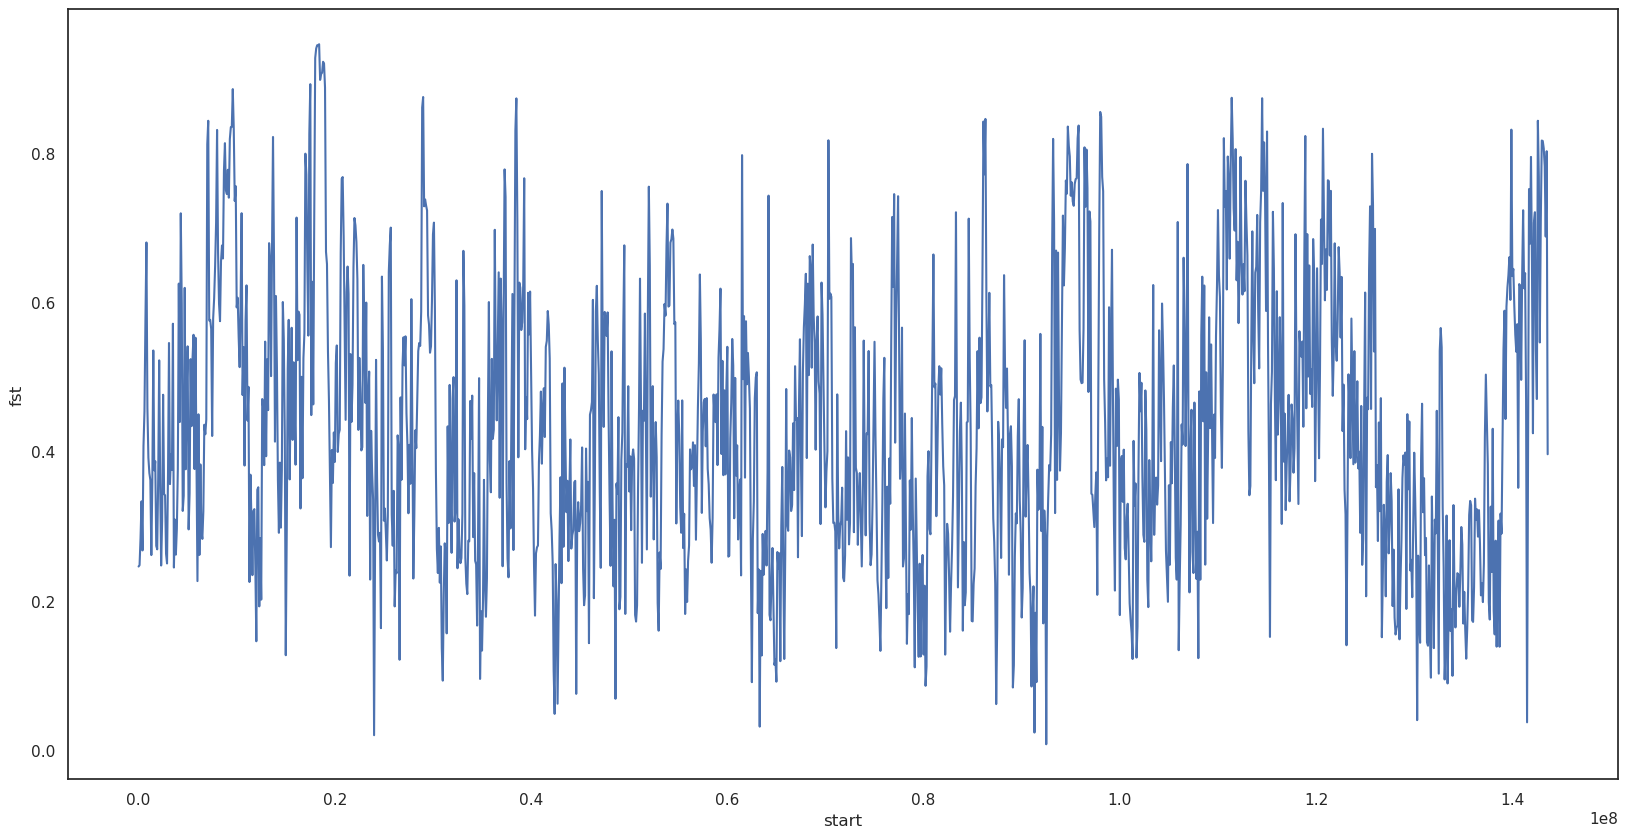

In [47]:
plt.figure(figsize=(20,10))

sns.lineplot(data=fst_df_gf, x="start", y="fst")

In [53]:
fst_df_gf.loc[fst_df_gf.fst > 0.85]

fst chrom       pop_id      start
96    0.885256  chrX  Gog_Fil_Fst    9600000
175   0.891856  chrX  Gog_Fil_Fst   17500000
180   0.926909  chrX  Gog_Fil_Fst   18000000
181   0.939612  chrX  Gog_Fil_Fst   18100000
182   0.943907  chrX  Gog_Fil_Fst   18200000
183   0.944129  chrX  Gog_Fil_Fst   18300000
184   0.945277  chrX  Gog_Fil_Fst   18400000
185   0.897588  chrX  Gog_Fil_Fst   18500000
186   0.905254  chrX  Gog_Fil_Fst   18600000
187   0.907182  chrX  Gog_Fil_Fst   18700000
188   0.921829  chrX  Gog_Fil_Fst   18800000
189   0.919623  chrX  Gog_Fil_Fst   18900000
190   0.887359  chrX  Gog_Fil_Fst   19000000
289   0.860652  chrX  Gog_Fil_Fst   28900000
290   0.874674  chrX  Gog_Fil_Fst   29000000
385   0.872823  chrX  Gog_Fil_Fst   38500000
980   0.854686  chrX  Gog_Fil_Fst   98000000
1114  0.873652  chrX  Gog_Fil_Fst  111400000
1145  0.873041  chrX  Gog_Fil_Fst  114500000

<Axes: xlabel='start', ylabel='fst'>

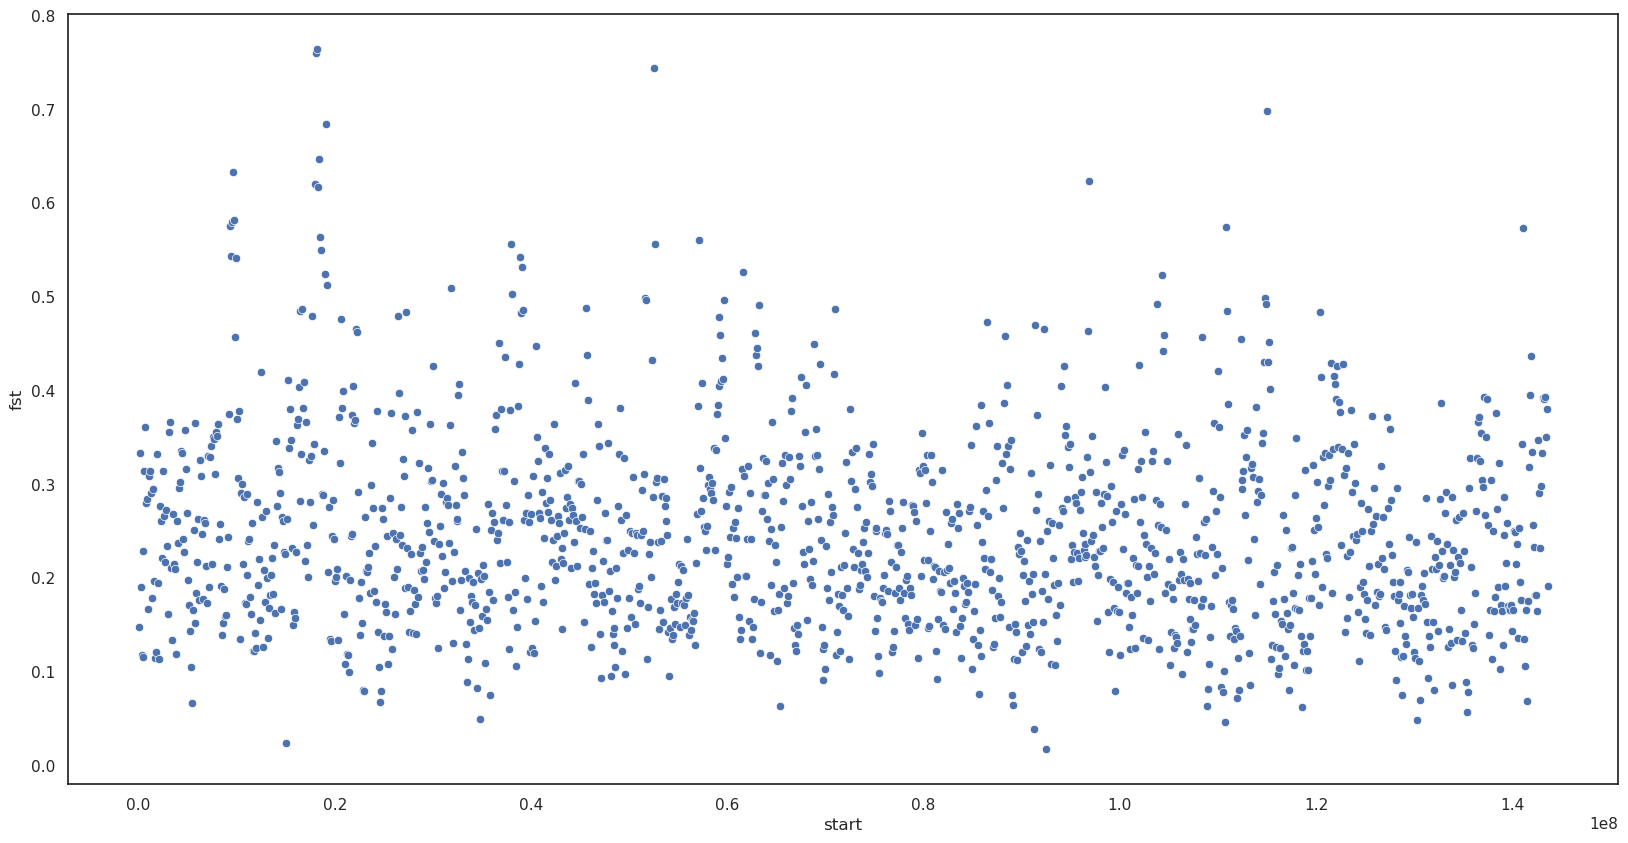

In [48]:
plt.figure(figsize=(20,10))

sns.scatterplot(data=fst_df_gt, x="start", y="fst")

<Axes: xlabel='start', ylabel='Relative Fst'>

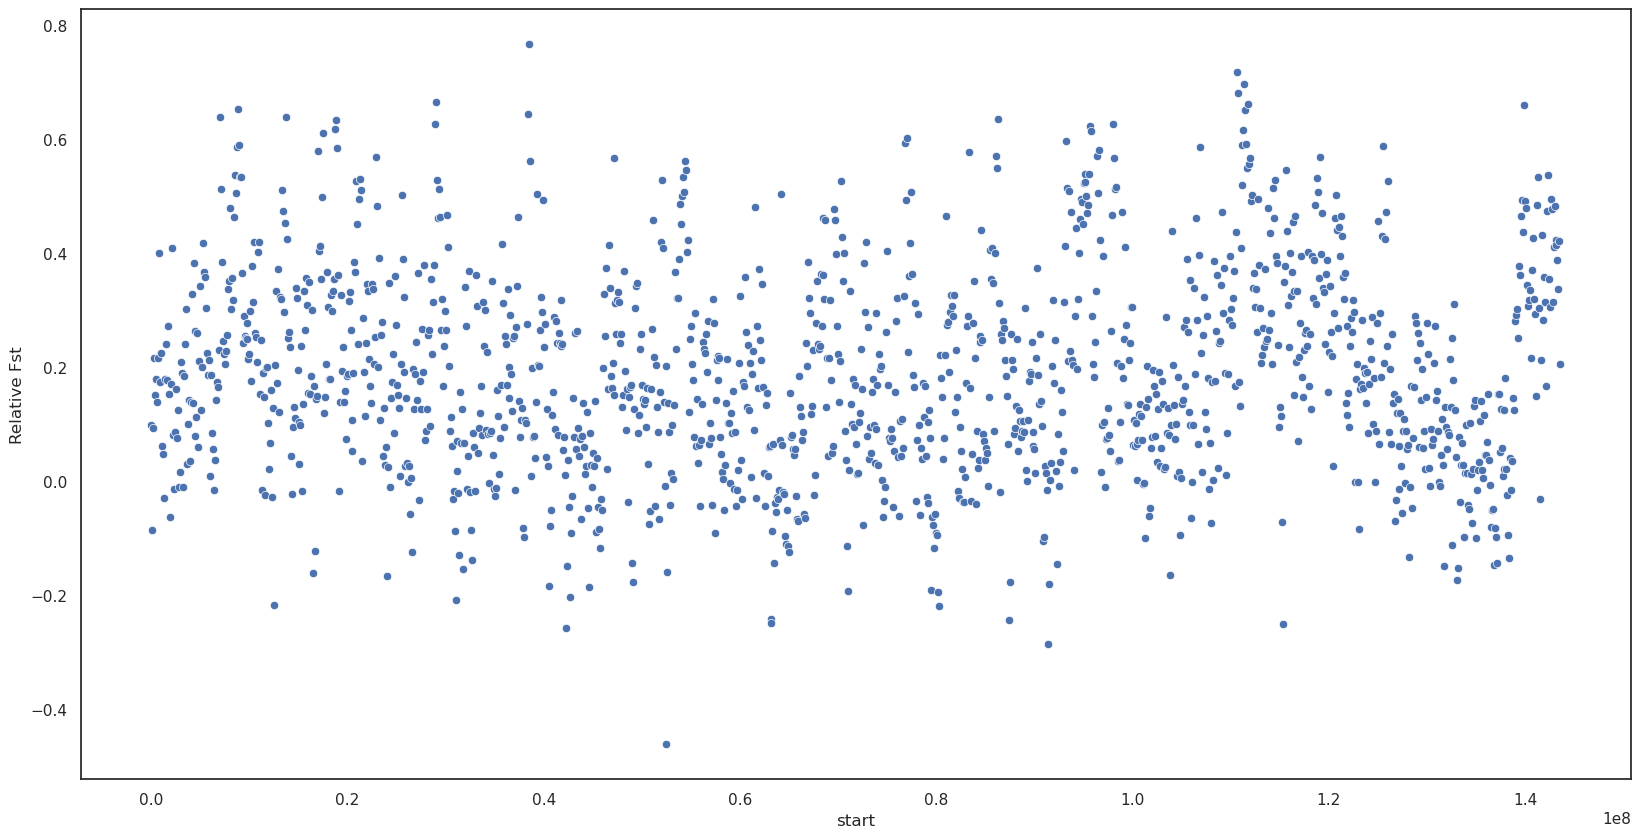

In [61]:
fst_df_gt["Relative Fst"] = (fst_df_gf.fst-fst_df_gt.fst)
plt.figure(figsize=(20,10))

sns.scatterplot(data=fst_df_gt, x="start", y="Relative Fst")

In [58]:
fst_df_gf.fst.mean(), fst_df_gt.fst.mean()

(0.43489202101477403, 0.2448715635992007)

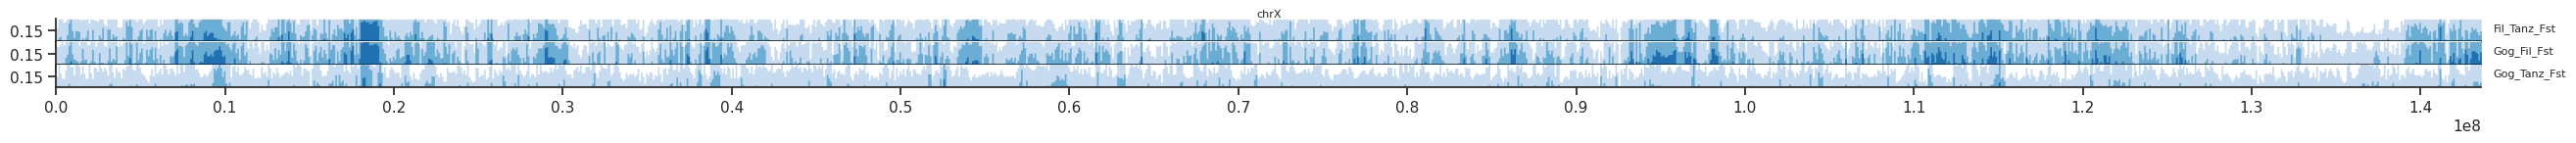

In [50]:
concat_df = pd.concat([fst_df_gf, fst_df_gt, fst_df_tf])
fig = horizonplot(concat_df, 'fst', width=2, col='chrom', row='pop_id', size=0.3, aspect=100)


Checking a single inds Fst relationships.

In [28]:
gog_ind_index = meta_data_samples.loc[(meta_data_samples.Origin == "Gog Woreda, Gambella region, Ethiopia") &
                                    (meta_data_samples.Sex == "F") &
                                     (meta_data_samples.PGDP_ID == "PD_0721")].callset_index
gog_ind_gt = gt.take(gog_ind_index, axis=1)

out, windows, counts = allel.windowed_statistic(pos, (gog_ind_gt.count_alleles(), filoha_gt.count_alleles()), fst, size=window_size)
fst_df_gf = pd.DataFrame({"fst": out, "chrom": "chrX", "pop_id": "Gog_Fil_Fst", "start": start_points})

out, windows, counts = allel.windowed_statistic(pos, (gog_ind_gt.count_alleles(), tanza_olive_gt.count_alleles()), fst, size=window_size)
fst_df_gt = pd.DataFrame({"fst": out, "chrom": "chrX", "pop_id": "Gog_Tanz_Fst", "start": start_points})

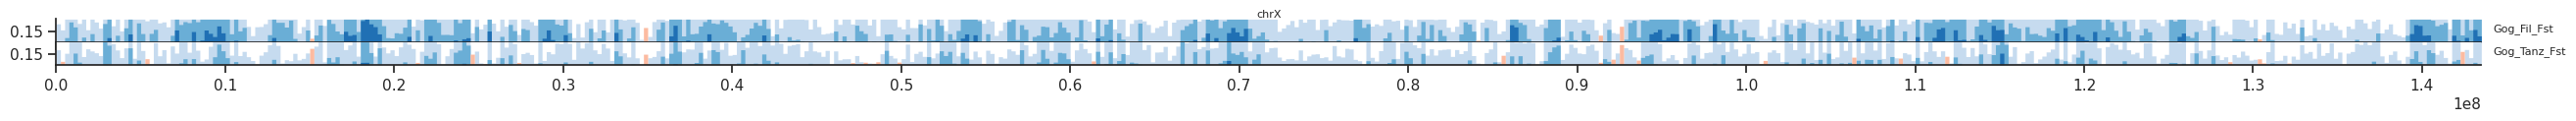

In [29]:
concat_df = pd.concat([fst_df_gf, fst_df_gt])
fig = horizonplot(concat_df, 'fst', width=2, col='chrom', row='pop_id', size=0.3, aspect=100)


In [62]:
df_l = []
for c in length_df.chrom.unique():
    read_file = rfmix_path + "{}.windows.txt".format(c)
    df = pd.read_csv(read_file, sep="\t")
    df_l.append(df)
window_df_eth = pd.concat(df_l)

In [64]:
mean_df = window_df_eth.groupby(by=["individual", "chrom", "start"])[["north_sum"]].mean().reset_index()
mean_df["north"] = (mean_df.north_sum*2)-100000
ethiopia = meta_data_samples.loc[meta_data_samples.Origin == "Gog Woreda, Gambella region, Ethiopia"].PGDP_ID
eth_olive_mean_df = mean_df.loc[(mean_df.individual.isin(ethiopia))]

chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
chr20
all_chrX
female_chrX


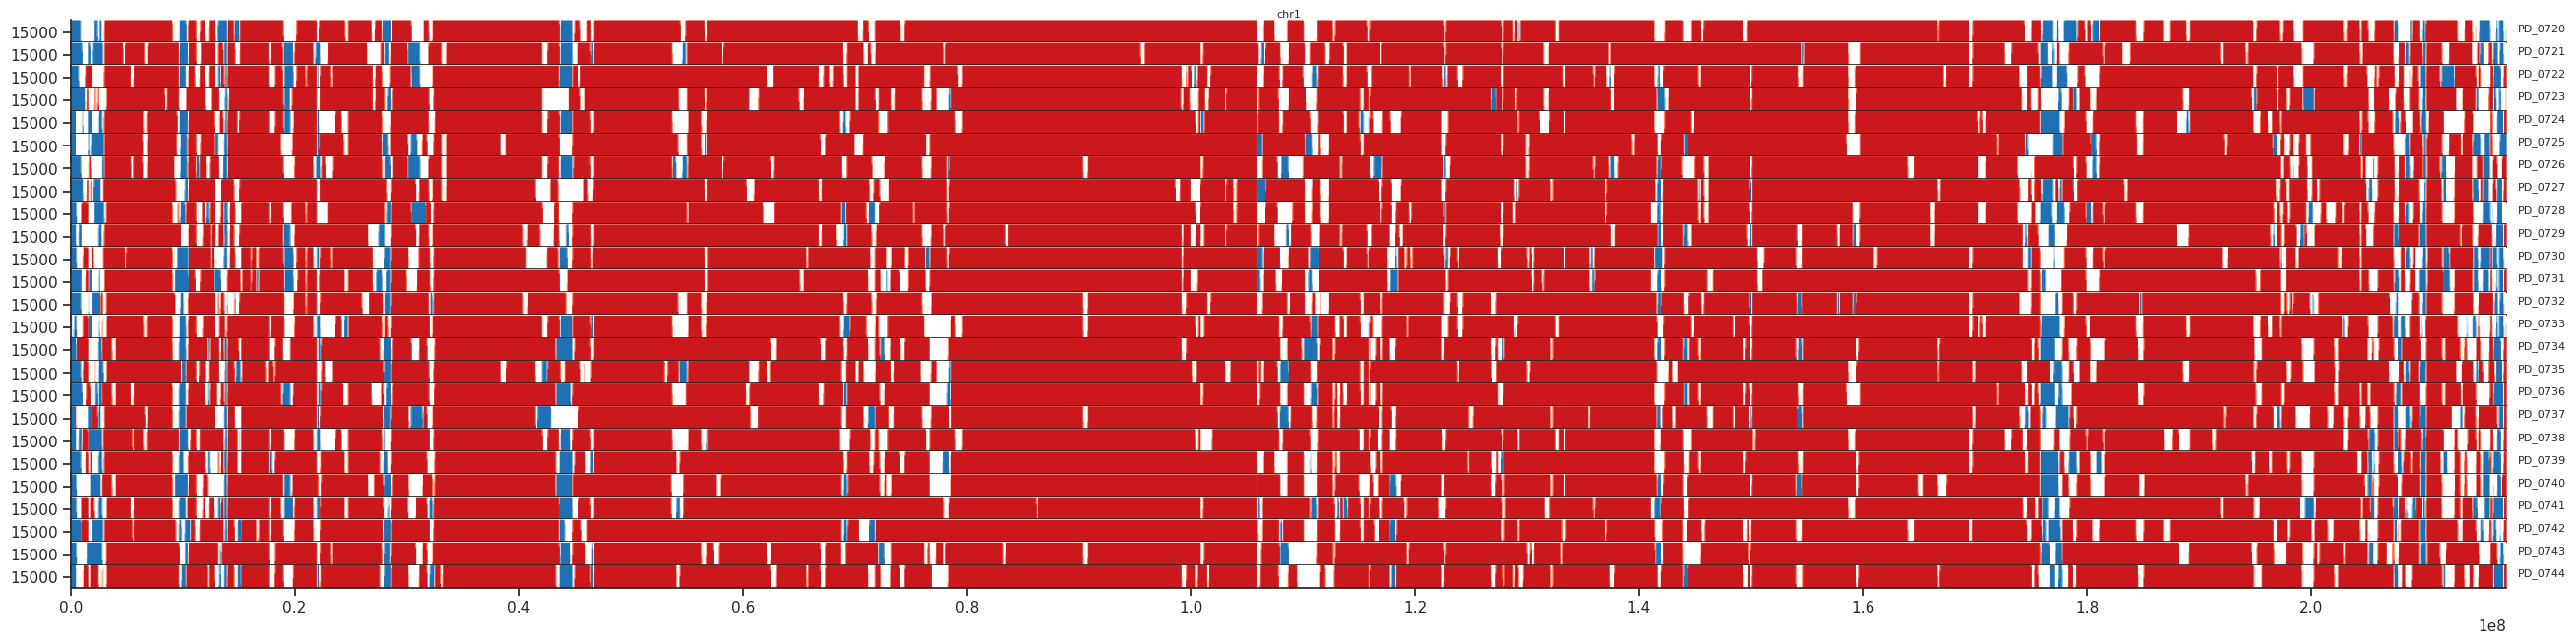

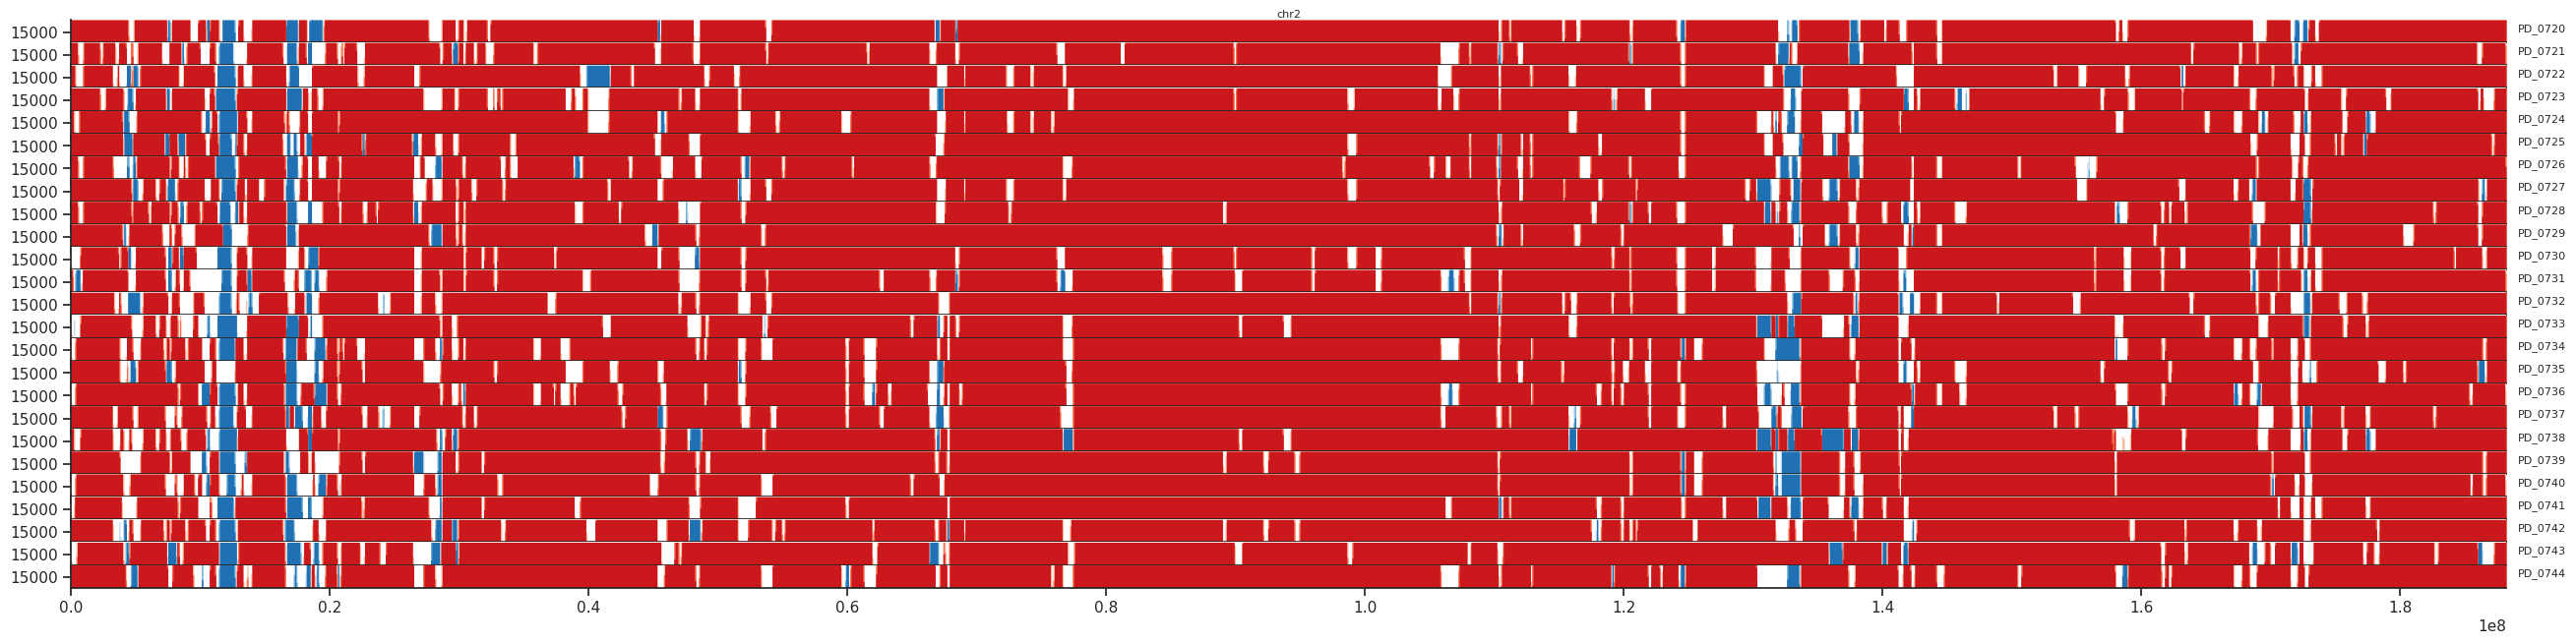

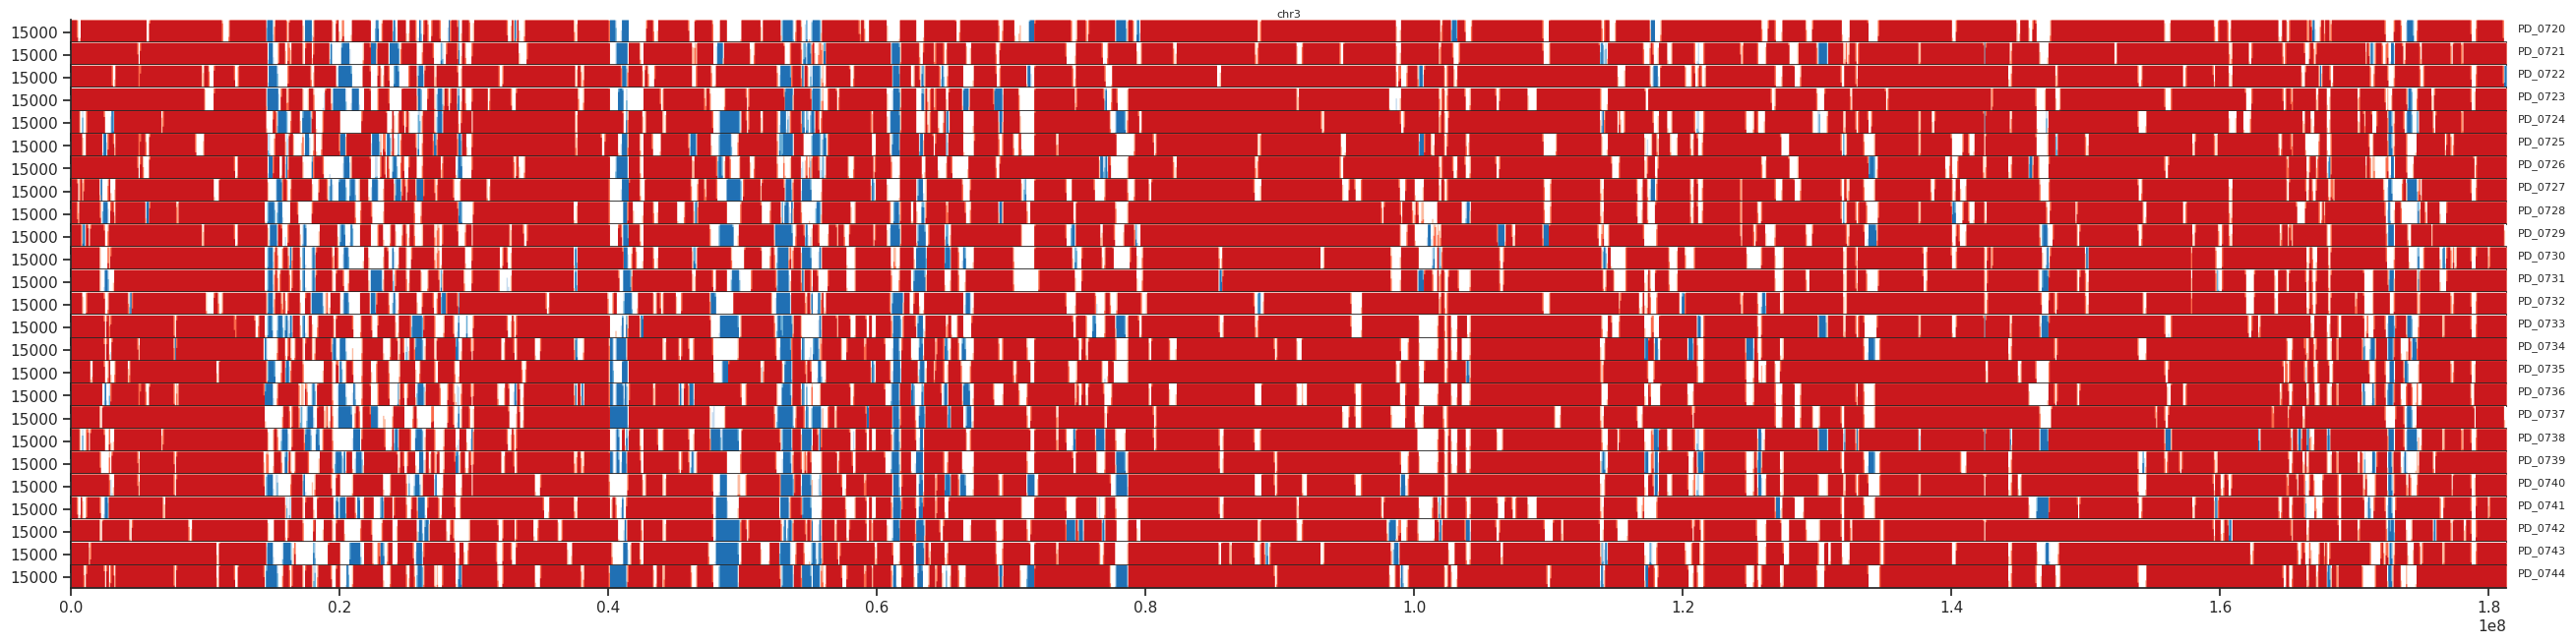

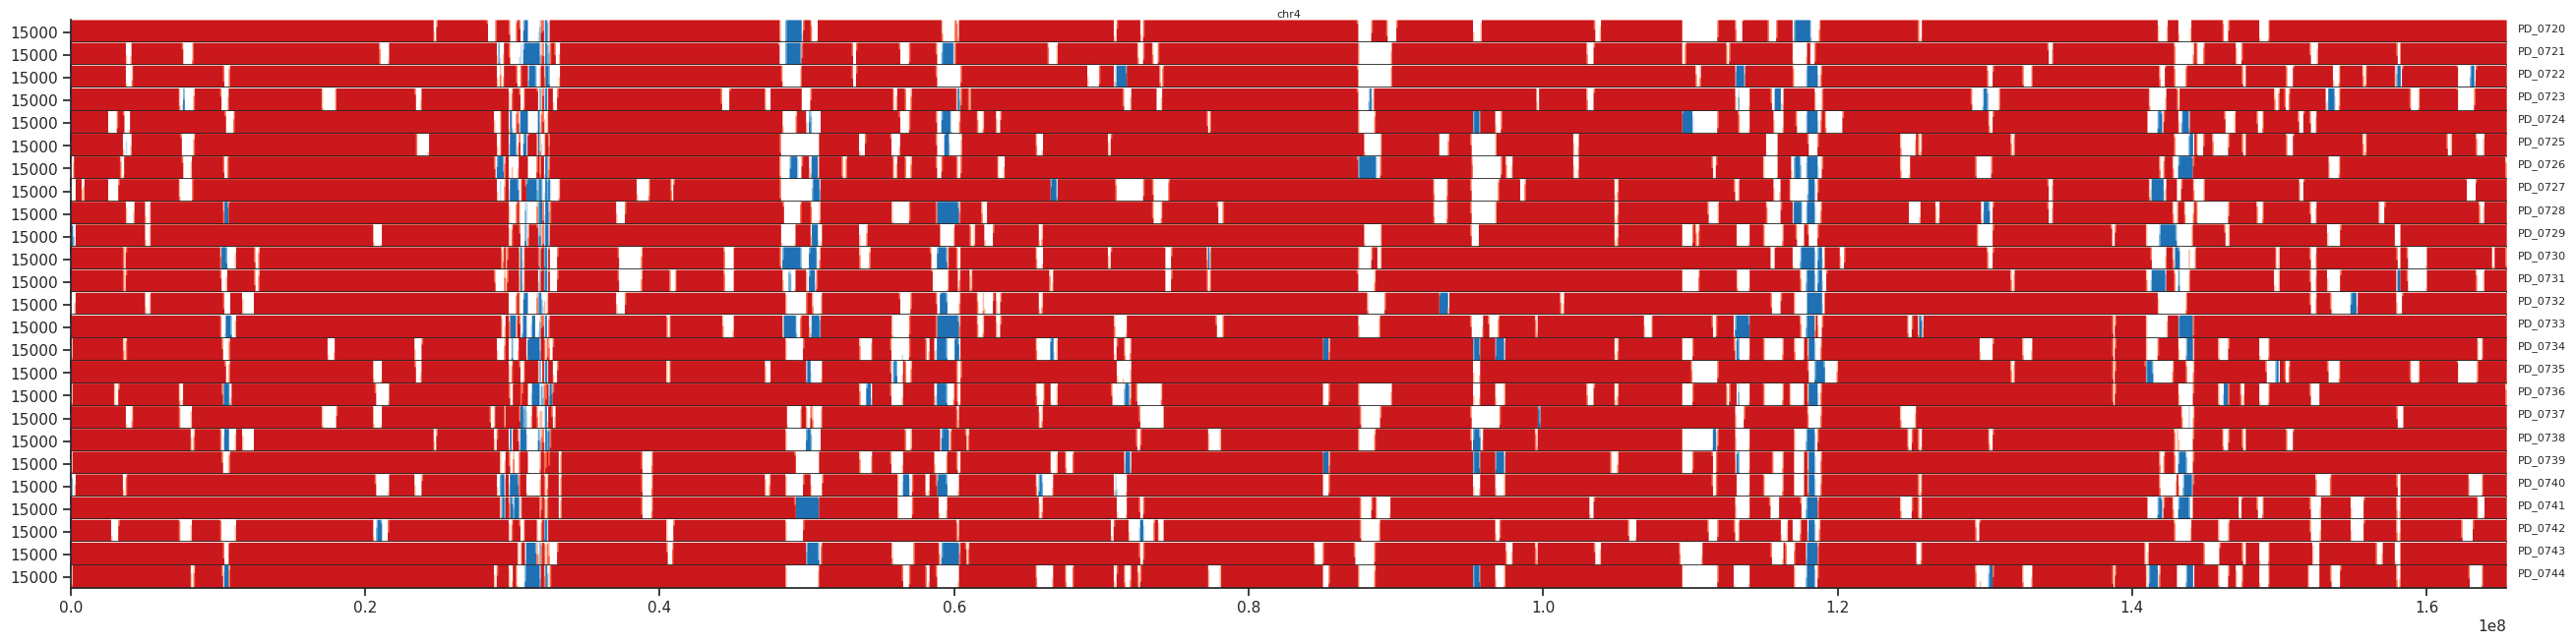

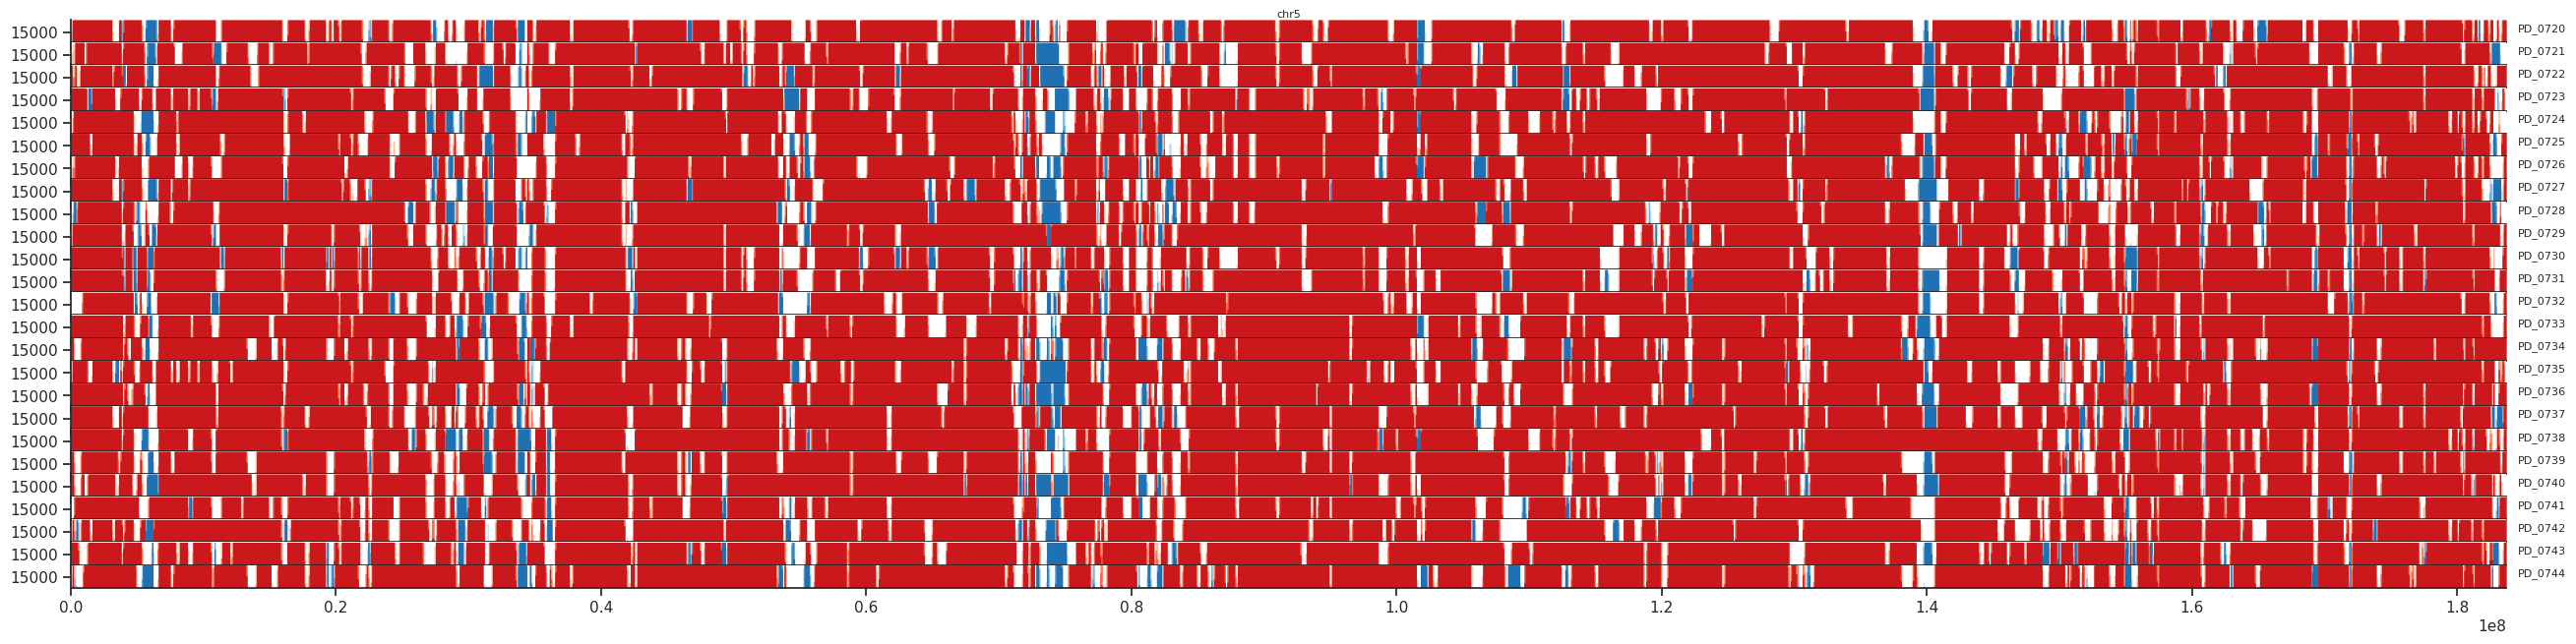

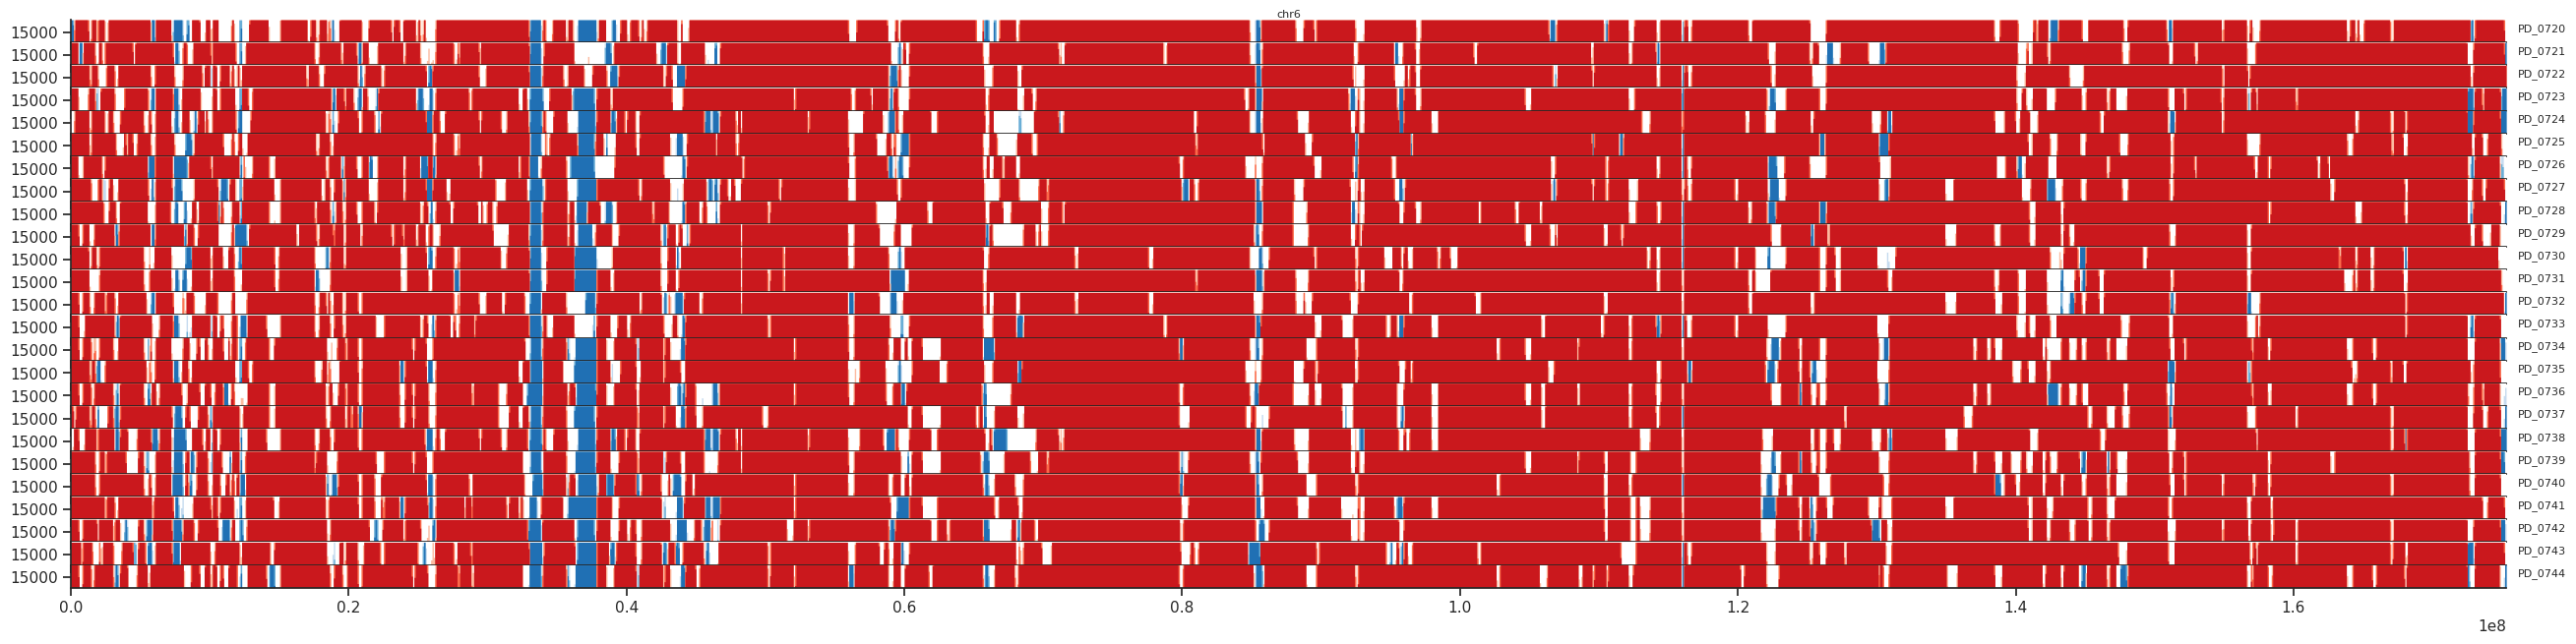

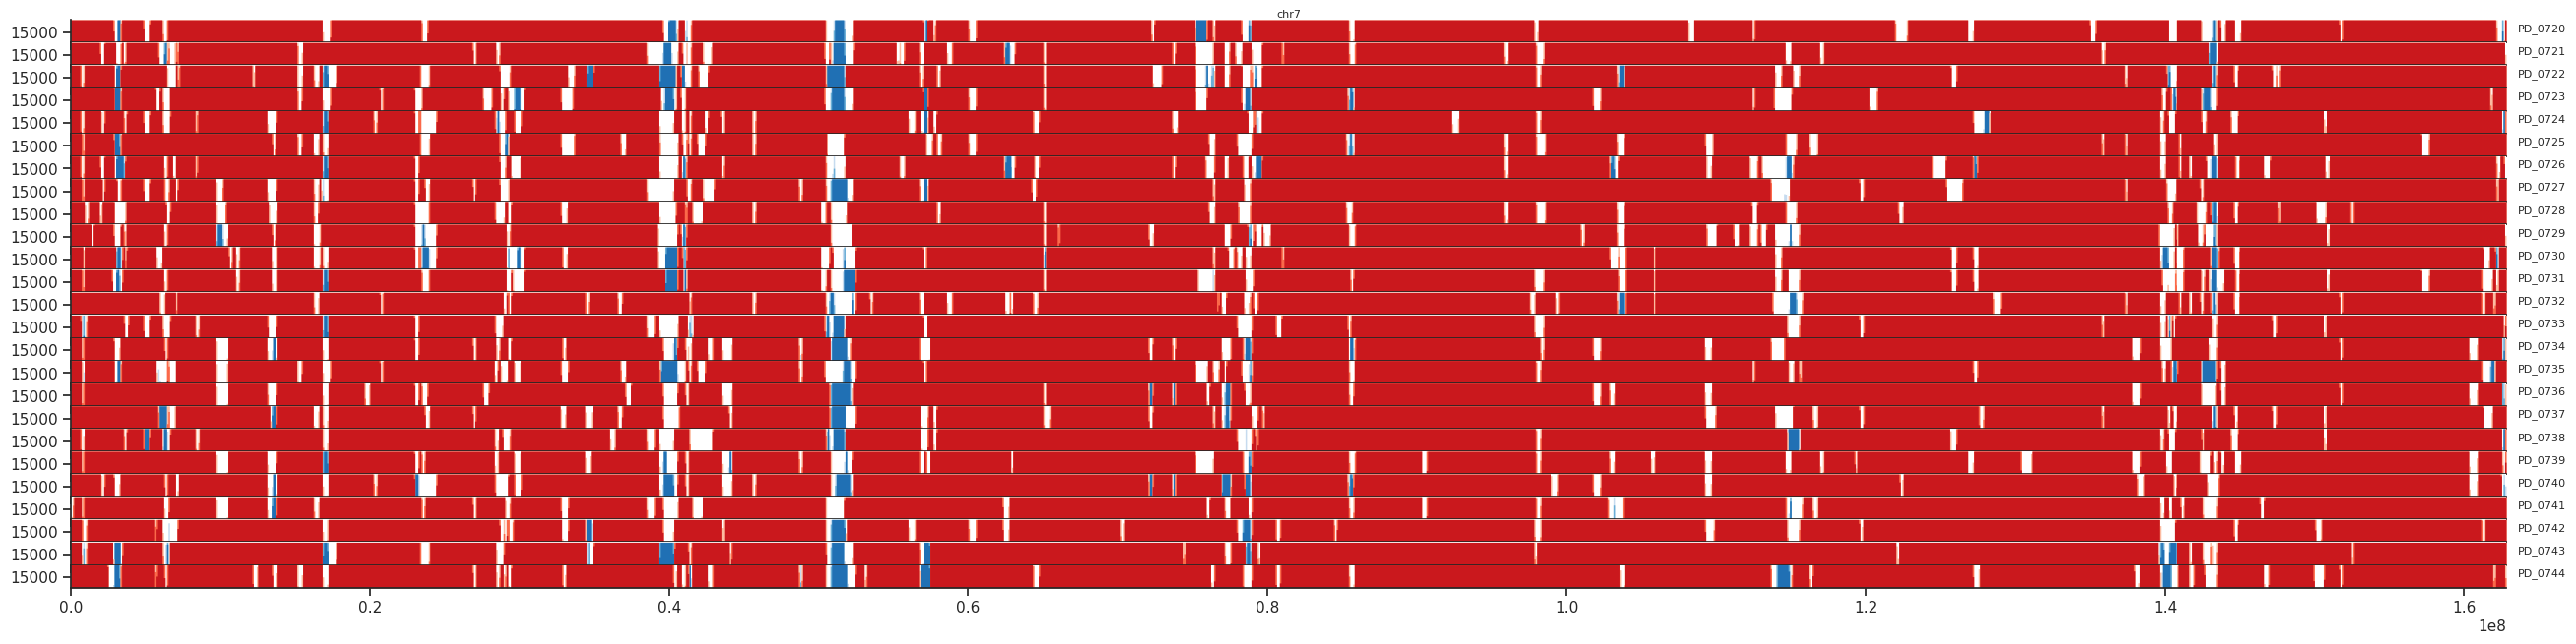

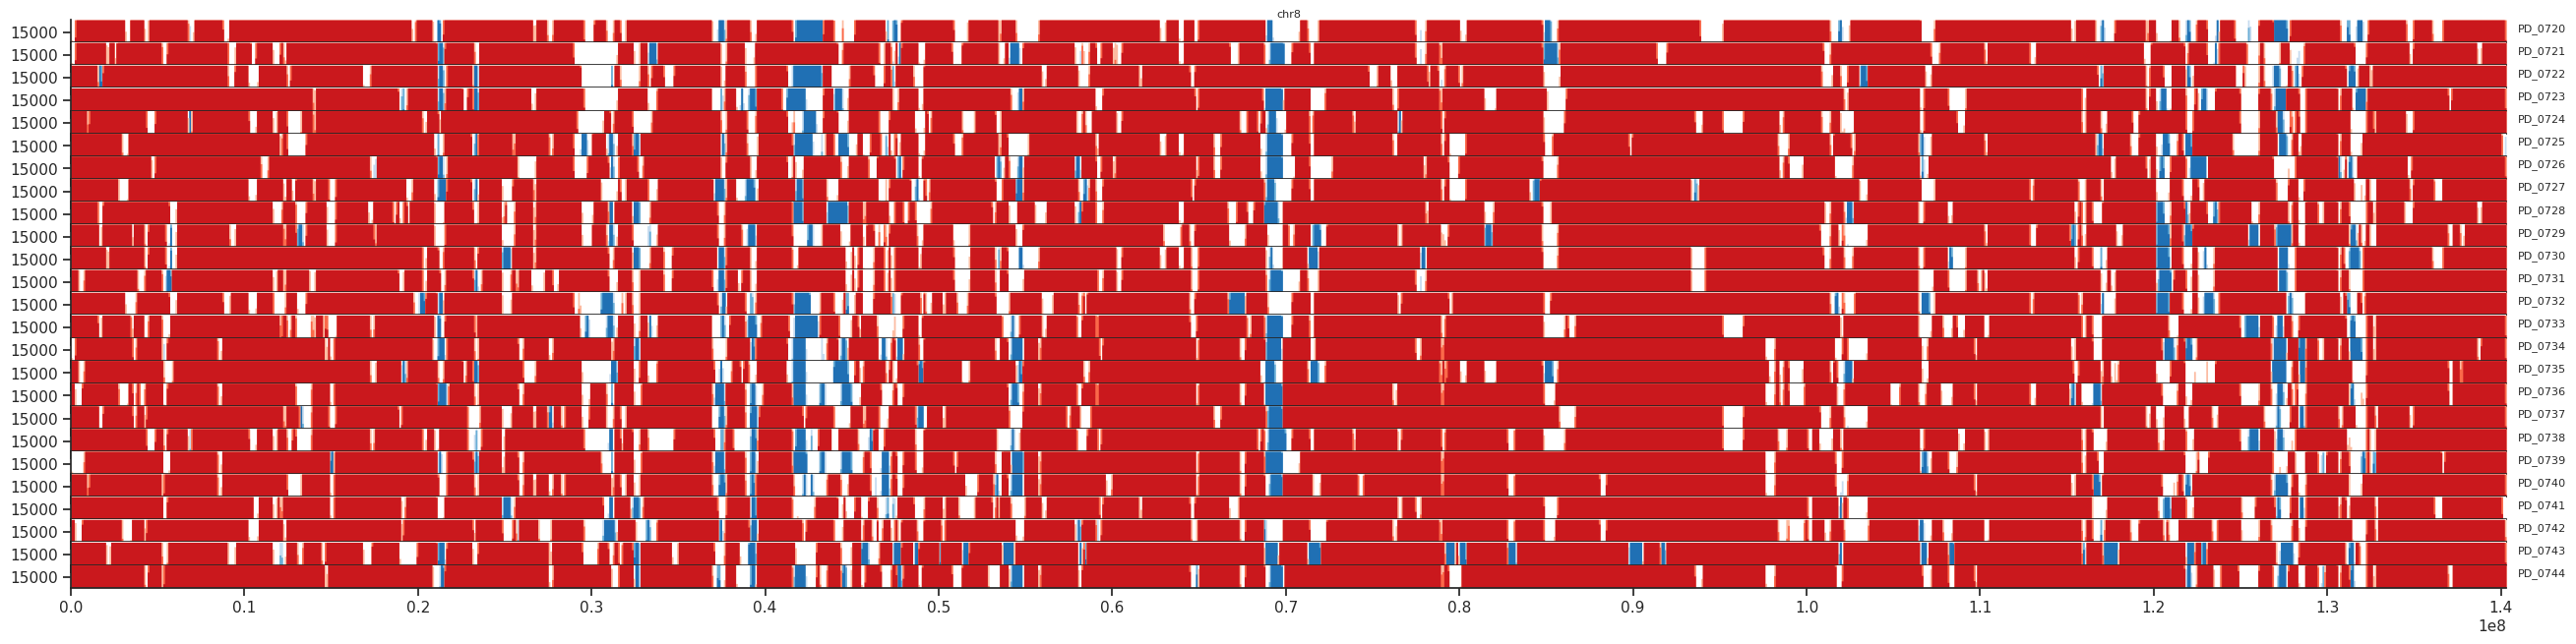

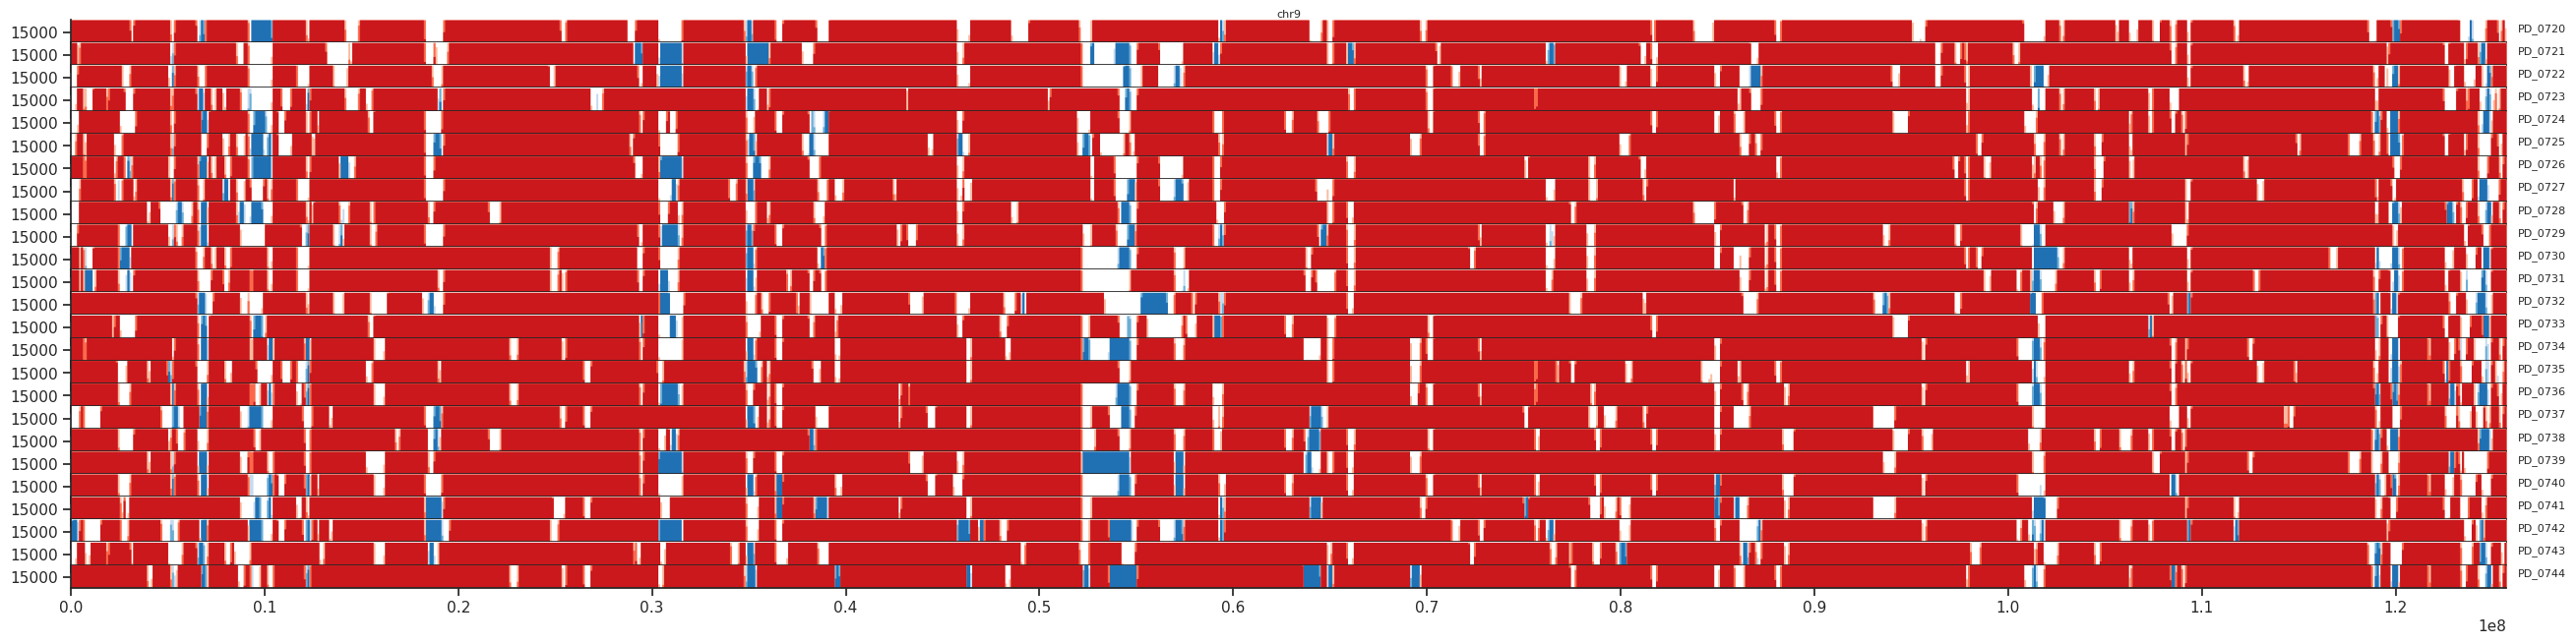

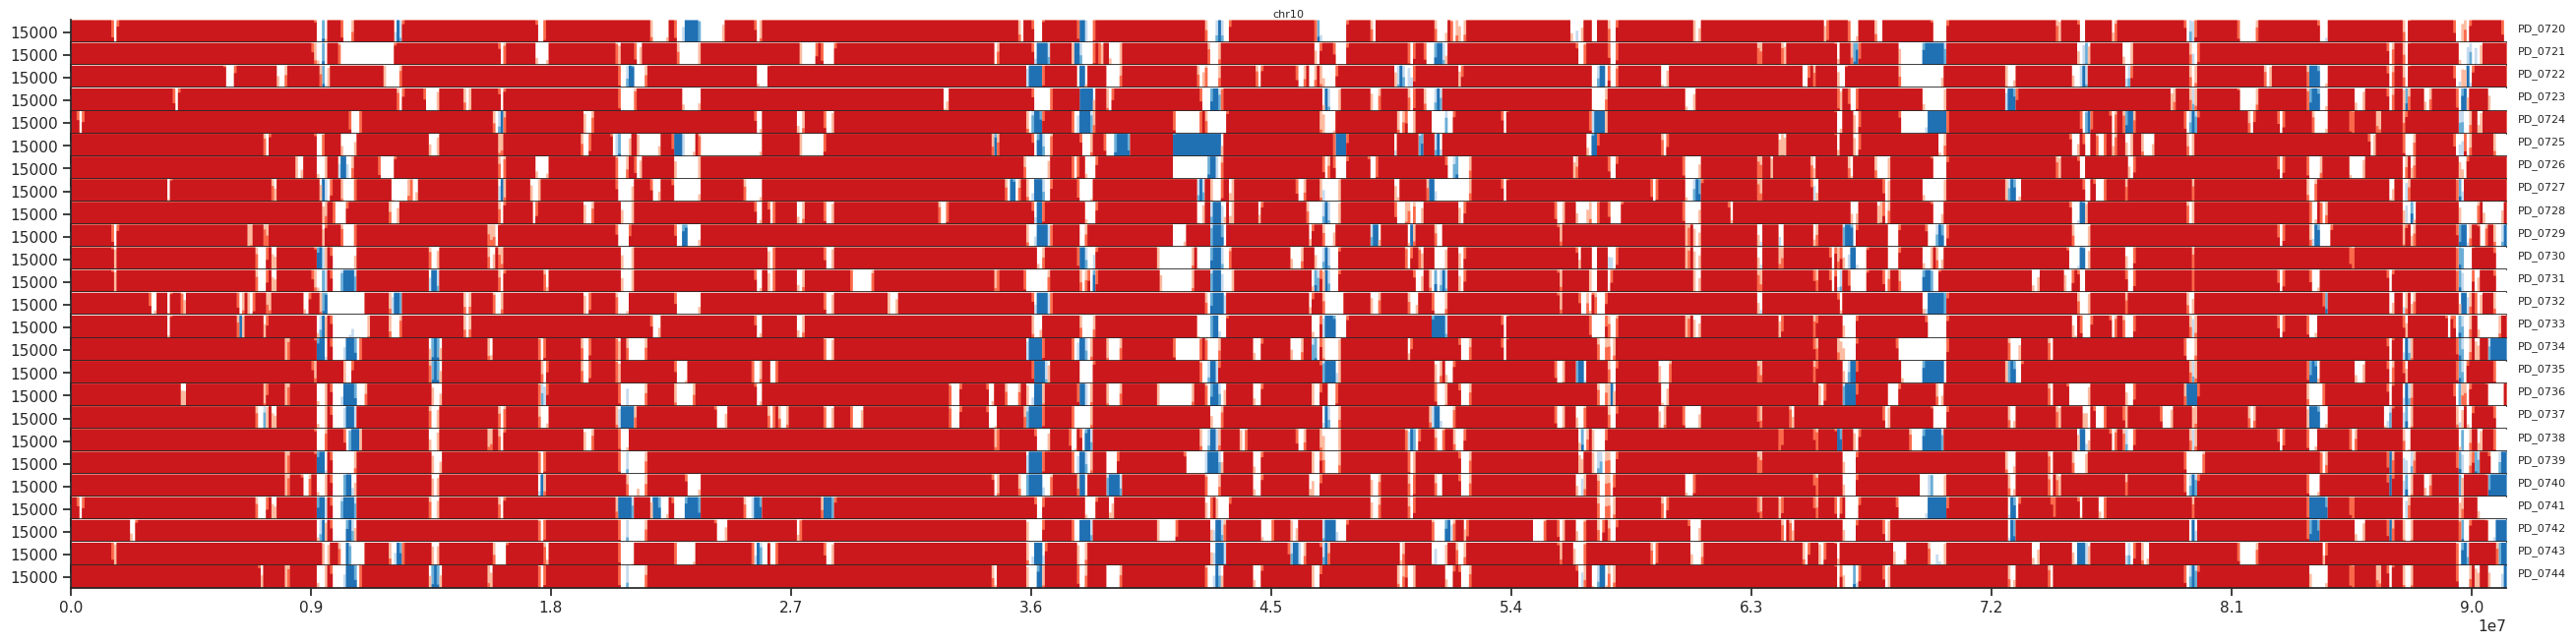

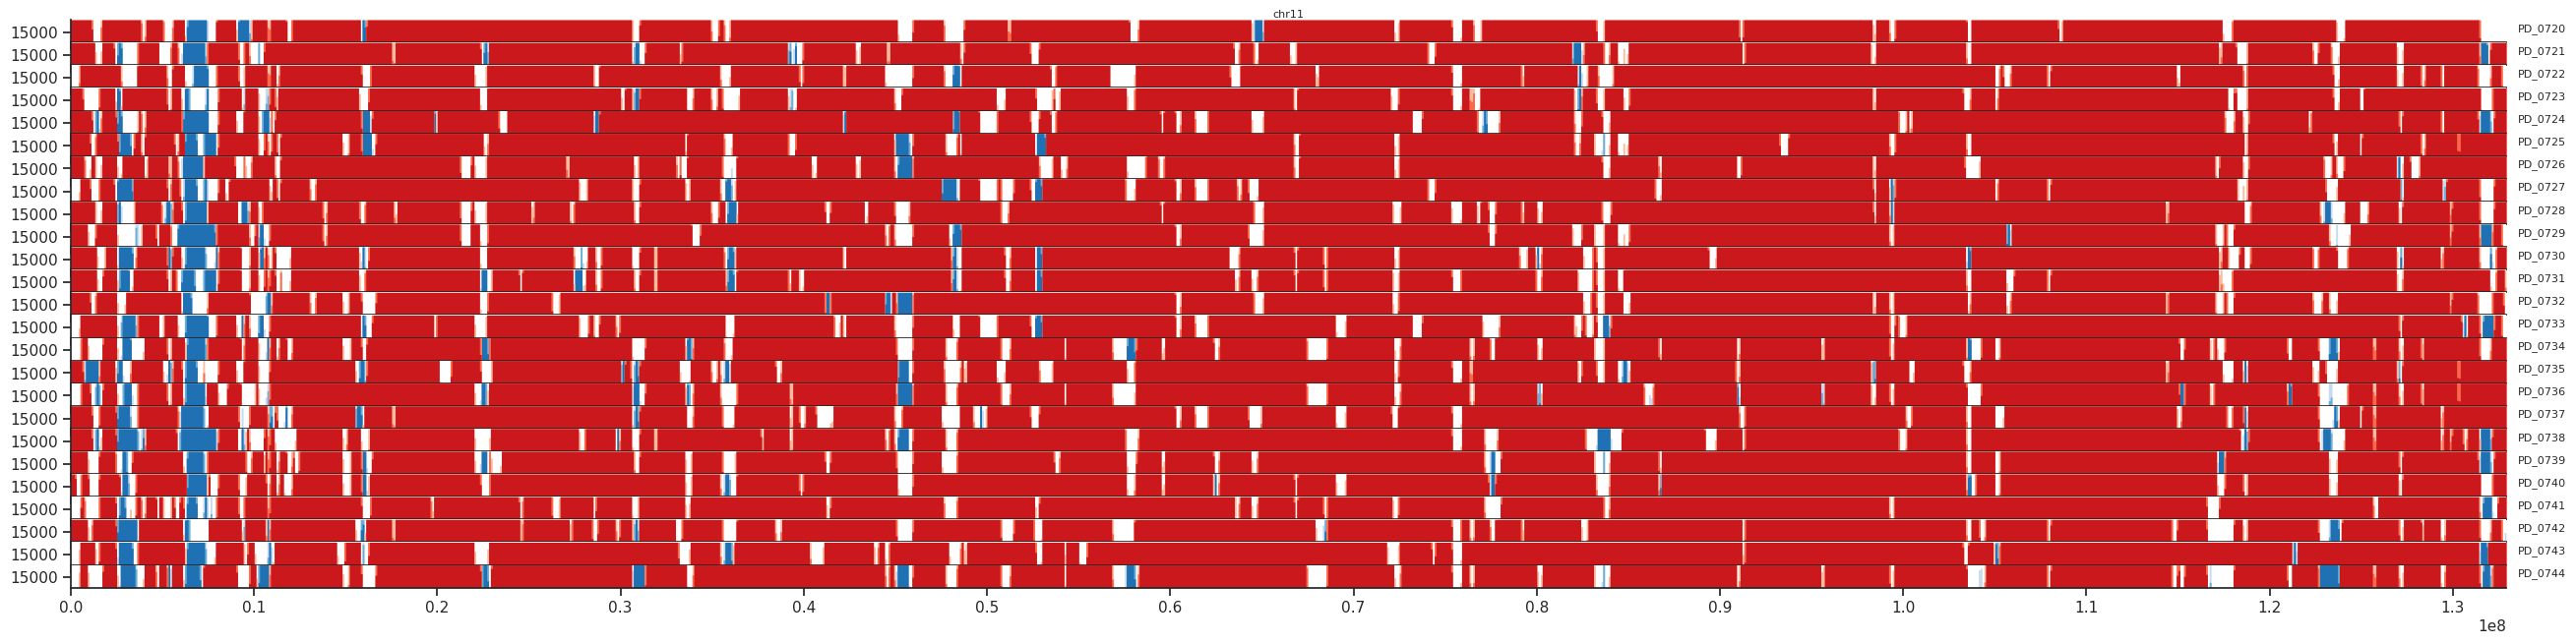

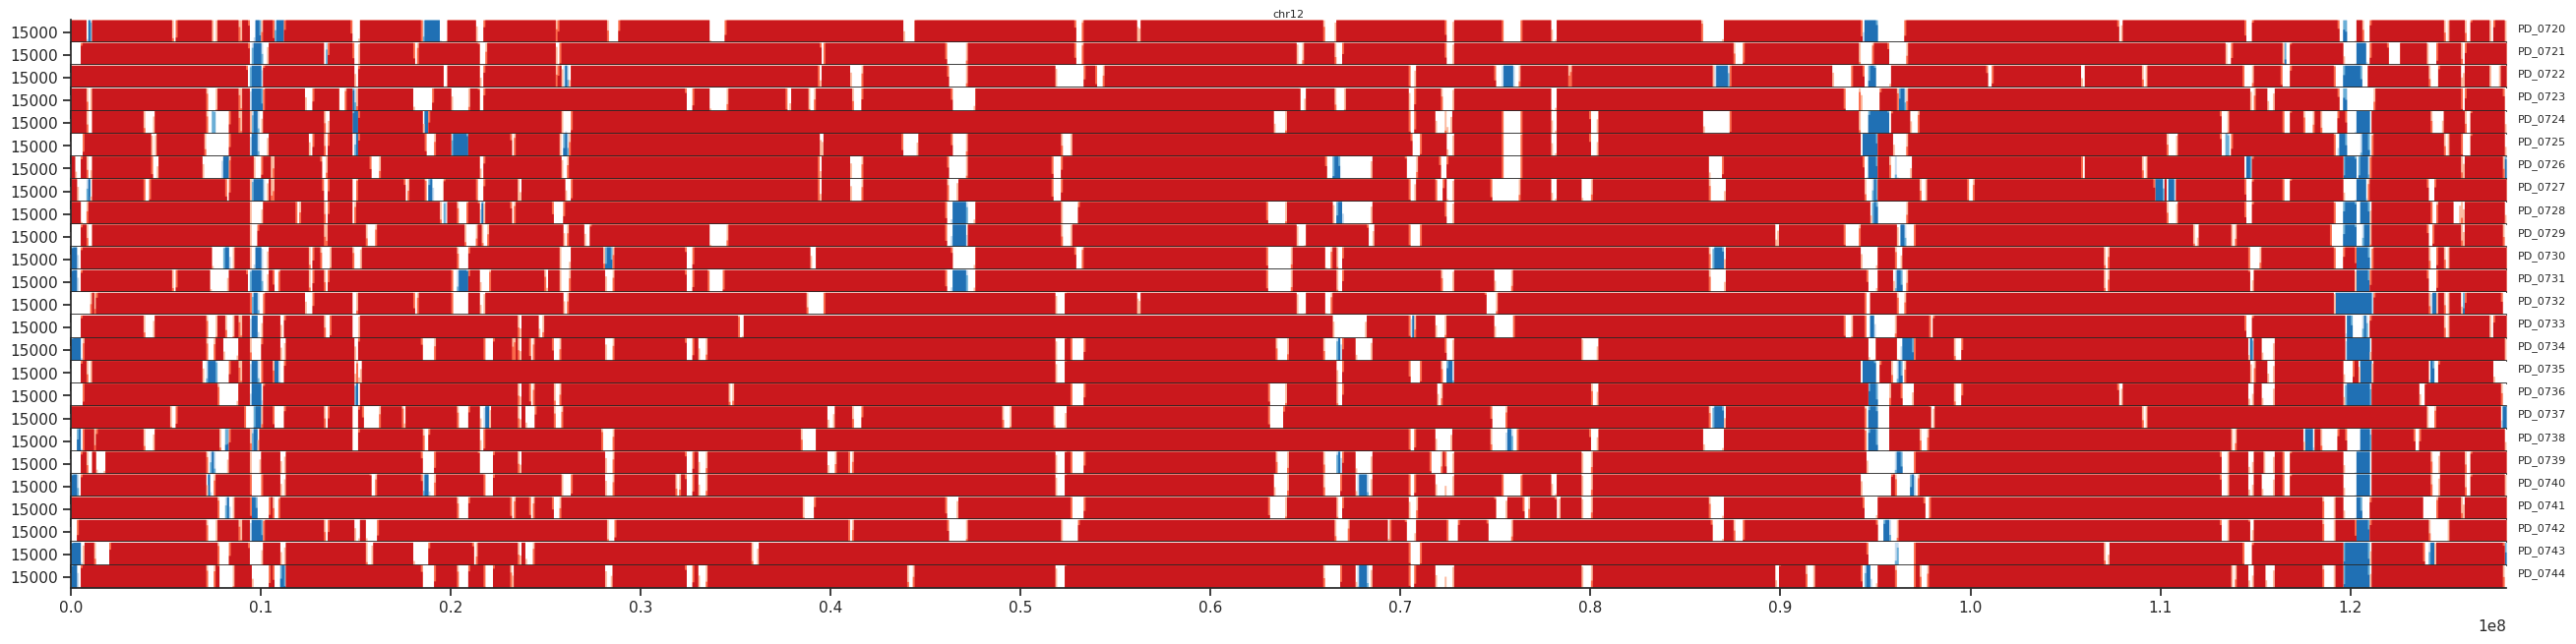

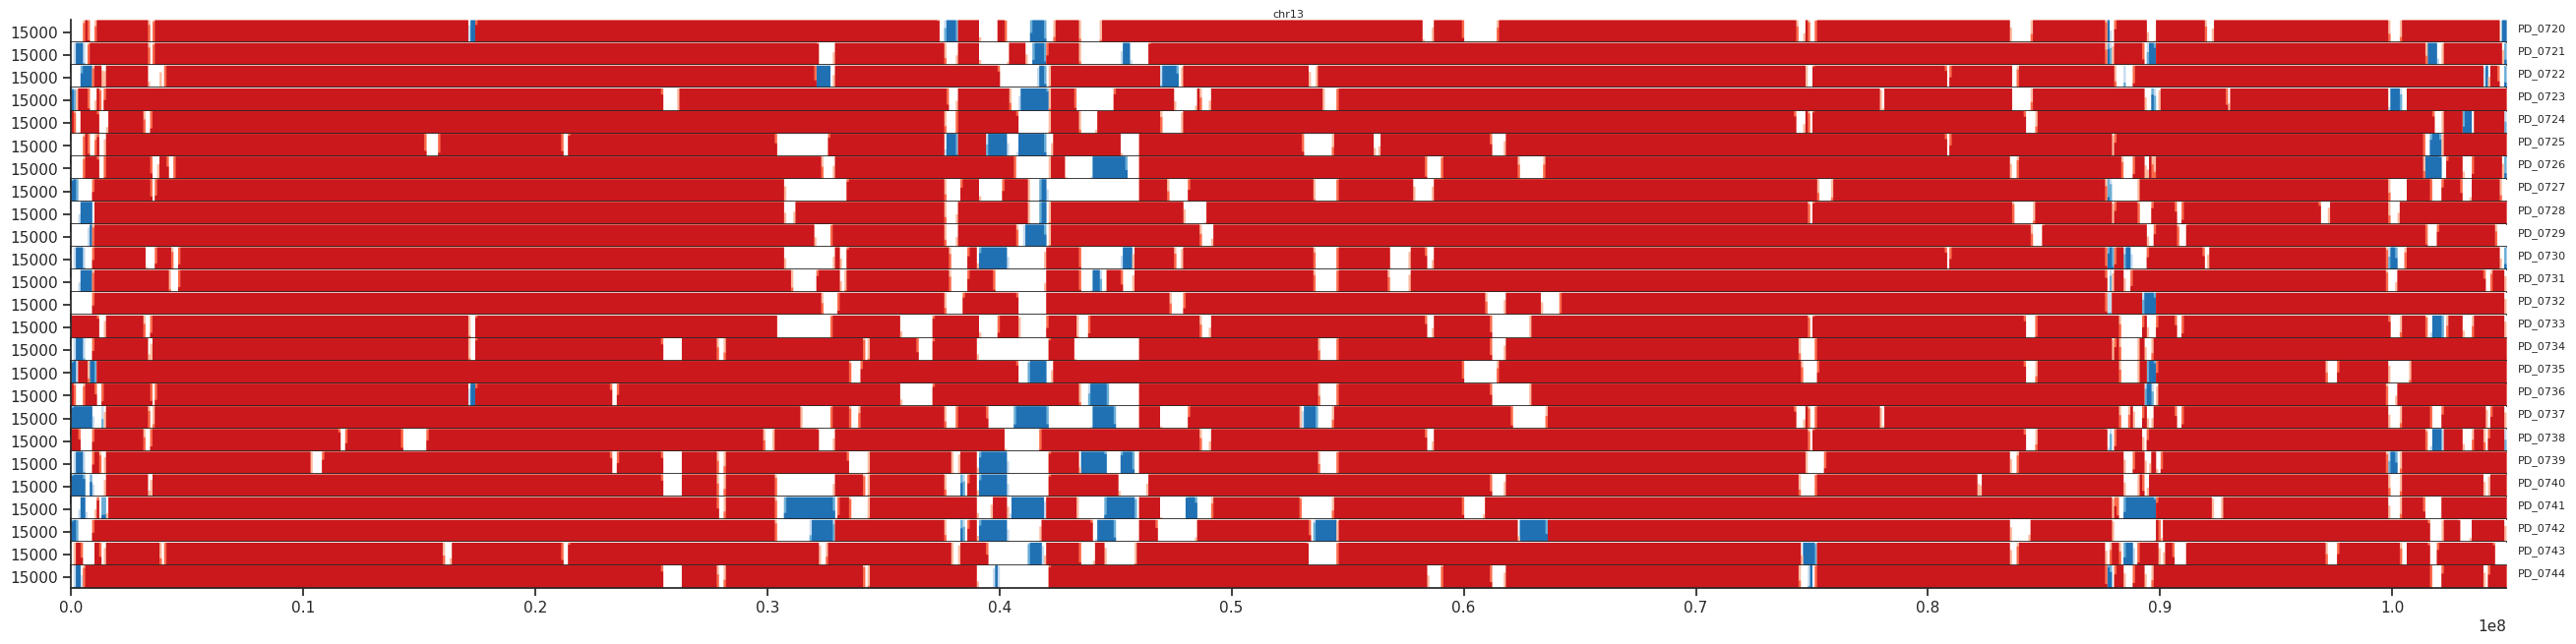

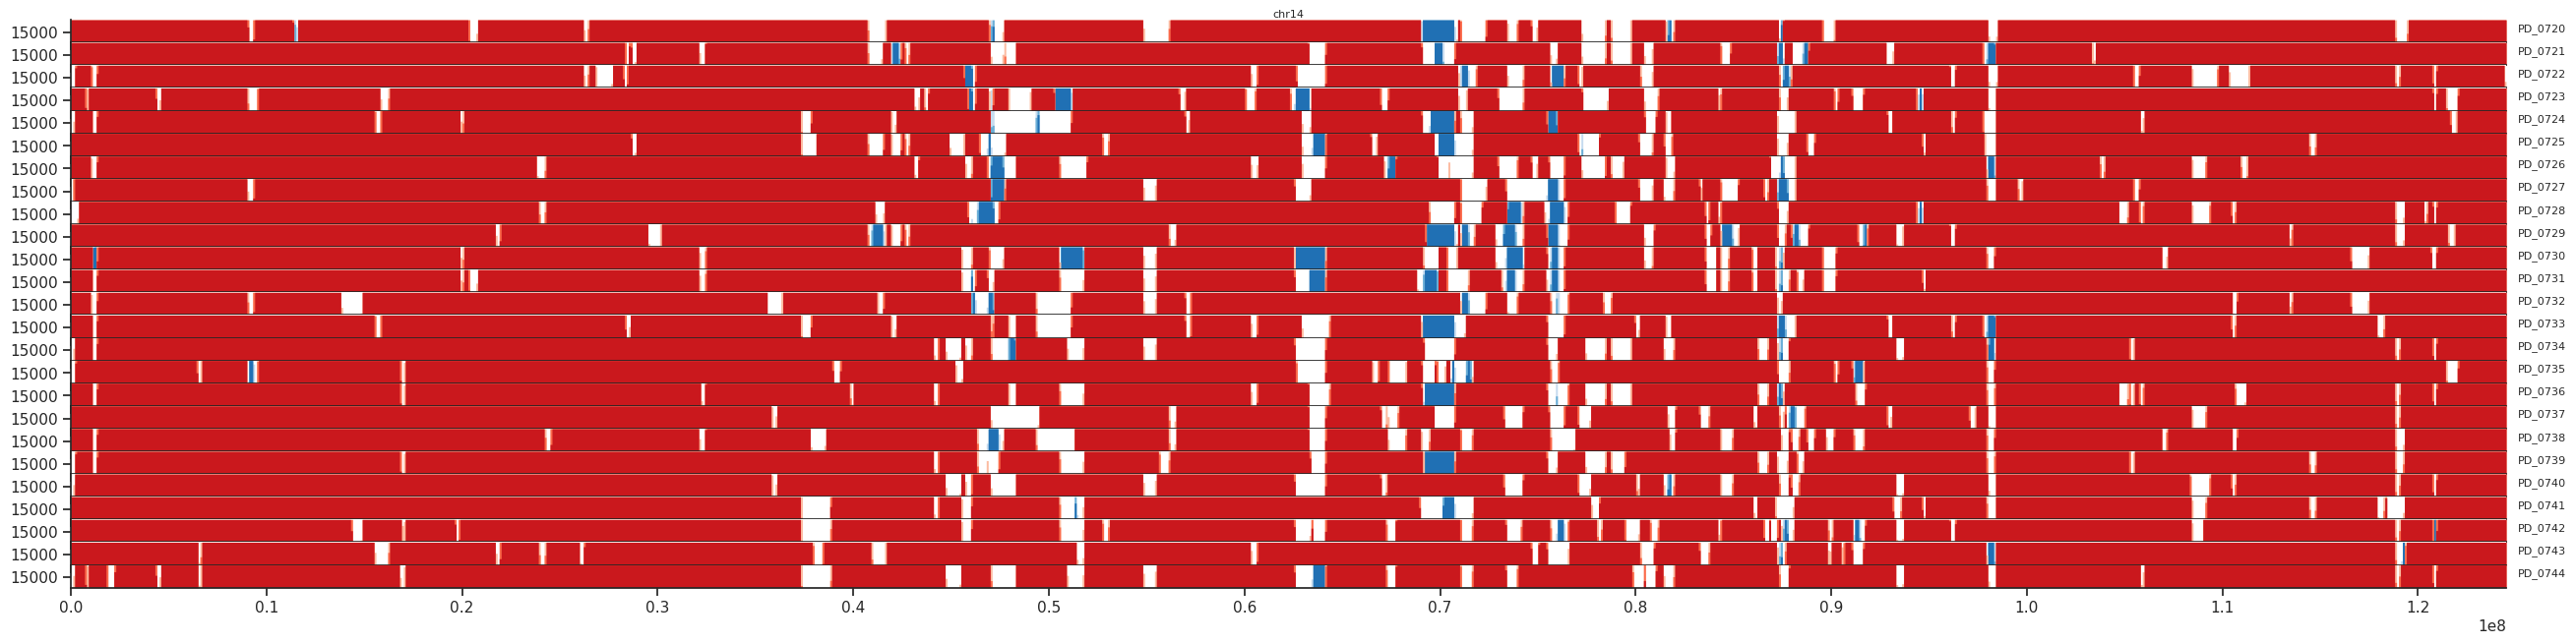

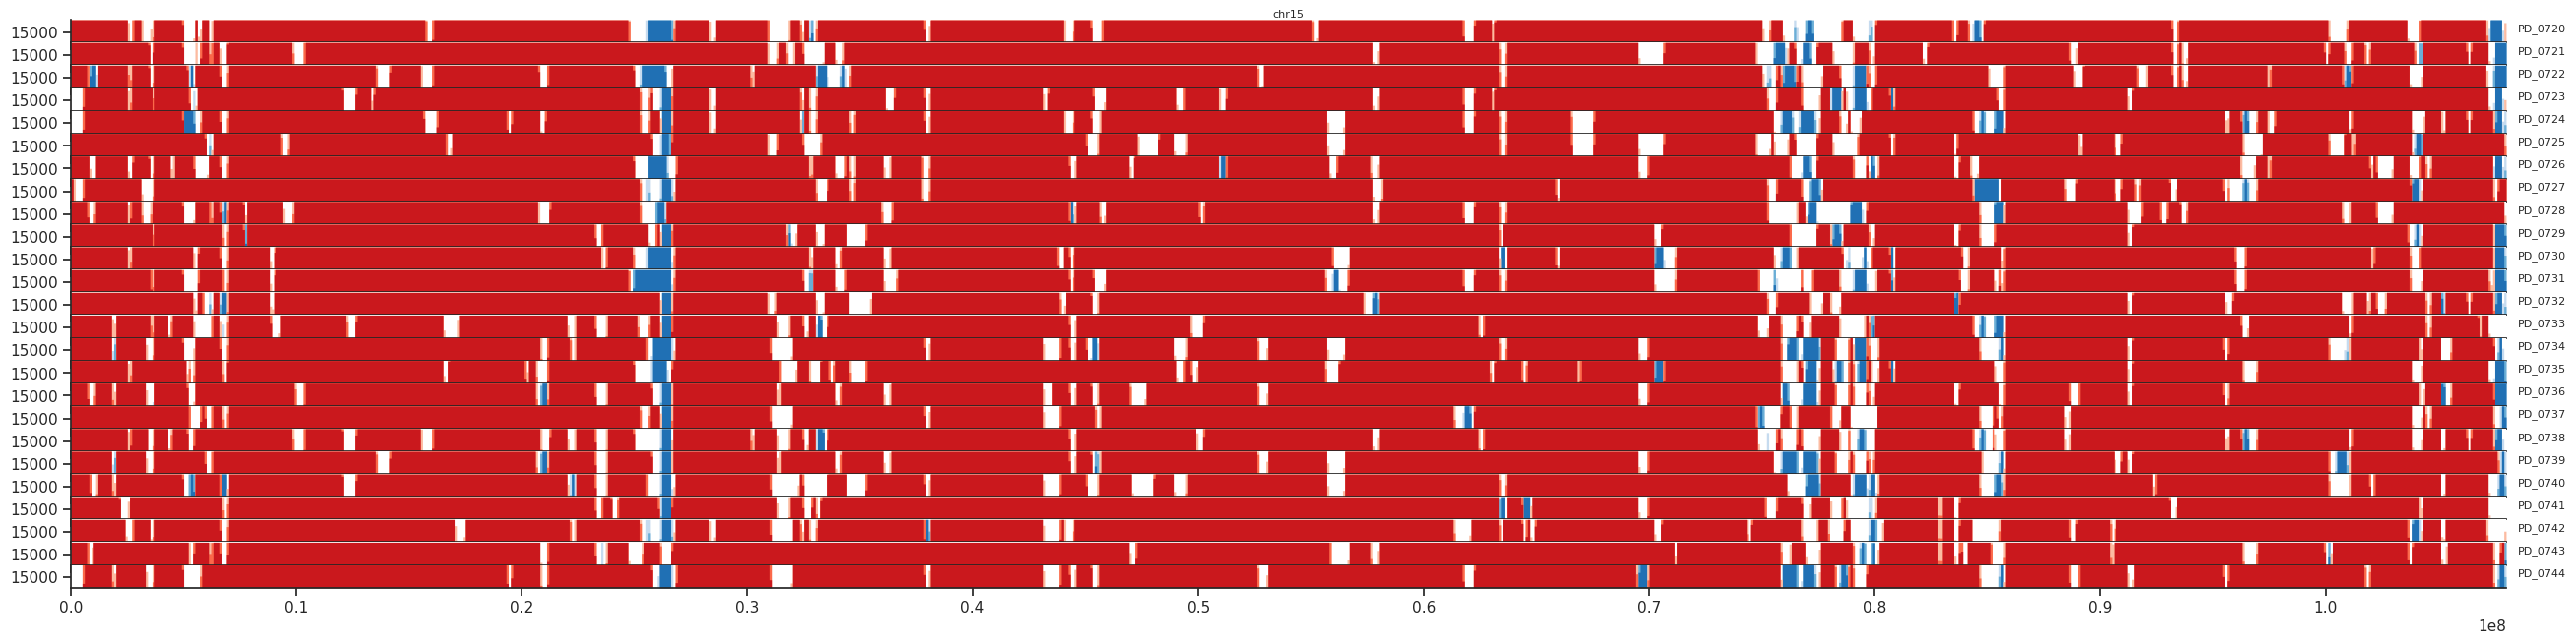

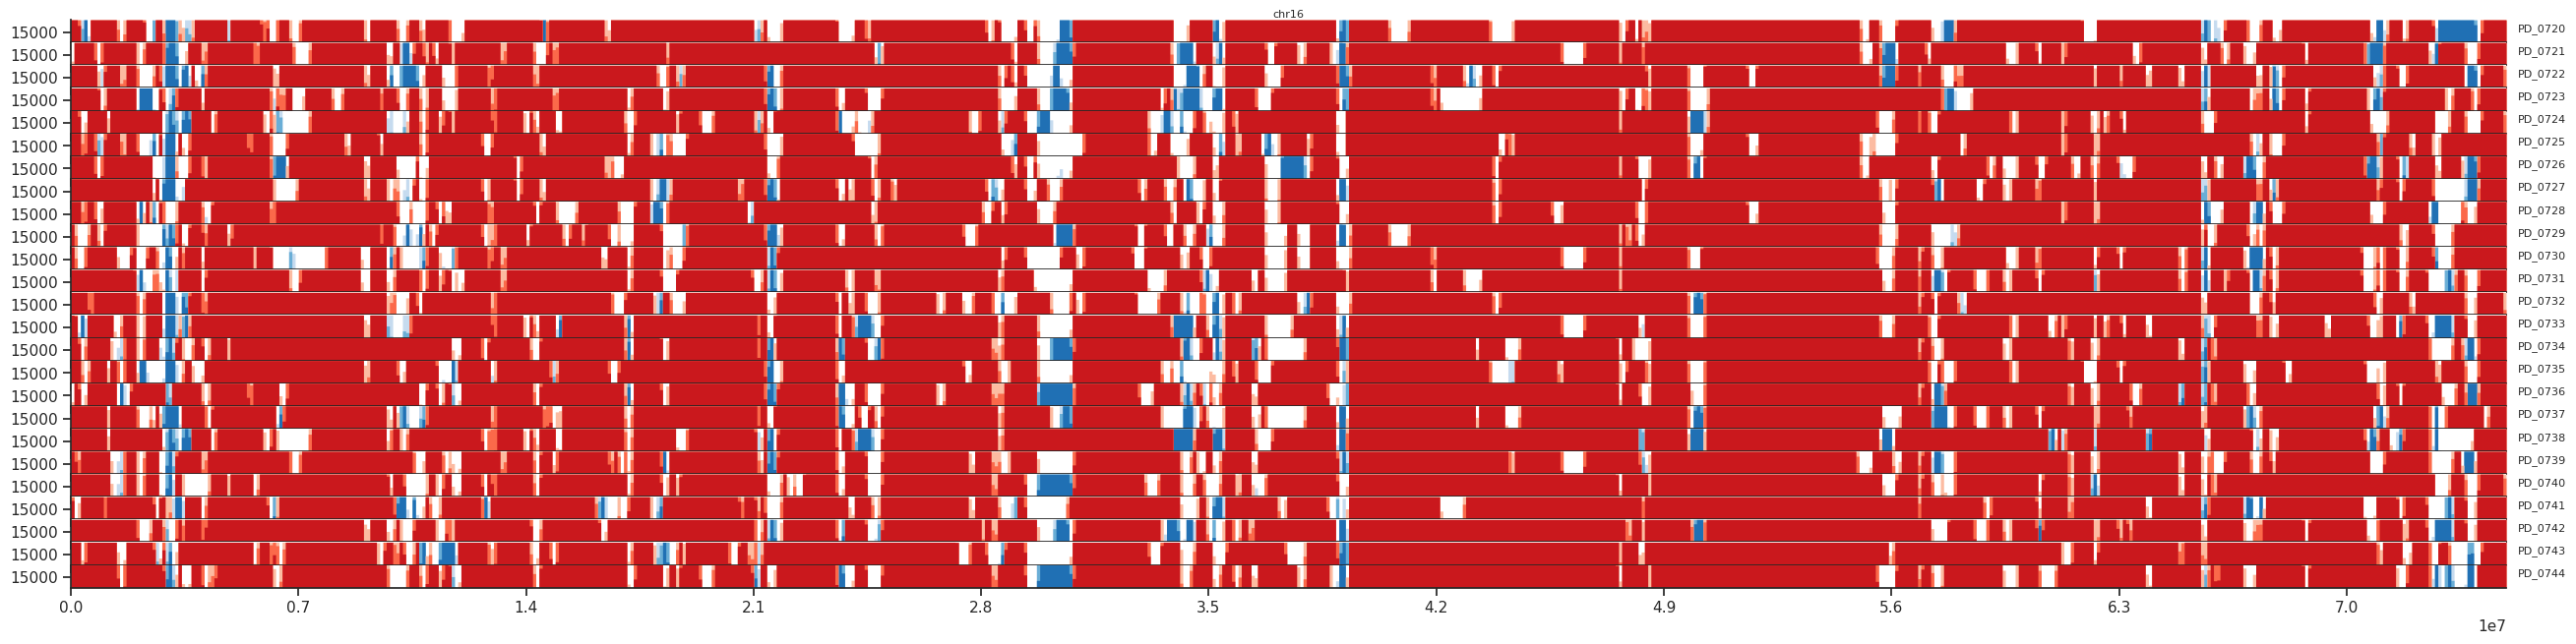

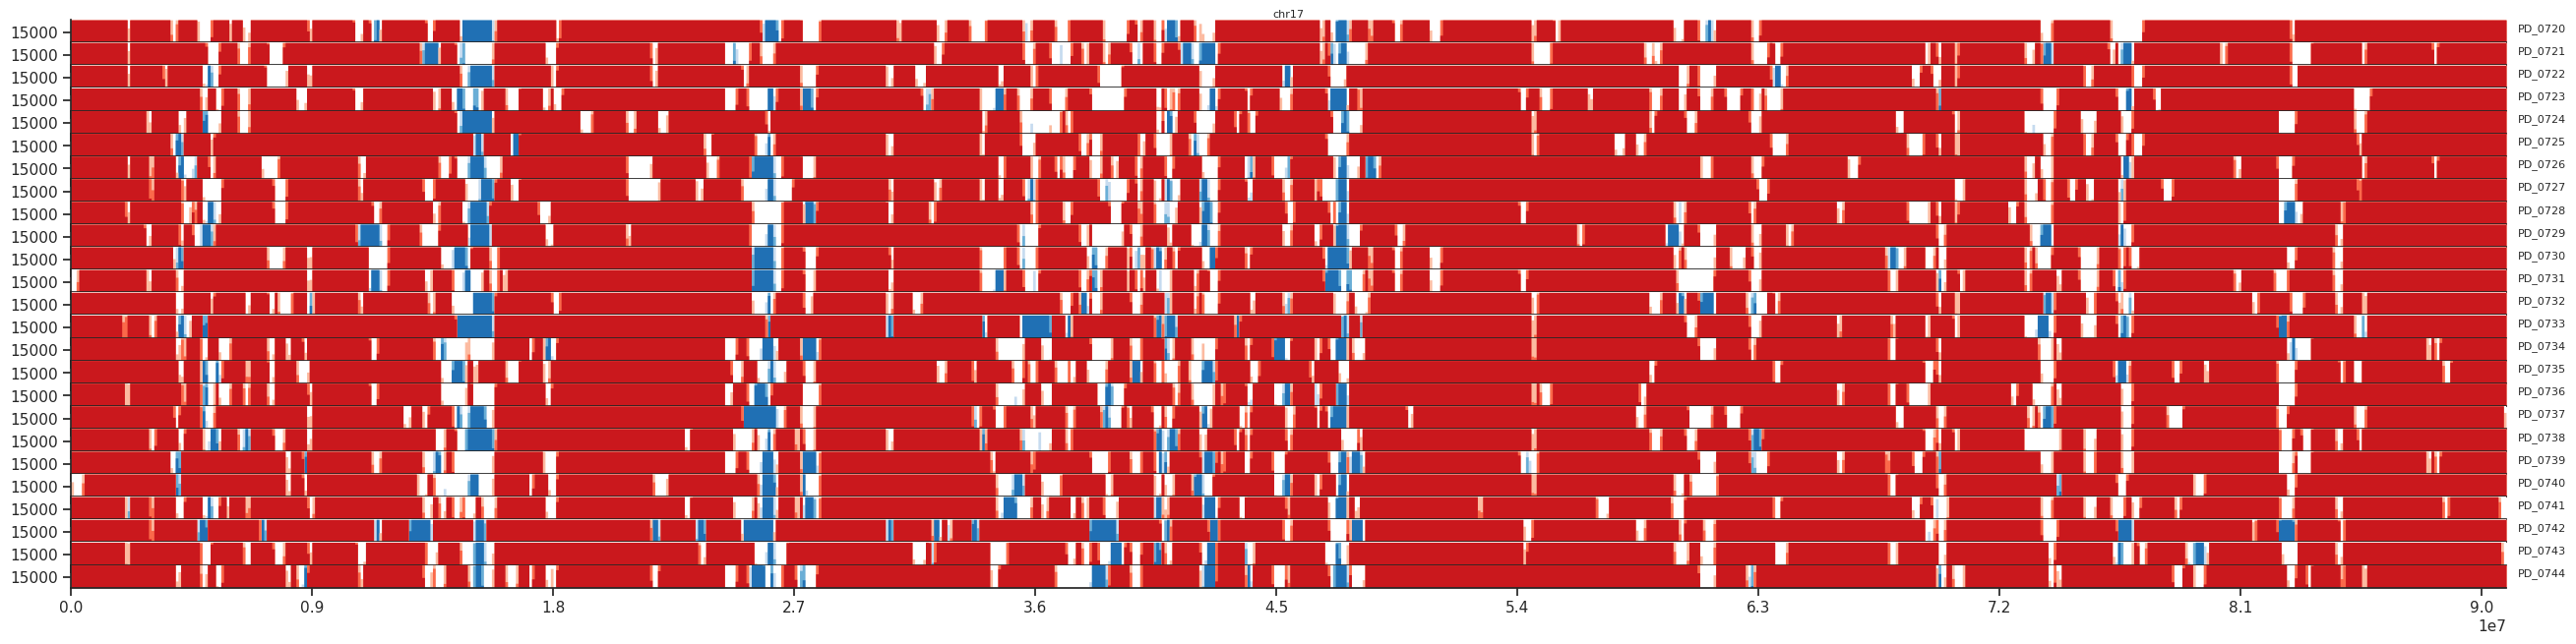

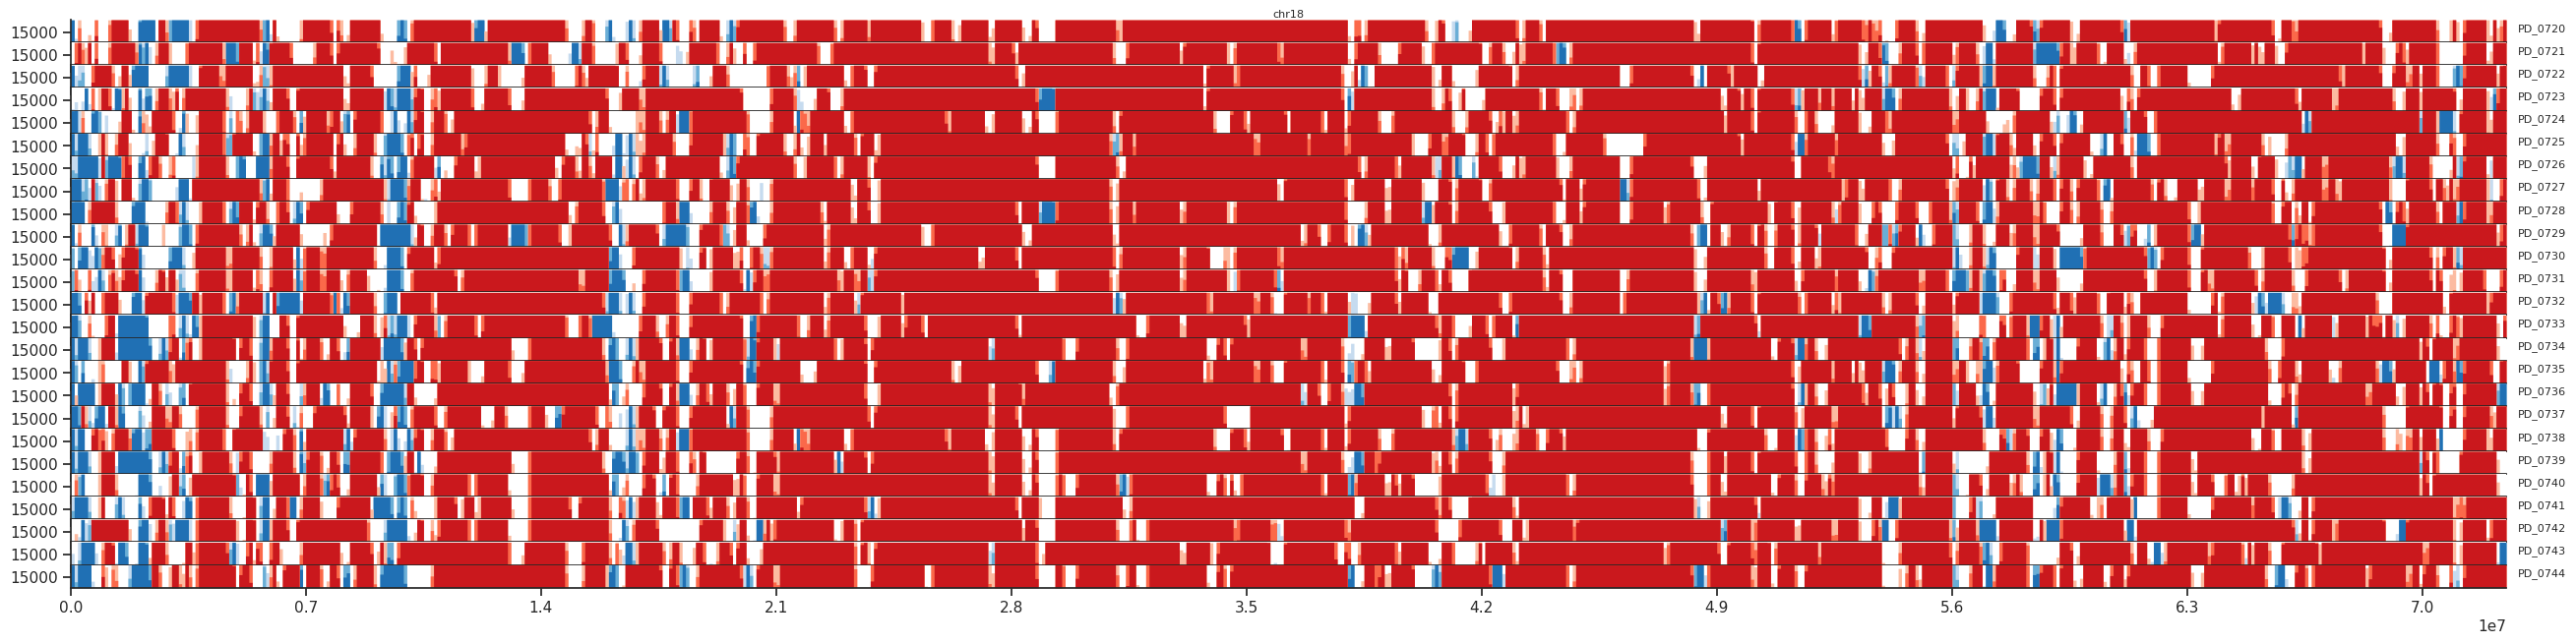

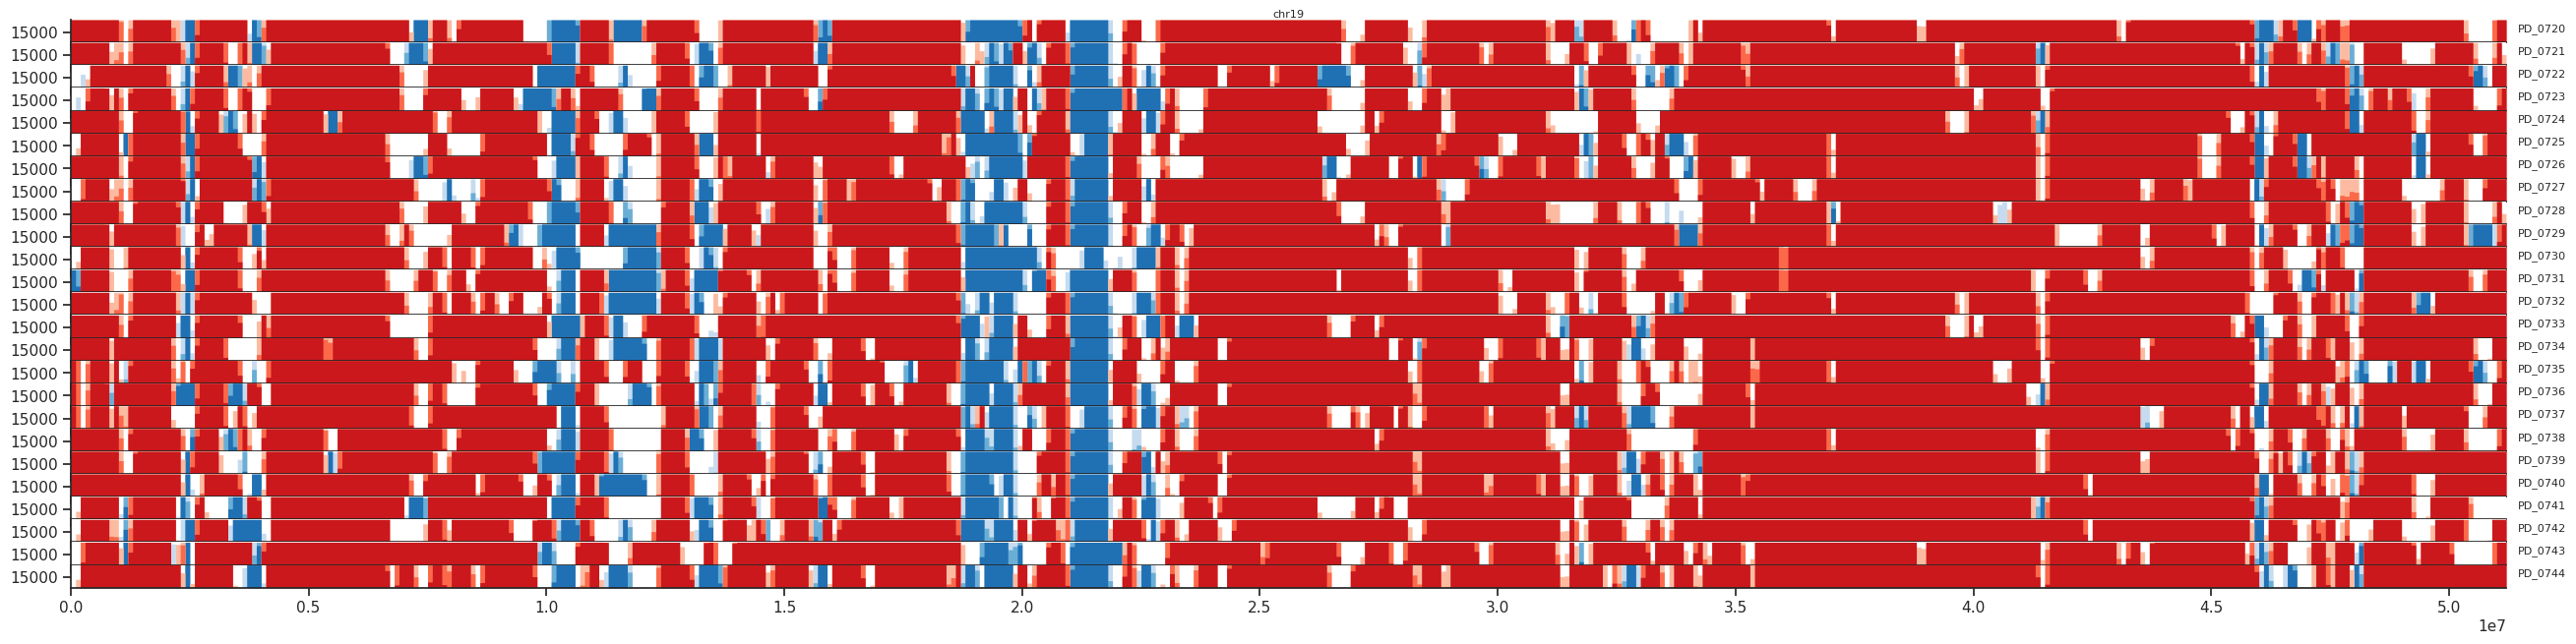

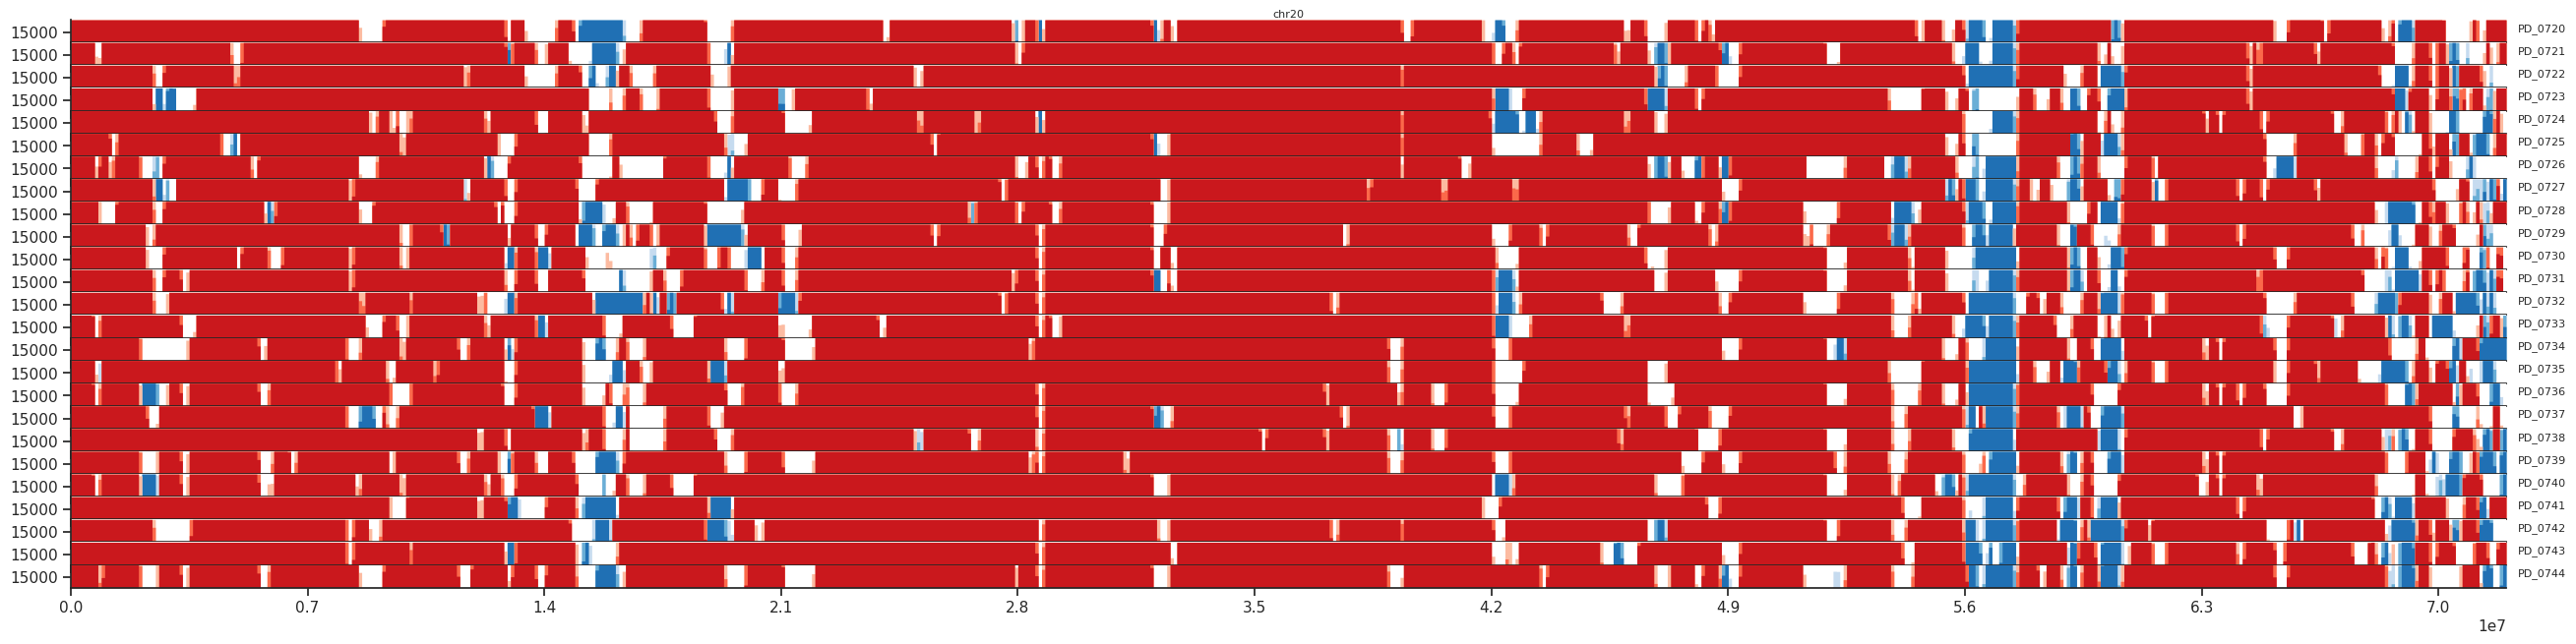

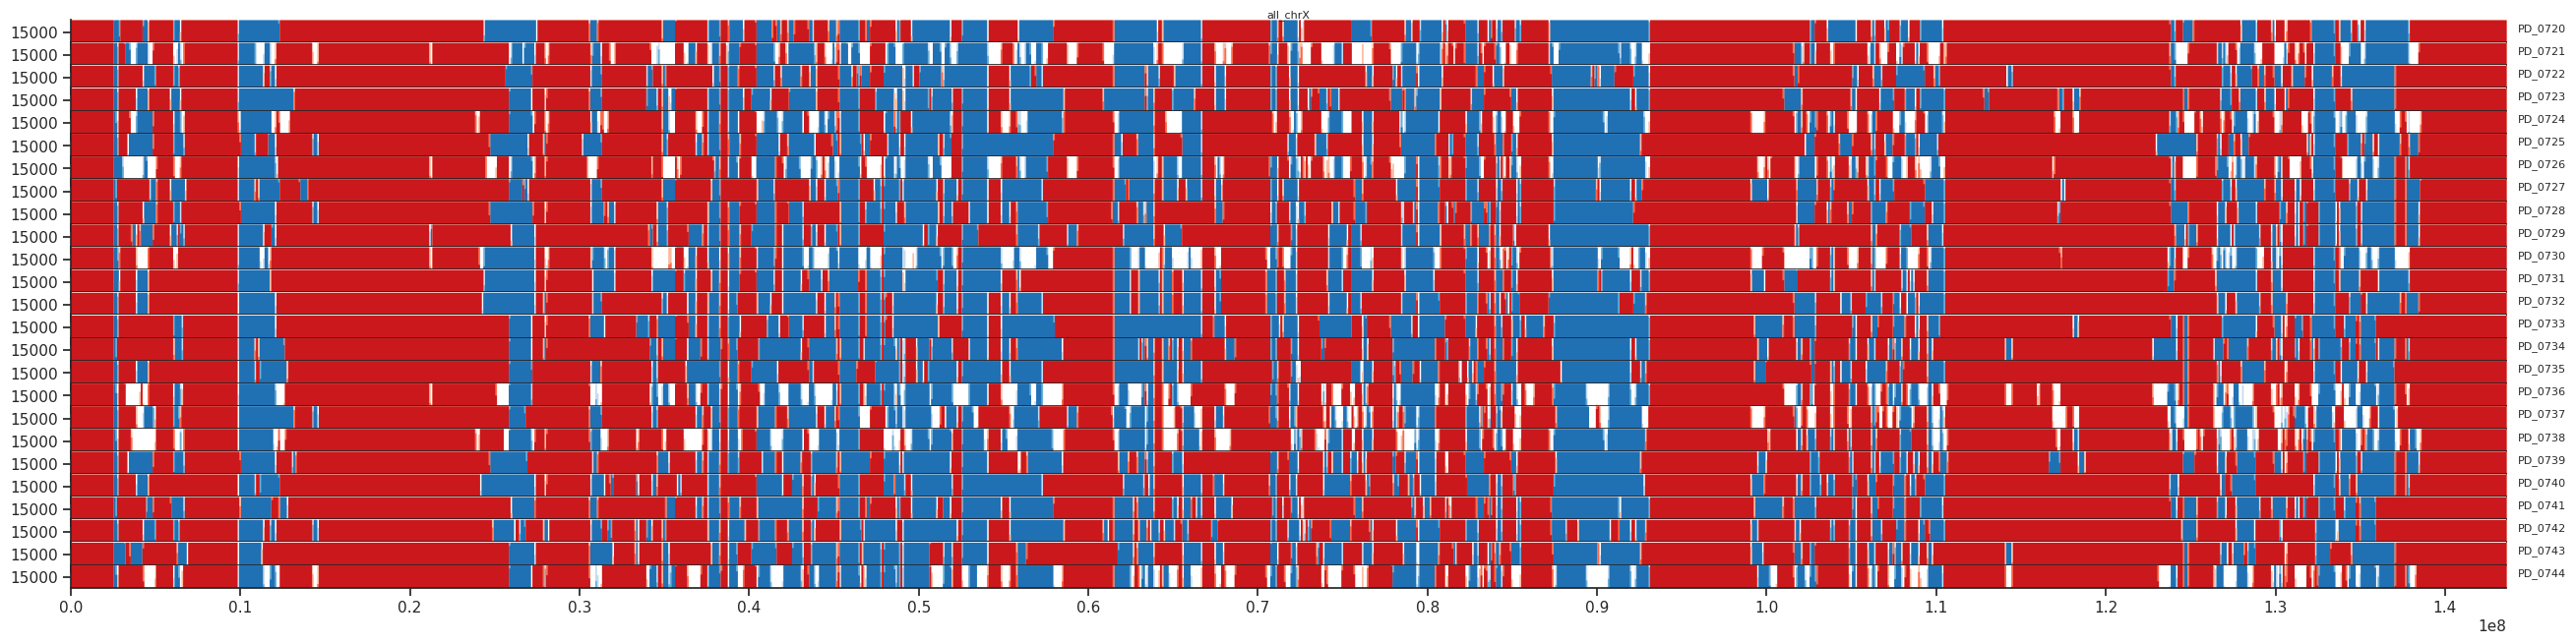

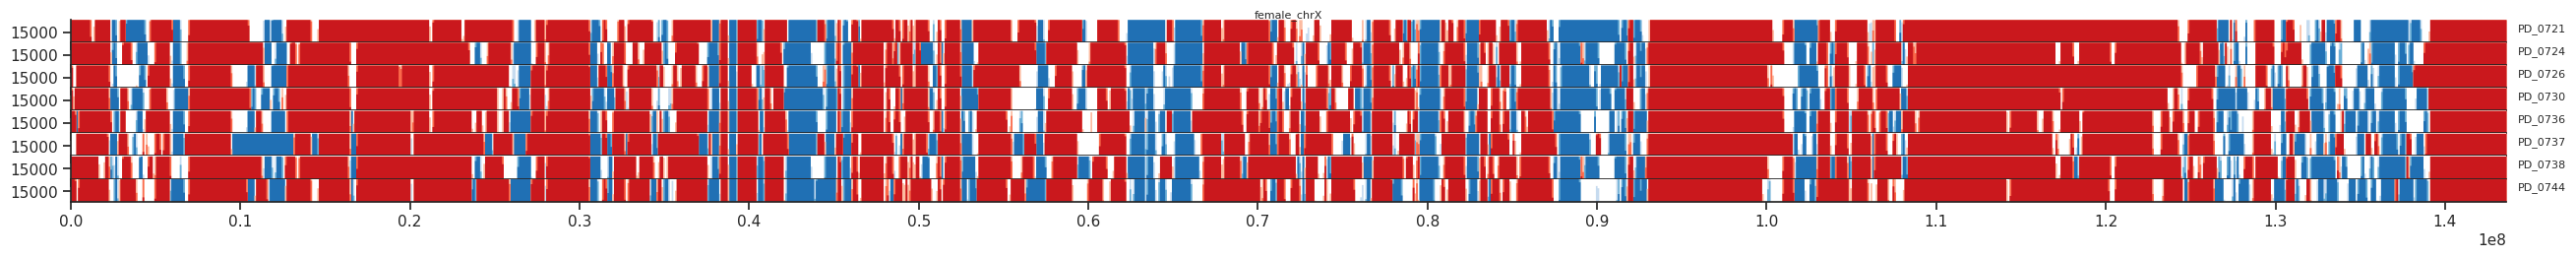

In [66]:
for c in length_df.chrom.unique():
    print(c)
    chr_check = eth_olive_mean_df.loc[(eth_olive_mean_df.chrom == c)]
    fig = horizonplot(chr_check, 'north', width=2, col='chrom', row='individual', size=0.3, aspect=100)
    plt.savefig("../figures/eth_{}_rfmix.png".format(c), dpi=300, bbox_inches='tight')

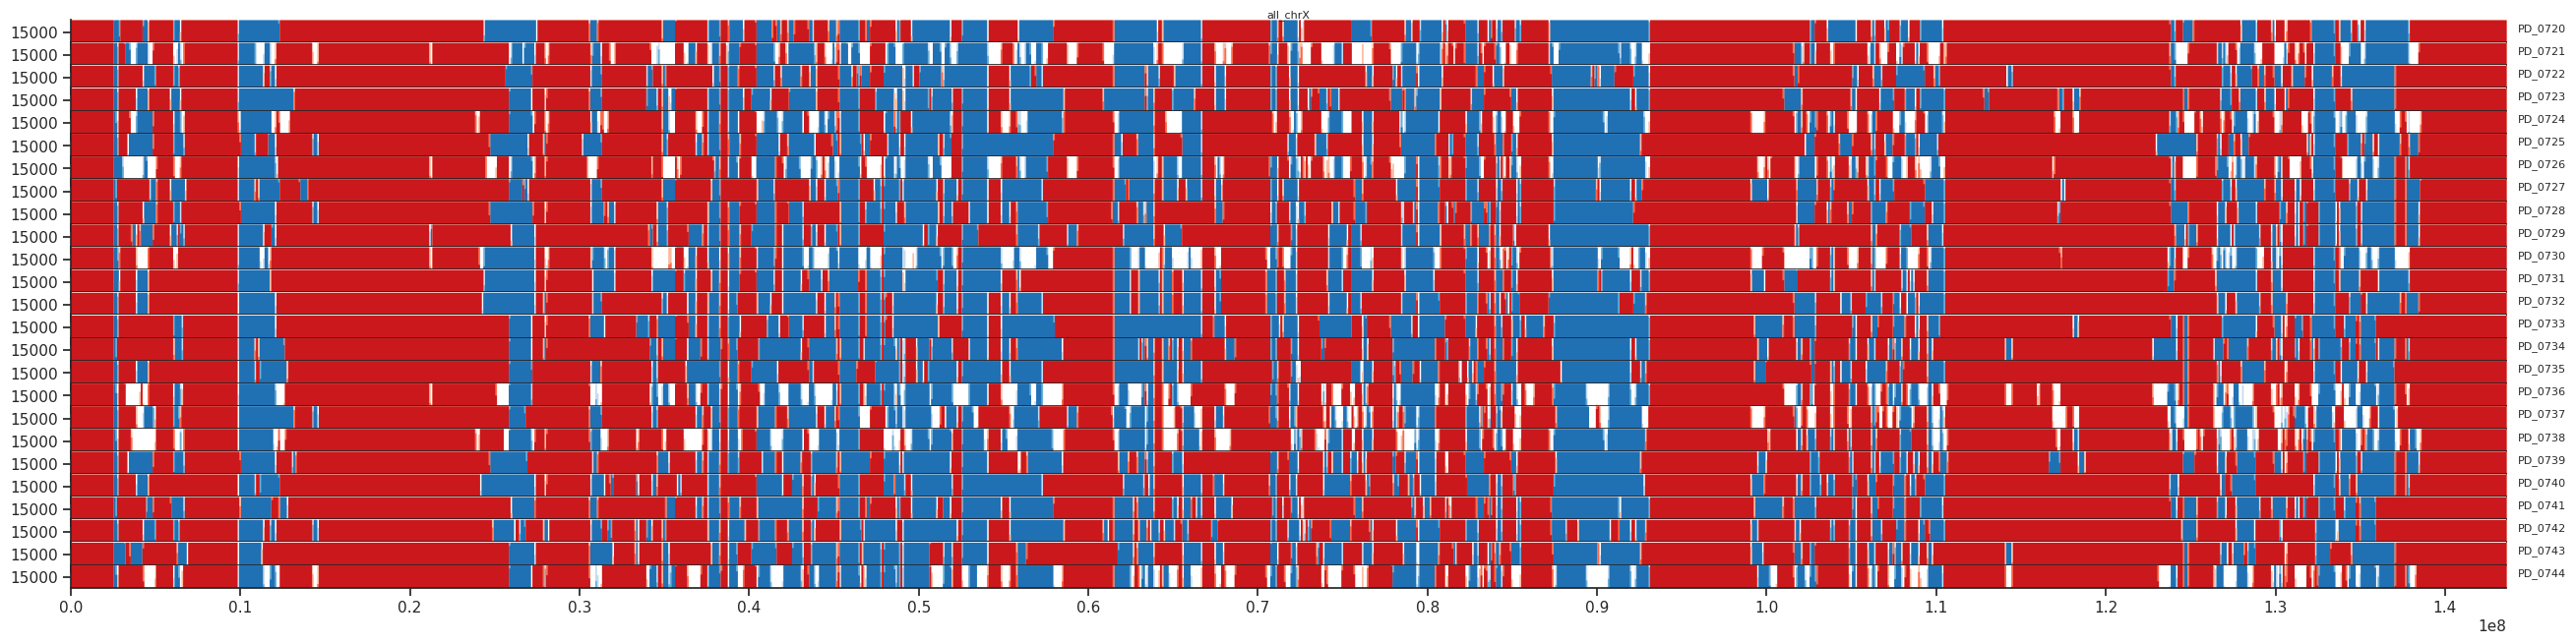

In [39]:
chr_check = eth_olive_mean_df.loc[(eth_olive_mean_df.chrom == "all_chrX")]
fig = horizonplot(chr_check, 'north', width=2, col='chrom', row='individual', size=0.3, aspect=100)

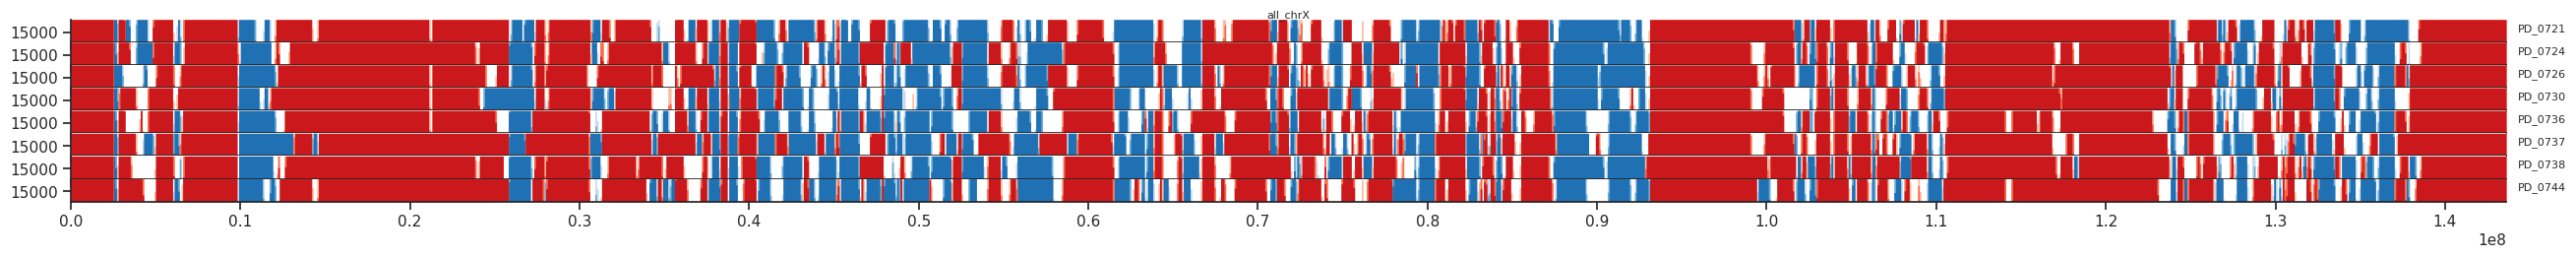

In [40]:
f_ethiopia = meta_data_samples.loc[(meta_data_samples.Origin == "Gog Woreda, Gambella region, Ethiopia") &
                                  (meta_data_samples.Sex == "F")].PGDP_ID
f_eth_olive_mean_df = mean_df.loc[(mean_df.individual.isin(f_ethiopia))]
chr_check = f_eth_olive_mean_df.loc[(f_eth_olive_mean_df.chrom == "all_chrX")]
fig = horizonplot(chr_check, 'north', width=2, col='chrom', row='individual', size=0.3, aspect=100)

In [67]:
# Adjusting male north
eth_olive_mean_df = mean_df.loc[(mean_df.individual.isin(ethiopia)) & (mean_df.chrom == "all_chrX")]
eth_olive_mean_df["sex"] = eth_olive_mean_df.individual.map(dict(zip(meta_data_samples.PGDP_ID,
                                                                     meta_data_samples.Sex)))
eth_olive_mean_df.loc[eth_olive_mean_df.sex == "M", "north_sum"] /= 2

/scratch/24389019/ipykernel_1946750/1800028734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_olive_mean_df["sex"] = eth_olive_mean_df.individual.map(dict(zip(meta_data_samples.PGDP_ID,


In [68]:
eth_chrX_adjusted = eth_olive_mean_df.groupby(["chrom", "start"])[["north_sum"]].mean().reset_index()

In [69]:
eth_chrX_adjusted["north_sum"] = eth_chrX_adjusted["north_sum"] / eth_chrX_adjusted.north_sum.max()

In [70]:
meta_data_samples.loc[meta_data_samples.Origin == "Gog Woreda, Gambella region, Ethiopia"].Sex.value_counts()

Sex
M    17
F     8
Name: count, dtype: int64

In [71]:
import geneinfo as gi
%env ftp_proxy http://proxy-default:3128
%env http_proxy http://proxy-default:3128
%env https_proxy http://proxy-default:3128

env: ftp_proxy=http://proxy-default:3128
env: http_proxy=http://proxy-default:3128
env: https_proxy=http://proxy-default:3128


In [72]:
chr_genes = gi.get_genes_region('chrX', 0, 140000022, assembly='papAnu4')

In [73]:
for c in chr_genes:
    if c[0] == "RAB40AL":
        print(c)

('RAB40AL', 92428814, 92630933, '+', [(92428814, 92428919), (92513380, 92513471), (92522257, 92522436), (92523237, 92523413), (92541696, 92541860), (92560699, 92560810), (92567893, 92568001), (92571075, 92571154), (92587813, 92588004), (92591015, 92591099), (92591880, 92592021), (92596231, 92596310), (92628906, 92630933)])


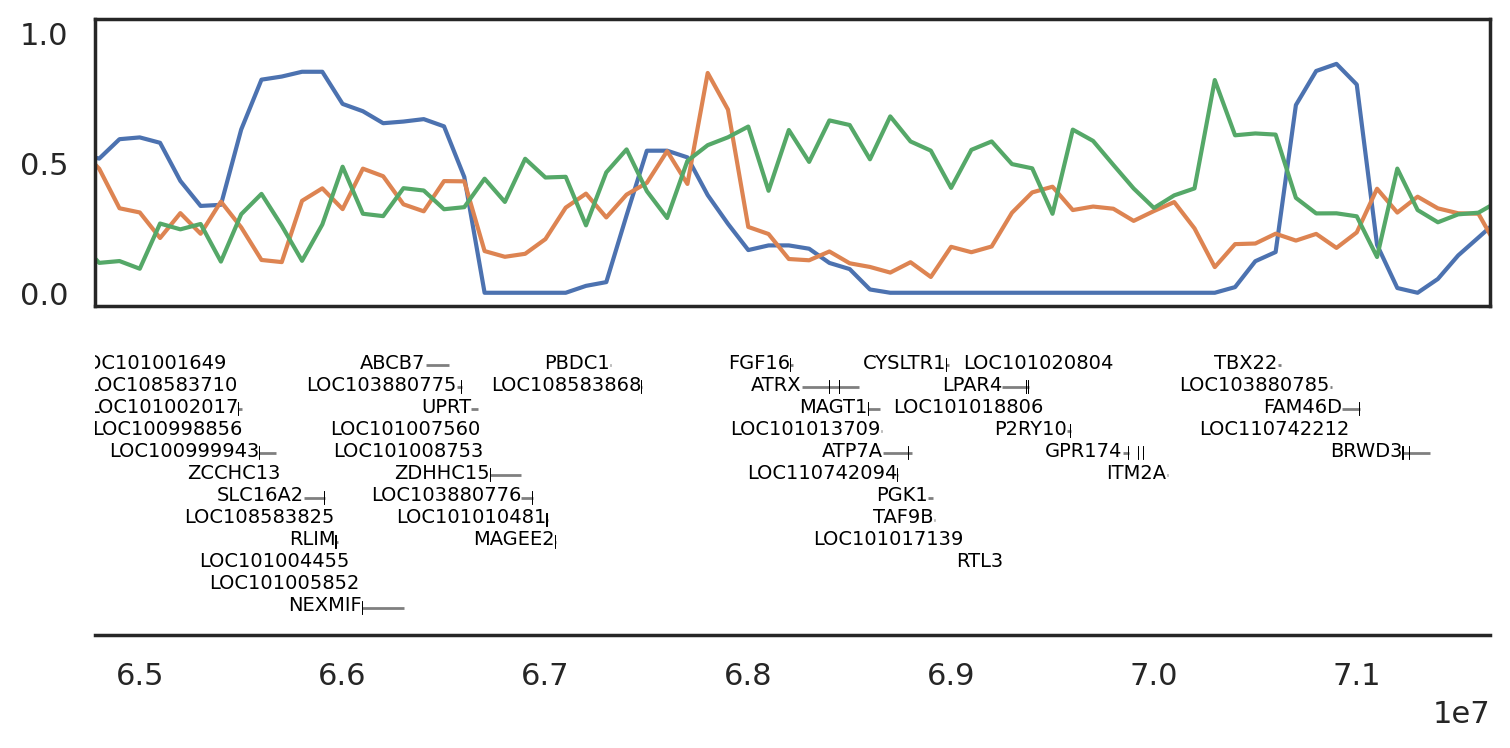

In [80]:
ax = gi.gene_plot('chrX', 65250000, 71250000, assembly='papAnu4', exact_exons=True, figsize=(9, 4))
ax.plot(eth_chrX_adjusted.start, eth_chrX_adjusted["north_sum"])
ax.plot(gog_df.start, (gog_df["norm_pi"])/(gog_df.norm_pi.max()))
ax.plot(fst_df_gf.start, fst_df_gf.fst)

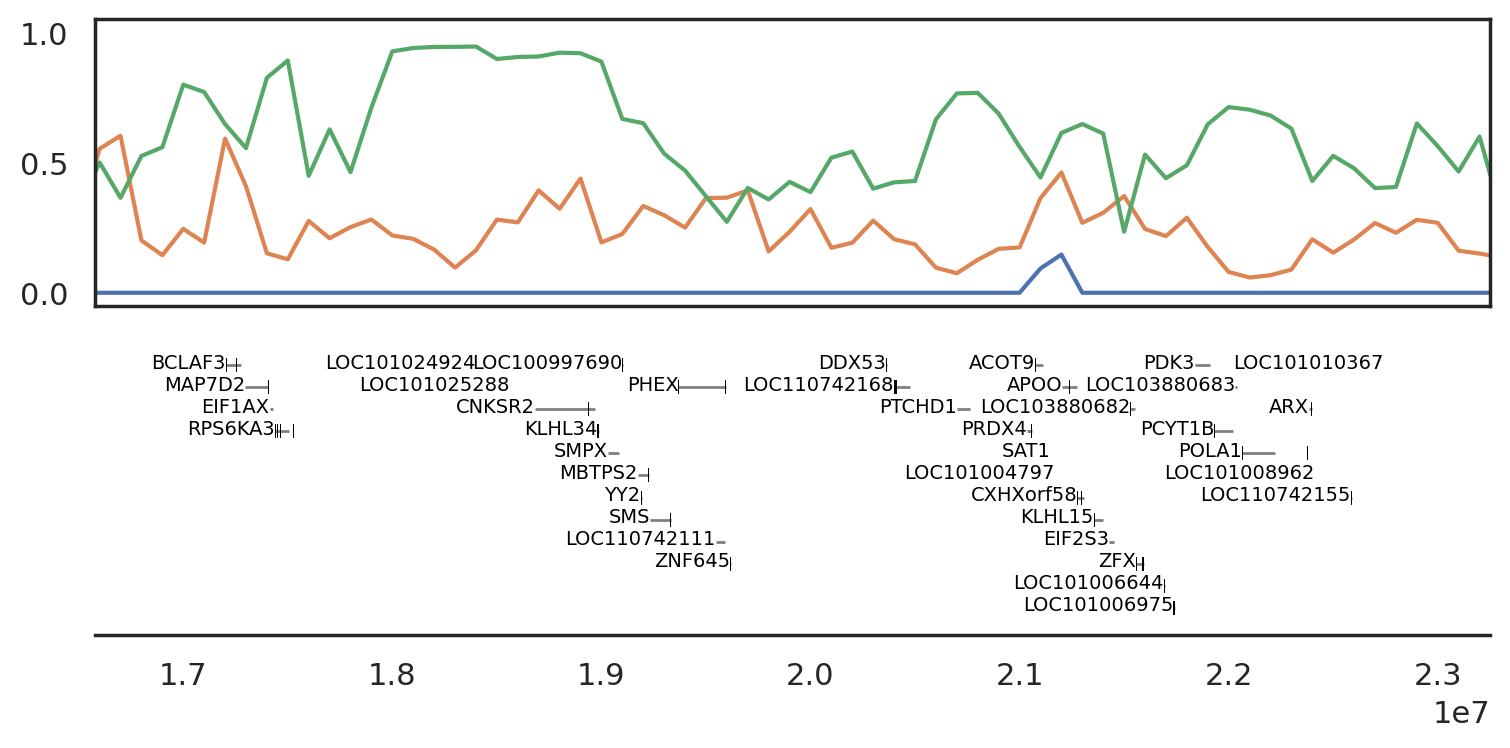

In [85]:
ax = gi.gene_plot('chrX', 17250000, 23250000, assembly='papAnu4', exact_exons=True, figsize=(9, 4))
ax.plot(eth_chrX_adjusted.start, eth_chrX_adjusted["north_sum"])
ax.plot(gog_df.start, (gog_df["norm_pi"])/(gog_df.norm_pi.max()))
ax.plot(fst_df_gf.start, fst_df_gf.fst)

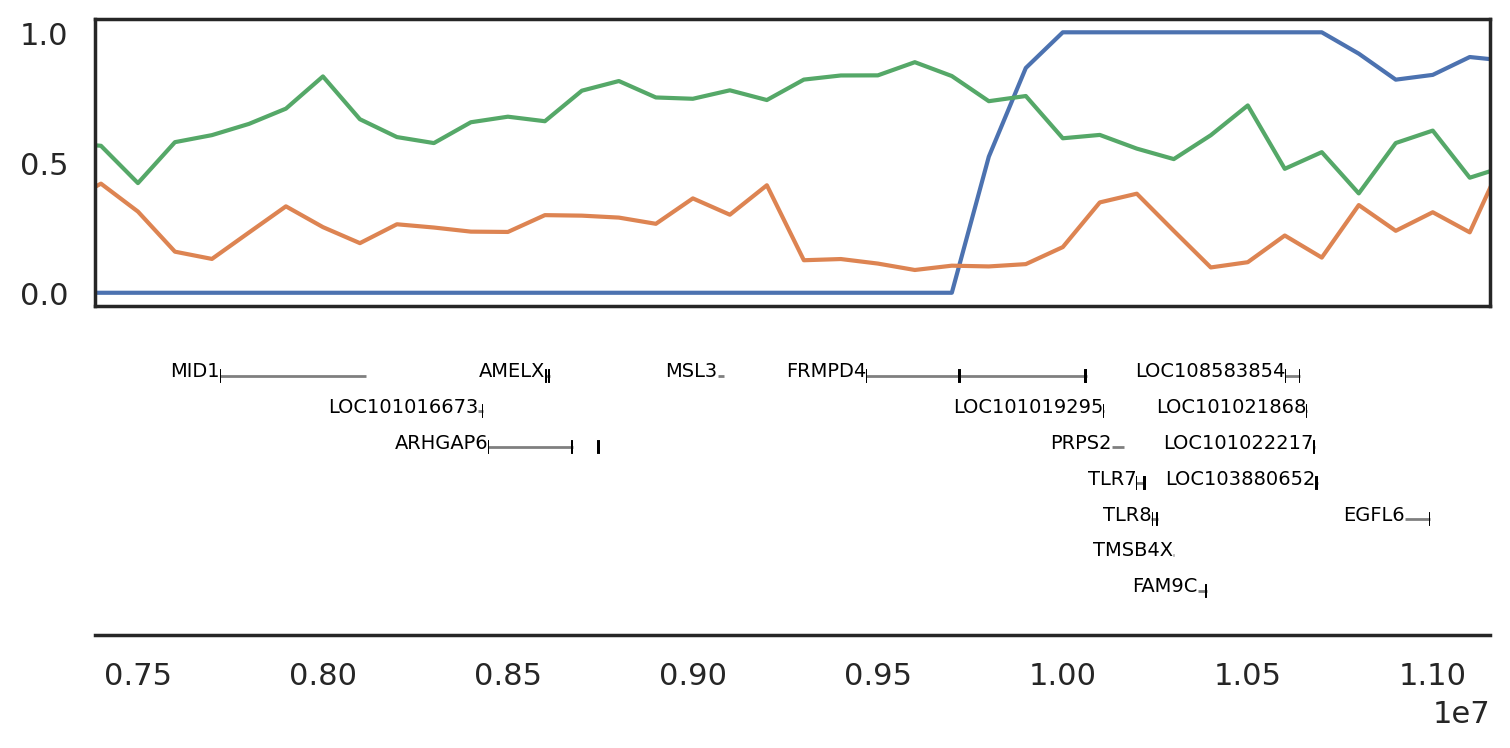

In [88]:
ax = gi.gene_plot('chrX', 8000000, 11000000, assembly='papAnu4', exact_exons=True, figsize=(9, 4))
ax.plot(eth_chrX_adjusted.start, eth_chrX_adjusted["north_sum"])
ax.plot(gog_df.start, (gog_df["norm_pi"])/(gog_df.norm_pi.max()))
ax.plot(fst_df_gf.start, fst_df_gf.fst)

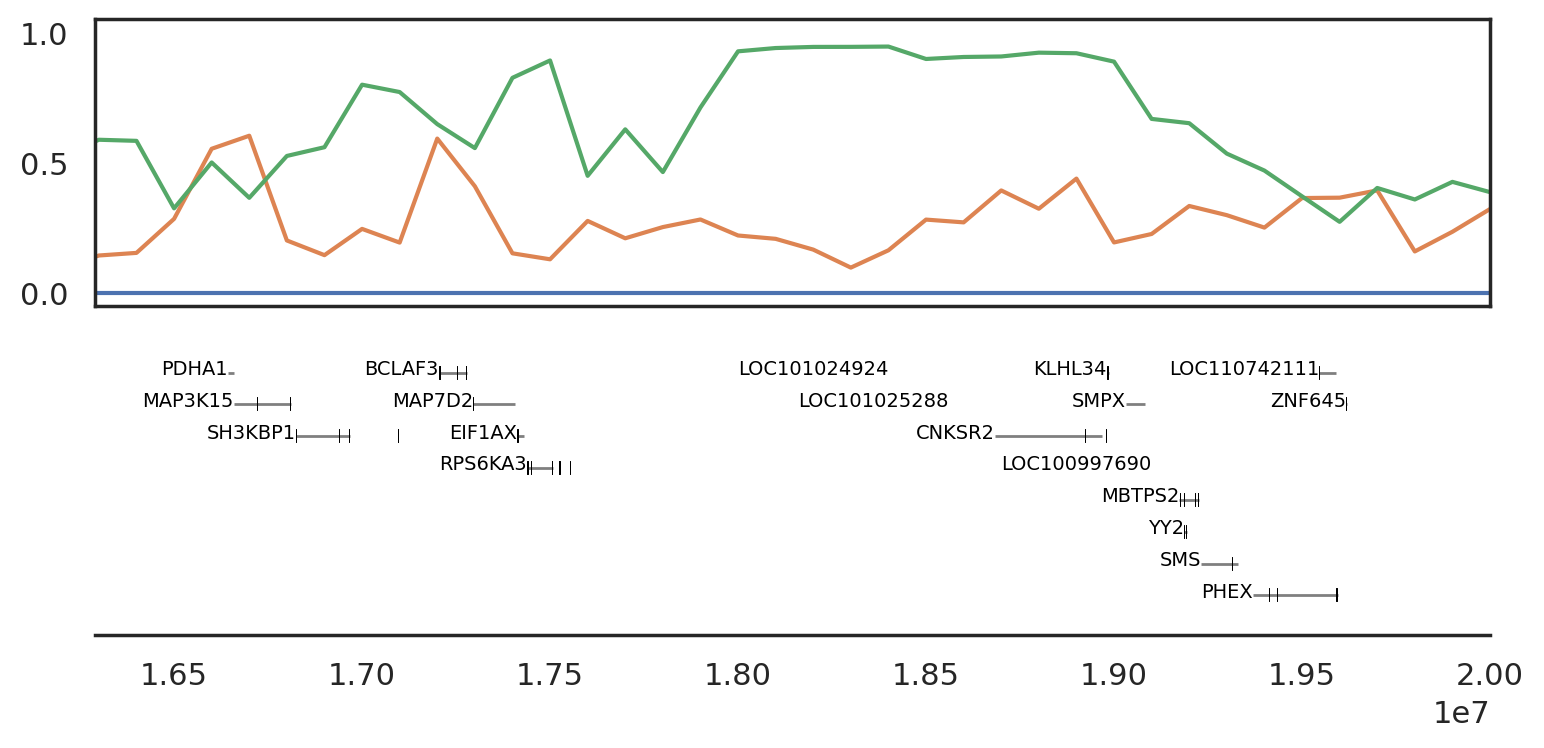

In [90]:
ax = gi.gene_plot('chrX', 16500000, 20000000, assembly='papAnu4', exact_exons=True, figsize=(9, 4))
ax.plot(eth_chrX_adjusted.start, eth_chrX_adjusted["north_sum"])
ax.plot(gog_df.start, (gog_df["norm_pi"])/(gog_df.norm_pi.max()))
ax.plot(fst_df_gf.start, fst_df_gf.fst)

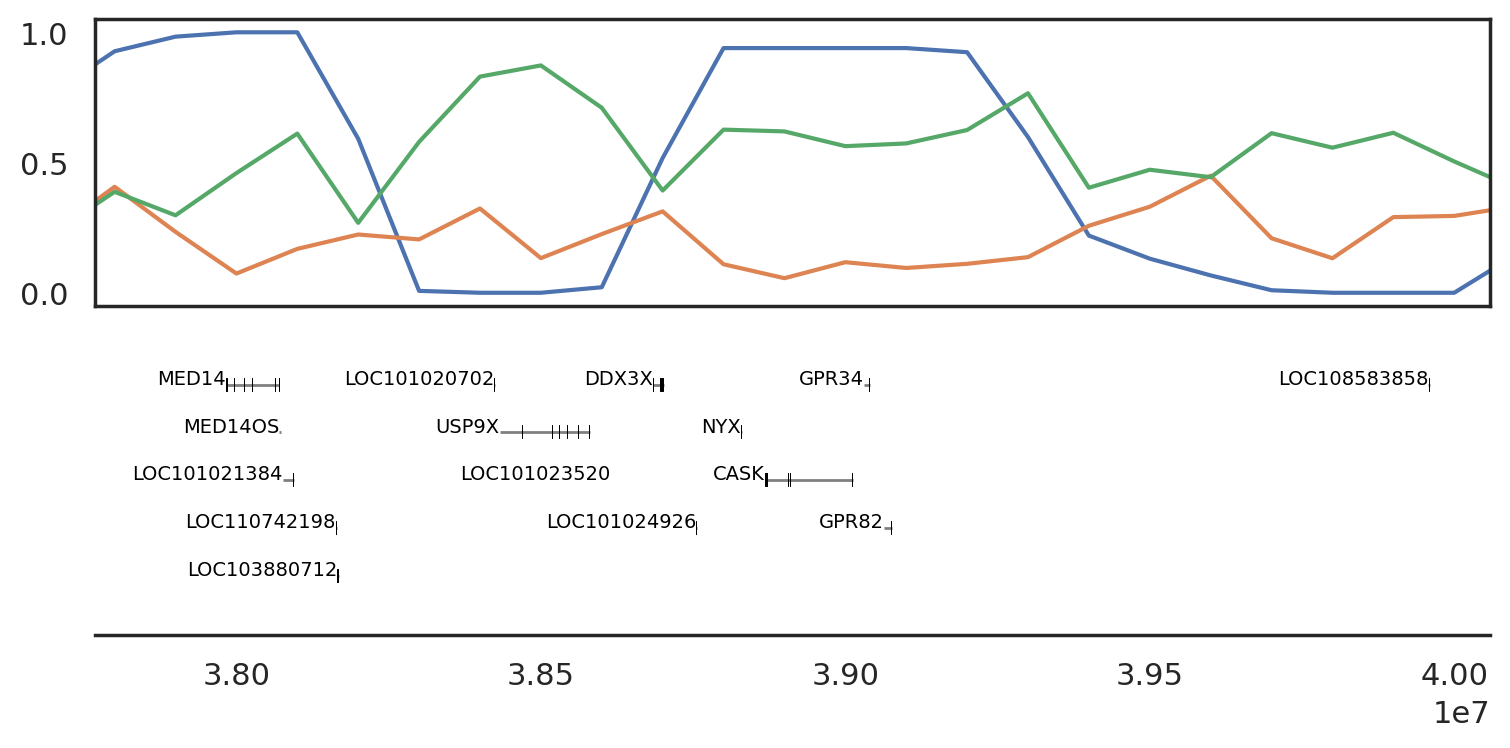

In [91]:
ax = gi.gene_plot('chrX', 38000000, 40000000, assembly='papAnu4', exact_exons=True, figsize=(9, 4))
ax.plot(eth_chrX_adjusted.start, eth_chrX_adjusted["north_sum"])
ax.plot(gog_df.start, (gog_df["norm_pi"])/(gog_df.norm_pi.max()))
ax.plot(fst_df_gf.start, fst_df_gf.fst)

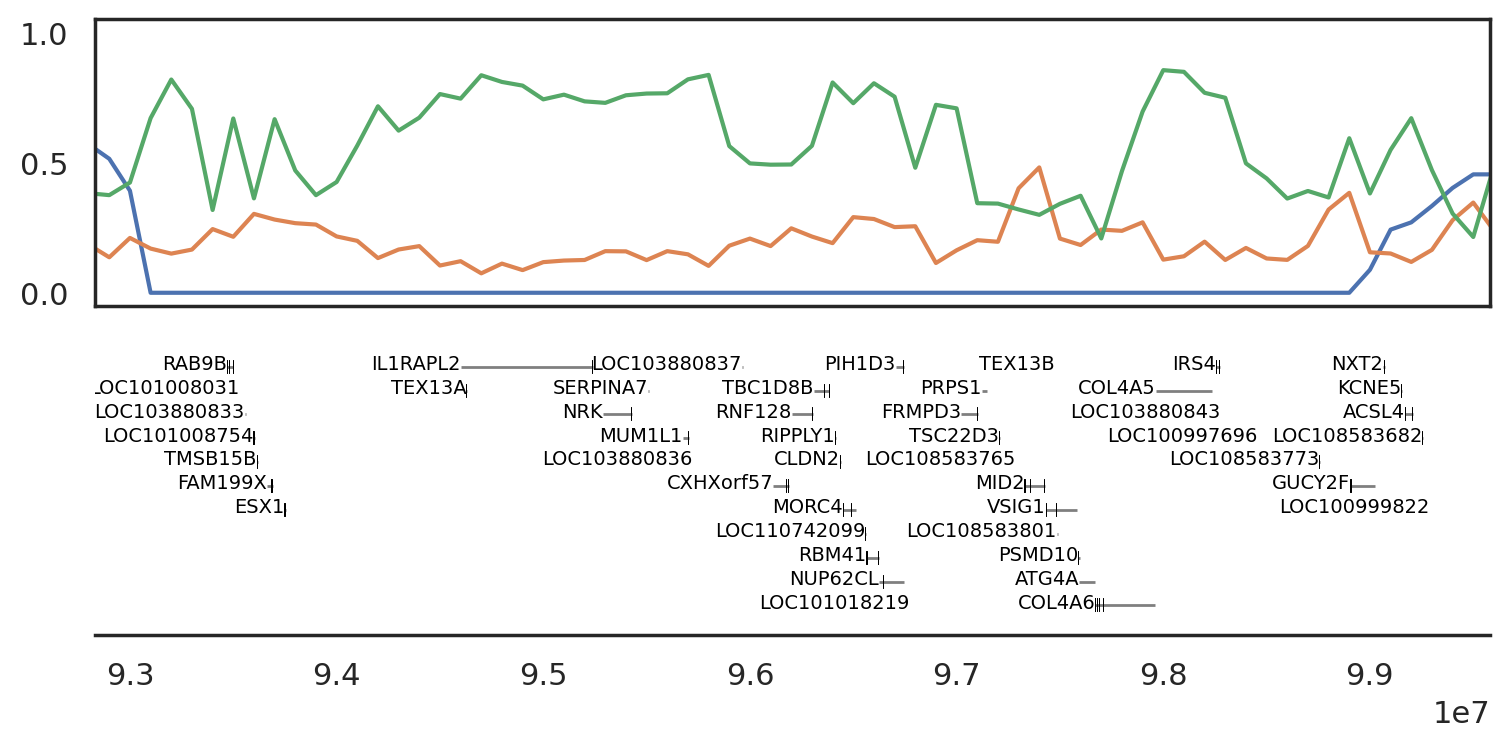

In [93]:
ax = gi.gene_plot('chrX', 93500000, 99500000, assembly='papAnu4', exact_exons=True, figsize=(9, 4))
ax.plot(eth_chrX_adjusted.start, eth_chrX_adjusted["north_sum"])
ax.plot(gog_df.start, (gog_df["norm_pi"])/(gog_df.norm_pi.max()))
ax.plot(fst_df_gf.start, fst_df_gf.fst)

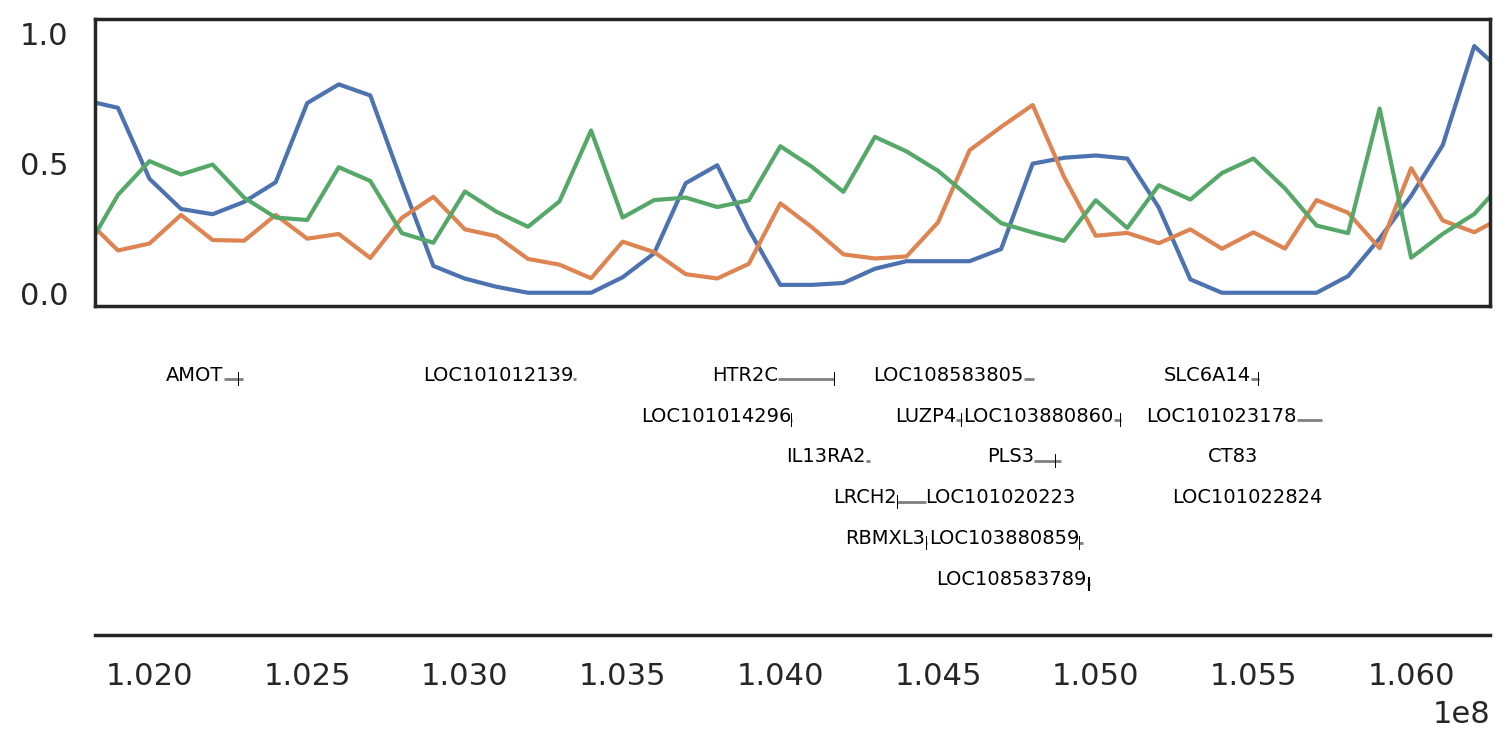

In [94]:
ax = gi.gene_plot('chrX', 102250000, 106250000, assembly='papAnu4', exact_exons=True, figsize=(9, 4))
ax.plot(eth_chrX_adjusted.start, eth_chrX_adjusted["north_sum"])
ax.plot(gog_df.start, (gog_df["norm_pi"])/(gog_df.norm_pi.max()))
ax.plot(fst_df_gf.start, fst_df_gf.fst)

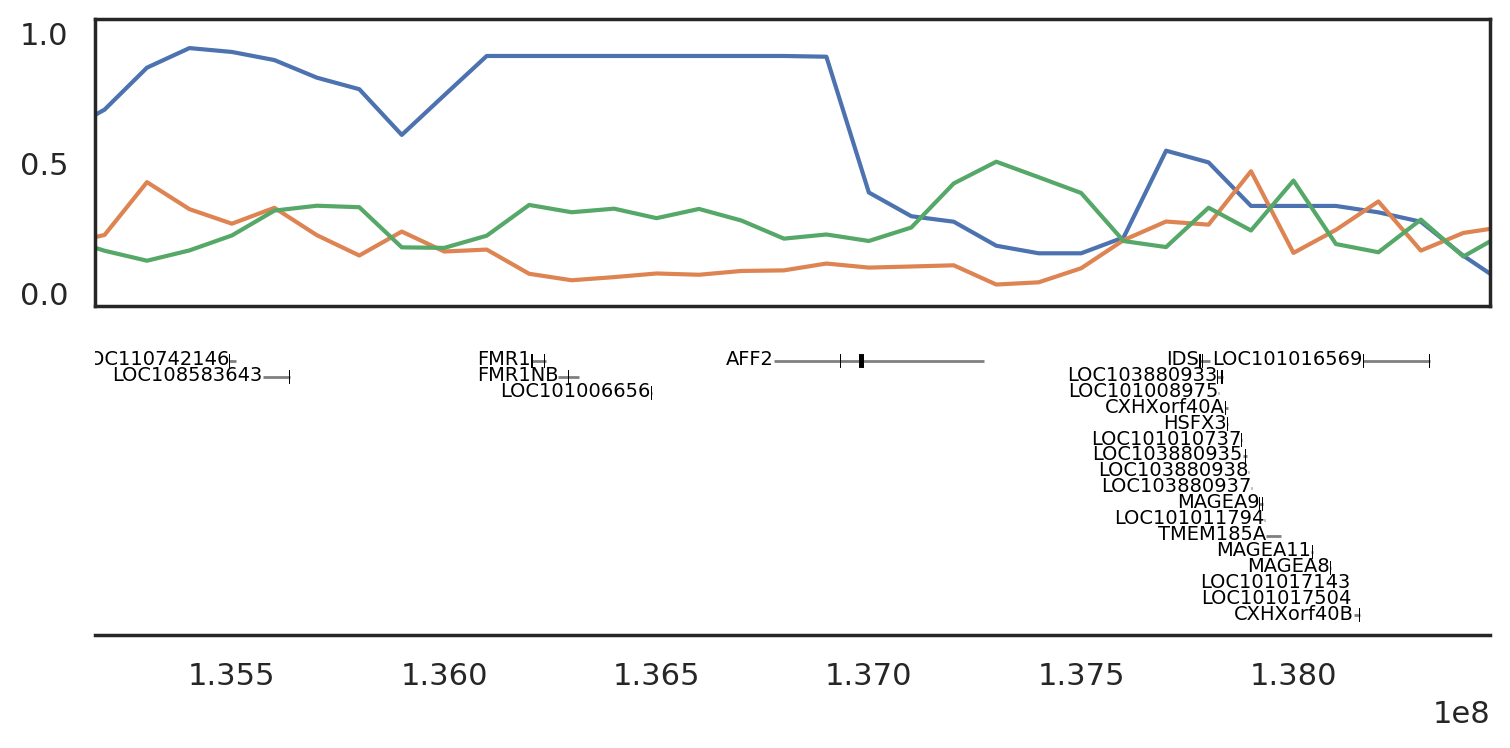

In [95]:
ax = gi.gene_plot('chrX', 135250000, 138250000, assembly='papAnu4', exact_exons=True, figsize=(9, 4))
ax.plot(eth_chrX_adjusted.start, eth_chrX_adjusted["north_sum"])
ax.plot(gog_df.start, (gog_df["norm_pi"])/(gog_df.norm_pi.max()))
ax.plot(fst_df_gf.start, fst_df_gf.fst)

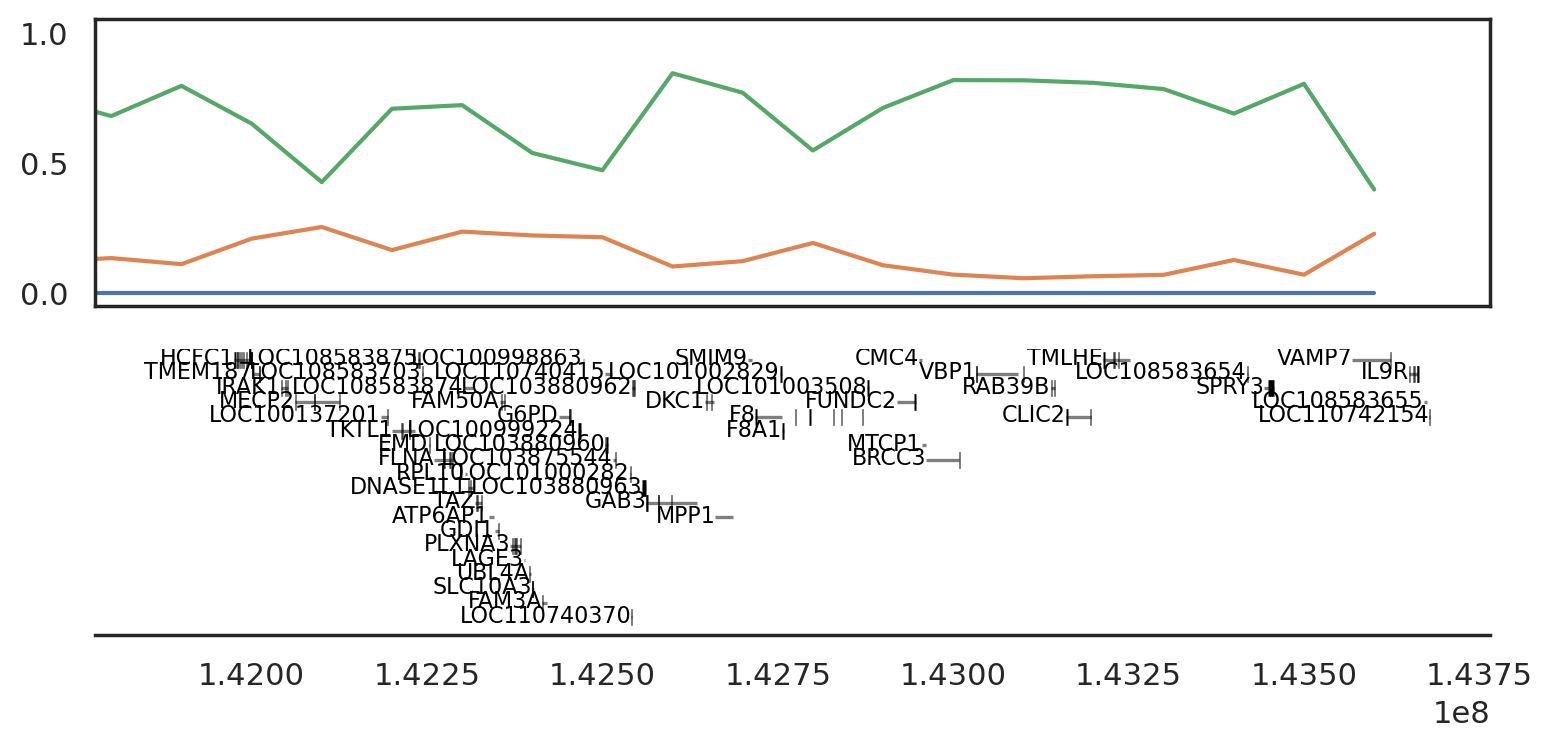

In [98]:
ax = gi.gene_plot('chrX', 142000000, 143700000, assembly='papAnu4', exact_exons=True, figsize=(9, 4))
ax.plot(eth_chrX_adjusted.start, eth_chrX_adjusted["north_sum"])
ax.plot(gog_df.start, (gog_df["norm_pi"])/(gog_df.norm_pi.max()))
ax.plot(fst_df_gf.start, fst_df_gf.fst)